In [ ]:
#https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
#https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
#Page No. 63
#Research Paper 10th and 12th

<ul>
    <li><a href="#zero">Original Dataset-</a></li>
    <ol>
        <li><a href="#graph1">PCA Plot</a></li>
        <li><a href="#first">Classification</a></li>
        <li><a href="#pca1">Classification on PCA Dataset</a></li>
        <li><a href="#hyper1">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#under">Undersampling the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph2">PCA Plot</a></li>
        <li><a href="#second">Classification</a></li>
        <li><a href="#pca2">Classification on PCA Dataset</a></li>
        <li><a href="#hyper2">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#under">Oversampling the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph3">PCA Plot</a></li>
        <li><a href="#third">Classification</a></li>
        <li><a href="#pca3">Classification on PCA Dataset</a></li>
        <li><a href="#hyper3">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#rus">Randomundersampling the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph4">PCA Plot</a></li>
        <li><a href="#fourth">Classification</a></li>
        <li><a href="#pca4">Classification on PCA Dataset</a></li>
        <li><a href="#hyper4">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#ros">Randomoversampling the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph5">PCA Plot</a></li>
        <li><a href="#fifth">Classification</a></li>
        <li><a href="#pca5">Classification on PCA Dataset</a></li>
        <li><a href="#hyper5">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#tomek">Tomeklinking the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph6">PCA Plot</a></li>
        <li><a href="#sixth">Classification</a></li>
        <li><a href="#pca6">Classification on PCA Dataset</a></li>
        <li><a href="#hyper6">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#cc">Cluster Centroid the Original Dataset-</li>
    <ol>
        <li><a href="#graph7">PCA Plot</a></li>
        <li><a href="#seventh">Classification</a></li>
        <li><a href="#pca7">Classification on PCA Dataset</a></li>
        <li><a href="#hyper7">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#smote">SMOTE the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph8">PCA Plot</a></li>
        <li><a href="#eigth">Classification</a></li>
        <li><a href="#pca8">Classification on PCA Dataset</a></li>
        <li><a href="#hyper8">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#enn">ENN the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph9">PCA Plot</a></li>
        <li><a href="#ninth">Classification</a></li>
        <li><a href="#pca9">Classification on PCA Dataset</a></li>
        <li><a href="#hyper9">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#smoteenn">SMOTEENN the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph10">PCA Plot</a></li>
        <li><a href="#tenth">Classification</a></li>
        <li><a href="#pca10">Classification on PCA Dataset</a></li>
        <li><a href="#hyper10">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
    <li><a href="#smotetomek">SMOTETomek the Original Dataset-</a></li>
    <ol>
        <li><a href="#graph11">PCA Plot</a></li>        
        <li><a href="#eleventh">Classification</a></li>
        <li><a href="#pca11">Classification on PCA Dataset</a></li>
        <li><a href="#hyper11">Hyperparameter Tuning</a></li>
        <li>Result Comparison</li>
    </ol>
</ul>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
warnings.filterwarnings("ignore", category=FutureWarning)

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.linear_model import Perceptron
from sklearn.ensemble import BaggingClassifier
import pickle

In [41]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [42]:
from xgboost import XGBClassifier

In [43]:
import tensorflow as tf
from tensorflow import keras as ks 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [60]:
#Loading the dataset
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
print(data.head())

   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1  


In [61]:
#checking for Null or NaN values
print(data.isnull().sum())
print(data.isna().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64


In [62]:
#Info of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [63]:
#standard statistic measures
print(data.describe())

              age  tot_bilirubin  direct_bilirubin  tot_proteins      albumin  \
count  583.000000     583.000000        583.000000    583.000000   583.000000   
mean    44.746141       3.298799          1.486106    290.576329    80.713551   
std     16.189833       6.209522          2.808498    242.937989   182.620356   
min      4.000000       0.400000          0.100000     63.000000    10.000000   
25%     33.000000       0.800000          0.200000    175.500000    23.000000   
50%     45.000000       1.000000          0.300000    208.000000    35.000000   
75%     58.000000       2.600000          1.300000    298.000000    60.500000   
max     90.000000      75.000000         19.700000   2110.000000  2000.000000   

          ag_ratio        sgpt        sgot     alkphos  is_patient  
count   583.000000  583.000000  583.000000  579.000000  583.000000  
mean    109.910806    6.483190    3.141852    0.947064    1.286449  
std     288.918529    1.085451    0.795519    0.319592    0.452

In [64]:
#Removing the Null or NaN values.
data1 = data
data1 = data1.fillna(data1.mean())
print(data1.isna().sum())
print(data1.isnull().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64


As we can see above that now there is no NaN or Null values in the dataset. 

                       age  tot_bilirubin  direct_bilirubin  tot_proteins  \
age               1.000000       0.011763          0.007529      0.080425   
tot_bilirubin     0.011763       1.000000          0.874618      0.206669   
direct_bilirubin  0.007529       0.874618          1.000000      0.234939   
tot_proteins      0.080425       0.206669          0.234939      1.000000   
albumin           0.086883       0.214065          0.233894      0.125680   
ag_ratio          0.019910       0.237831          0.257544      0.167196   
sgpt              0.187461       0.008099          0.000139      0.028514   
sgot              0.265924       0.222250          0.228531      0.165453   
alkphos           0.216089       0.206159          0.200004      0.233960   
is_patient        0.137351       0.220208          0.246046      0.184866   

                   albumin  ag_ratio      sgpt      sgot   alkphos  is_patient  
age               0.086883  0.019910  0.187461  0.265924  0.216089    0

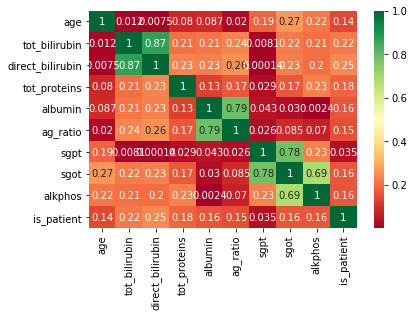

In [65]:
#Checking for Correlation as to reduce dimensionality
print(data1.corr().abs())
sns.heatmap(data1.corr().abs(), annot=True,cmap="RdYlGn")

As we can see above the highest correlation between different columns is 0.87("tot_bilirubin","direct_bilirubin"), which means they are 87% similar and 13% different. So, it is not appropriate to remove any of the coulmns. 

In [66]:
#LabelEncoding for gender 
data1["gender"] = data1["gender"].map({"Male":0, "Female":1})
print(data1.head())

   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65       1            0.7               0.1           187       16   
1   62       0           10.9               5.5           699       64   
2   62       0            7.3               4.1           490       60   
3   58       0            1.0               0.4           182       14   
4   72       0            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1  


In [67]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    int64  
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           583 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB
None


<a id="zero"></a>

In [68]:
#Normalizing the dataset so that the data scales properly on the algorithms. 

min_max_scaler = preprocessing.MinMaxScaler()
X = data1.drop('is_patient', axis=1)
y = data1[["is_patient"]]

print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=99)
data_training = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
df = data_training.values
df_test = data_test.values
data_training = min_max_scaler.fit_transform(df)
data_testing = min_max_scaler.transform(df_test)

data_norm = pd.DataFrame(data_training, columns=data1.columns)
X_train = data_norm.drop("is_patient", axis=1)
y_train = data_norm[["is_patient"]]

data_normed = pd.DataFrame(data_testing, columns = data1.columns)
X_test = data_normed.drop("is_patient", axis=1)
y_test = data_normed[["is_patient"]]

X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

print(len(data_norm))
print(len(data_normed))

583
583
408
175


In [69]:
#Feature Selection 
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)
print(X_train.columns)
rfe.fit(X_train, y_train)
print(rfe.ranking_)
print(X_train.columns[rfe.support_])

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos'],
      dtype='object')
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
[6 9 1 1 2 3 5 8 4 7]
Index(['tot_bilirubin', 'direct_bilirubin'], dtype='object')


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
#Univariate Selection 
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(10,'Score')) 

           Features     Score
2     tot_bilirubin  6.898676
3  direct_bilirubin  6.847099
1            gender  2.643982
5           albumin  2.517531
6          ag_ratio  2.286247
4      tot_proteins  2.161537
8              sgot  0.759569
9           alkphos  0.571888
0               age  0.343602
7              sgpt  0.066495


[0.11012629 0.0276339  0.11220069 0.0996144  0.11707356 0.11864939
 0.12015717 0.09901281 0.09797589 0.09755591]


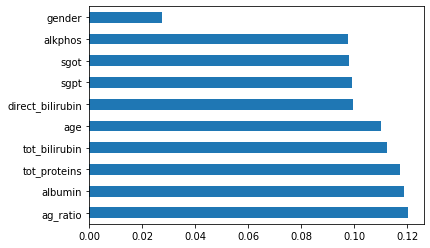

In [71]:
#Feature Importance
model = ExtraTreesClassifier()
model.fit(X_train,y_train.values.ravel())
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [72]:
print(y["is_patient"].value_counts())

0.0    416
1.0    167
Name: is_patient, dtype: int64


In [75]:
print(data_norm.dtypes)

age                 float64
gender              float64
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins        float64
albumin             float64
ag_ratio            float64
sgpt                float64
sgot                float64
alkphos             float64
is_patient          float64
dtype: object


Objective of Under and Over Sampling :
            1) High Precision on Majority Class(0.0). High Precision indicates an example labeled as positive is                  indeed positive (small number of FP).
            2) High Recall of Minority Class(1.0). High Recall indicates the class is correctly recognized (small                number of FN).

In [76]:
print(data_norm.head())

        age  gender  tot_bilirubin  direct_bilirubin  tot_proteins   albumin  \
0  0.000000     0.0       0.016447          0.005495      0.139228  0.010050   
1  0.567901     0.0       0.023026          0.010989      0.054714  0.005025   
2  0.271605     1.0       0.006579          0.005495      0.038593  0.001005   
3  0.358025     0.0       0.013158          0.005495      0.065950  0.008040   
4  0.851852     0.0       0.049342          0.032967      0.824133  0.046231   

   ag_ratio      sgpt      sgot  alkphos  is_patient  
0  0.008174  0.768116  0.673913     0.28         1.0  
1  0.003065  0.637681  0.782609     0.56         1.0  
2  0.007493  0.434783  0.326087     0.18         0.0  
3  0.004428  0.768116  0.673913     0.28         1.0  
4  0.044619  0.405797  0.239130     0.08         0.0  


<a id="graph1"></a>

[0.52020536 0.69548154]
0.0    291
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


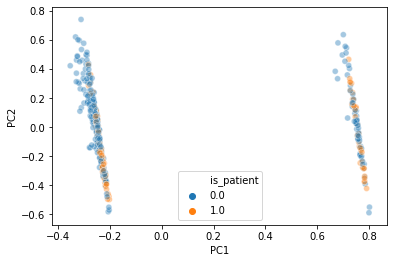

In [79]:
#
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_.cumsum())
y_temp = y_train
y_temp["PC1"] = X_pca[:,0]
y_temp["PC2"] = X_pca[:,1]
sns.scatterplot(data=y_temp, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp["is_patient"].value_counts())
# print(len(y), len(X_pca))
#print(pca.components_)

In [80]:
print(y_train.head())
y_train = y_train.drop(["PC1", "PC2"], axis=1)
print(y_train.head())

   is_patient       PC1       PC2
0         1.0 -0.203093 -0.476366
1         1.0 -0.225383 -0.340140
2         0.0  0.750240  0.113175
3         1.0 -0.219966 -0.335130
4         0.0 -0.287818  0.492670
   is_patient
0         1.0
1         1.0
2         0.0
3         1.0
4         0.0


In [81]:
def clfFitPredict(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    confusionMatrix(y_test, y_pred)

In [82]:
def aurocPredict(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train.values.ravel())
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    print("ROC AUC Score :",roc_auc_score(y_test, y_pred_proba))

In [83]:
def confusionMatrix(y_test, y_pred):
    co = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix: \n'+str(co))
    
    total=co[0,0]+co[1,1]+co[0,1]+co[1,0]
    accuracy=(co[0,0]+co[1,1])/total
    print('\nAccuracy : '+ str(accuracy))

    sensitivity = co[0,0]/(co[0,0]+co[0,1])
    print('Sensitivity : '+ str(sensitivity ))
    
    precision = co[0,0]/(co[0,0]+co[1,0])
    print('Precision: ' + str(precision))

    specificity = co[1,1]/(co[1,0]+co[1,1])
    print('Specificity : ' + str(specificity))
    
    fscore = 2*precision*sensitivity/(precision+sensitivity)
    print('F-Score : ' + str(fscore))
    
    print("\n",classification_report(y_test, y_pred), "\n")

In [84]:
def params(confusion_matrix):
    co = confusion_matrix
    print('\nConfusion Matrix By taking mean of all individual confusion matrix folds: \n'+str(co))
    
    total=co[0,0]+co[1,1]+co[0,1]+co[1,0]
    accuracy=(co[0,0]+co[1,1])/total
    print('\nAccuracy : '+ str(accuracy))

    sensitivity = co[0,0]/(co[0,0]+co[0,1])
    print('Sensitivity : '+ str(sensitivity ))
    
    precision = co[0,0]/(co[0,0]+co[1,0])
    print('Precision: ' + str(precision))

    specificity = co[1,1]/(co[1,0]+co[1,1])
    print('Specificity : ' + str(specificity))
    
    fscore = 2*precision*sensitivity/(precision+sensitivity)
    print('F-Score : ' + str(fscore))

In [85]:
def crossValidation(clf, X, y, folds):
    #https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated
    scoreclf = cross_val_score(clf, X, y.values.ravel(), cv=folds)
    print(scoreclf,"\n")
    print(np.mean(scoreclf))
    
#     list_of_confmatrix = []
#     kf = KFold(n_splits = folds)
#     kf.get_n_splits(X)
#     for train_index, test_index in kf.split(X):
#         #print("TRAIN:", train_index, "TEST:", test_index)
#         X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#         y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
#         clf.fit(X_train_kf, y_train_kf.values.ravel())
#         confmatrix = confusion_matrix(y_test_kf, clf.predict(X_test_kf))
#         list_of_confmatrix.append(confmatrix)
    
#     mean_of_confmatrix = np.mean(list_of_confmatrix, axis=0)
#     params(mean_of_confmatrix)

In [86]:
print(y_train.columns)

Index(['is_patient'], dtype='object')


<a id='first'></a>

In [528]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Original dataset
print("Naive Bayes on Original dataset:")
clfFitPredict(GaussianNB(), X_train, X_test, y_train, y_test)

#Cross Validation on Naive Bayes on Original datset
print("\nCross Validation of Naive Bayes on Original dataset:")
crossValidation(GaussianNB(), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Original dataset:

Confusion Matrix: 
[[48 77]
 [ 4 46]]

Accuracy : 0.5371428571428571
Sensitivity : 0.384
Precision: 0.9230769230769231
Specificity : 0.92
F-Score : 0.5423728813559322

               precision    recall  f1-score   support

         0.0       0.92      0.38      0.54       125
         1.0       0.37      0.92      0.53        50

    accuracy                           0.54       175
   macro avg       0.65      0.65      0.54       175
weighted avg       0.77      0.54      0.54       175
 


Cross Validation of Naive Bayes on Original dataset:
[0.60273973 0.54109589 0.52739726 0.55172414] 

0.5557392536608408

----------------------------------------------------------------------



In [88]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On the Original Dataset
print("SVM Classifier on Original dataset:")
clfFitPredict(LinearSVC(), X_train, X_test, y_train, y_test)

#Cross Validation on SVM Classifier on Orginial datset
print("\nCross Validation of SVM Classifier on Original dataset:")
crossValidation(LinearSVC(), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of SVM Classifier on Original dataset:
[0.73287671 0.70547945 0.69178082 0.73103448] 

0.7152928672649976

----------------------------------------------------------------------



In [89]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regressor Classifier On the Original Dataset 
print("Logistic Regressor Classifier on Original dataset:")
clfFitPredict(LogisticRegression(), X_train, X_test, y_train, y_test)

#Cross Validation on Logistic Regressor Classifier on Orginial datset
print("\nCross Validation of Logistic Regressor Classifier on Original dataset:")
crossValidation(LogisticRegression(), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regressor Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of Logistic Regressor Classifier on Original dataset:
[0.71917808 0.70547945 0.7260274  0.71724138] 

0.7169815777042986

----------------------------------------------------------------------



/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On the Original Dataset 
print(" KNN Classifier on Original dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train, X_test, y_train, y_test)

#Cross Validation on KNN Classifier on Orginial datset
print("\nCross Validation of  KNN Classifier  on Original dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

 KNN Classifier on Original dataset:

Confusion Matrix: 
[[116   9]
 [ 44   6]]

Accuracy : 0.6971428571428572
Sensitivity : 0.928
Precision: 0.725
Specificity : 0.12
F-Score : 0.8140350877192983

               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81       125
         1.0       0.40      0.12      0.18        50

    accuracy                           0.70       175
   macro avg       0.56      0.52      0.50       175
weighted avg       0.63      0.70      0.63       175
 


Cross Validation of  KNN Classifier  on Original dataset:
[0.71232877 0.65068493 0.70547945 0.71034483] 

0.6947094945677845

----------------------------------------------------------------------



In [91]:
print("\n----------------------------------------------------------------------\n")

#5 RandomForest Classifier On the Original Dataset 
print("RandomForest Classifier on Original dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train, X_test, y_train, y_test)

#Cross Validation on RandomForest Classifier on Orginial datset
print("\nCross Validation of  RandomForest Classifier on Original dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

RandomForest Classifier on Original dataset:

Confusion Matrix: 
[[121   4]
 [ 43   7]]

Accuracy : 0.7314285714285714
Sensitivity : 0.968
Precision: 0.7378048780487805
Specificity : 0.14
F-Score : 0.8373702422145328

               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84       125
         1.0       0.64      0.14      0.23        50

    accuracy                           0.73       175
   macro avg       0.69      0.55      0.53       175
weighted avg       0.71      0.73      0.66       175
 


Cross Validation of  RandomForest Classifier on Original dataset:
[0.68493151 0.70547945 0.71232877 0.71724138] 

0.7049952763344355

----------------------------------------------------------------------



In [92]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Original Dataset
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
print("Voting Classifier on Original dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train, X_test, y_train, y_test)

#Cross Validation on Voting Classifier on Orginial datset
print("\nCross Validation of Voting Classifier on Original dataset:")
crossValidation(vclf, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of Voting Classifier on Original dataset:
[0.7260274  0.70547945 0.71232877 0.73103448] 

0.7187175247992443

----------------------------------------------------------------------



In [93]:
print("\n----------------------------------------------------------------------\n")

#AdaBoostClassifier With Decision Tree Classifier as base estimator 
dt = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=0.025)
print("\nAdaBoost Classifier on Original dataset:")
clfFitPredict(adb_clf, X_train, X_test, y_train, y_test)

#Cross Validation on AdaBoost Classifier on Orginial datset
print("\nCross Validation of AdaBoost Classifier on Original dataset:")
crossValidation(adb_clf, X, y, 4)

print("\n----------------------------------------------------------------------\n")

#AdaBoostClassifier With SVC as base estimator 

svc_adb = SVC(probability=True, kernel='linear')
adb_clf_svc = AdaBoostClassifier(base_estimator=svc_adb, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVM as base estimator on Original dataset:")
clfFitPredict(adb_clf_svc, X_train, X_test, y_train, y_test)


#Cross Validation on AdaBoostClassifier on Orginial datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Original dataset:")
crossValidation(adb_clf_svc, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoost Classifier on Original dataset:

Confusion Matrix: 
[[124   1]
 [ 47   3]]

Accuracy : 0.7257142857142858
Sensitivity : 0.992
Precision: 0.7251461988304093
Specificity : 0.06
F-Score : 0.8378378378378378

               precision    recall  f1-score   support

         0.0       0.73      0.99      0.84       125
         1.0       0.75      0.06      0.11        50

    accuracy                           0.73       175
   macro avg       0.74      0.53      0.47       175
weighted avg       0.73      0.73      0.63       175
 


Cross Validation of AdaBoost Classifier on Original dataset:
[0.71232877 0.73287671 0.7260274  0.71724138] 

0.7221185640056684

----------------------------------------------------------------------


AdaBoostClassifier with SVM as base estimator on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71232877 0.71232877 0.71232877 0.71724138] 

0.7135569201700519

----------------------------------------------------------------------



In [103]:
print("\n----------------------------------------------------------------------\n")

#GradientBoostingClassifier On Original Dataset

gbc = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on Original dataset :")
clfFitPredict(gbc, X_train, X_test, y_train, y_test)

print("\n----------------------------------------------------------------------\n")

#Cross Validation on GradientBoostingClassifier on Orginial datset
print("\nCross Validation of GradientBoostingClassifier on Original dataset:")
crossValidation(gbc, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on Original dataset :

Confusion Matrix: 
[[112  13]
 [ 29  21]]

Accuracy : 0.76
Sensitivity : 0.896
Precision: 0.7943262411347518
Specificity : 0.42
F-Score : 0.8421052631578948

               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       125
         1.0       0.62      0.42      0.50        50

    accuracy                           0.76       175
   macro avg       0.71      0.66      0.67       175
weighted avg       0.74      0.76      0.74       175
 


----------------------------------------------------------------------


Cross Validation of GradientBoostingClassifier on Original dataset:
[0.7260274  0.70547945 0.69863014 0.74482759] 

0.7187411431270667

----------------------------------------------------------------------



In [105]:
print("\n----------------------------------------------------------------------\n")

#XGBClassifier on the Original Dataset

xgb_clf = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("XGBClassifier on Original dataset :")
clfFitPredict(xgb_clf, X_train, X_test, y_train, y_test)

#Cross Validation on XGBClassifier on Orginial datset
print("\nCross Validation of XGBClassifier on Original dataset:")
crossValidation(xgb_clf, X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

XGBClassifier on Original dataset :

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of XGBClassifier on Original dataset:
[0.71232877 0.71232877 0.71232877 0.71724138] 

0.7135569201700519

----------------------------------------------------------------------



/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
#Bagging Classifier On the Original Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on Original dataset :")
clfFitPredict(clf_bagging, X_train, X_test, y_train, y_test)

#Cross Validation on Bagging Classifier on Orginial datset
print("\nCross Validation of Bagging Classifier on Original dataset :")
crossValidation(clf_bagging, X, y, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On Original Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train, X_test, y_train, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On Original Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X, y, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on Original dataset :

Confusion Matrix: 
[[111  14]
 [ 37  13]]

Accuracy : 0.7085714285714285
Sensitivity : 0.888
Precision: 0.75
Specificity : 0.26
F-Score : 0.8131868131868133

               precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       125
         1.0       0.48      0.26      0.34        50

    accuracy                           0.71       175
   macro avg       0.62      0.57      0.58       175
weighted avg       0.67      0.71      0.68       175
 


Cross Validation of Bagging Classifier on Original dataset :
[0.67123288 0.67808219 0.70547945 0.67586207] 

0.6826641473783657

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On Original Dataset

Confusion Matrix: 
[[111  14]
 [ 37  13]]

Accuracy : 0.7085714285714285
Sensitivity : 0.888
Precision: 0.75
Specificity : 0.26
F-Score : 0.8131868131868133

               precision    recal

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71232877 0.71232877 0.71232877 0.71724138] 

0.7135569201700519

----------------------------------------------------------------------

Bagging Classifier with RF as base estimator On Original Dataset

Confusion Matrix: 
[[114  11]
 [ 39  11]]

Accuracy : 0.7142857142857143
Sensitivity : 0.912
Precision: 0.7450980392156863
Specificity : 0.22
F-Score : 0.8201438848920864

               precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       125
         1.0       0.50      0.22      0.31        50

    accuracy                           0.71       175
   macro avg       0.62      0.57      0.56       175
weighted avg       0.68      0.71      0.67       175
 

Cross Validation of Bagging Classifier with RF as base estimator On Original Dataset
[0.68493151 0.69863014 0.71917808 0.70344828] 

0.7015470004723665

----------------------------------------------------------------------

Bagging Classifier with LR as base estimator On Original Dataset

C

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71917808 0.70547945 0.7260274  0.71724138] 

0.7169815777042986

----------------------------------------------------------------------



In [107]:
#Perceptron On The Original Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on Original dataset :")
clfFitPredict(clf_percept, X_train, X_test, y_train, y_test)

#Cross Validation on Perceptron on Orginial datset
print("\nCross Validation of Perceptron on Original dataset :")
crossValidation(clf_percept, X, y, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on Original dataset :

Confusion Matrix: 
[[107  18]
 [ 34  16]]

Accuracy : 0.7028571428571428
Sensitivity : 0.856
Precision: 0.7588652482269503
Specificity : 0.32
F-Score : 0.8045112781954887

               precision    recall  f1-score   support

         0.0       0.76      0.86      0.80       125
         1.0       0.47      0.32      0.38        50

    accuracy                           0.70       175
   macro avg       0.61      0.59      0.59       175
weighted avg       0.68      0.70      0.68       175
 


Cross Validation of Perceptron on Original dataset :
[0.71232877 0.71232877 0.54109589 0.5862069 ] 

0.6379900803023146

----------------------------------------------------------------------



In [108]:
print(y_test["is_patient"].value_counts())

0.0    125
1.0     50
Name: is_patient, dtype: int64


In [99]:
#Neural Networks
model=Sequential()
model.add(Dense(16,input_shape=(10,))) 
model.add(Dense(8,activation='relu')) 
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=10, epochs=10)
#print(history.history['loss'])
preds = model.predict(X_test)
#print(preds)
print("\nModel on Training Data -", model.evaluate(X_train, y_train))
print("\nModel on Testing Data -", model.evaluate(X_test, y_test))

Epoch 1/10
408/408 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.6152
Epoch 2/10
408/408 [==============================] - 0s 232us/step - loss: 0.6765 - accuracy: 0.7132
Epoch 3/10
408/408 [==============================] - 0s 264us/step - loss: 0.6434 - accuracy: 0.7132
Epoch 4/10
408/408 [==============================] - 0s 298us/step - loss: 0.5988 - accuracy: 0.7132
Epoch 5/10
408/408 [==============================] - 0s 255us/step - loss: 0.5828 - accuracy: 0.7132
Epoch 6/10
408/408 [==============================] - 0s 230us/step - loss: 0.5704 - accuracy: 0.7132
Epoch 7/10
408/408 [==============================] - 0s 283us/step - loss: 0.5593 - accuracy: 0.7132
Epoch 8/10
408/408 [==============================] - 0s 223us/step - loss: 0.5477 - accuracy: 0.7132
Epoch 9/10
408/408 [==============================] - 0s 224us/step - loss: 0.5385 - accuracy: 0.7132
Epoch 10/10
408/408 [==============================] - 0s 174us/step

Model on Train

<a id="pca1"></a>

In [109]:
#Classification With PCA Training dataset

pca_1 = PCA()
X_pca_1 = pca_1.fit_transform(X_train)
print(pca_1.explained_variance_ratio_.cumsum())

pca1 = PCA(n_components=6)
X_pca_train1 = pd.DataFrame(pca1.fit_transform(X_train))
X_pca_test1 = pd.DataFrame(pca1.transform(X_test))

X_pca1 = pd.concat([X_pca_train1, X_pca_test1], axis=0)

[0.52020536 0.69548154 0.80807882 0.89162226 0.93410336 0.9663823
 0.99381232 0.99730793 0.99913325 1.        ]


In [110]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On PCA Training dataset
print("Naive Bayes on PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Naive Bayes on PCA Training dataset:
print("\nCross Validation of Naive Bayes on PCA Training dataset:")
crossValidation(GaussianNB(), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On PCA Training dataset:
print("SVM Classifier on PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on SVM Classifier on PCA Training dataset:
print("\nCross Validation of SVM Classifier on PCA Training dataset:")
crossValidation(LinearSVC(), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On PCA Training dataset:
print("Logistic Regression Classifier on PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Logistic Regression Classifier on PCA Training dataset:
print("\nCross Validation of Logistic Regression Classifier on PCA Training dataset::")
crossValidation(LogisticRegression(), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On PCA Training dataset
print("KNN Classifier on PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on KNN Classifier on PCA Training dataset:
print("\nCross Validation of KNN Classifier on PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On PCA Training dataset:
print("Random Forest Classifier on PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Random Forest Classifier on PCA Training dataset:
print("\nCross Validation of Random Forest Classifier on PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for PCA Training dataset:
print("Voting Classifier on PCA Training dataset:")
clfFitPredict(vclf, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Voting Classifier on PCA Training dataset:
print("\nCross Validation of Voting Classifier on PCA Training dataset:")
crossValidation(vclf, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With DecisionTree as base estimator on PCA Training Dataset 
print("AdaBoostClassifier with Decision Tree Classifier as base estimator")
clfFitPredict(adb_clf, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on AdaBoost Classifier with DecisionTree as base estimator on PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on PCA Training dataset:")
crossValidation(adb_clf, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC on PCA Training Dataset 
print("\nAdaBoostClassifier With SVC as base estimator on PCA Training Dataset ")
clfFitPredict(adb_clf_svc, X_pca_train1, X_pca_test1, y_train, y_test)


#Cross Validation on AdaBoostClassifier with SVC on PCA Training dataset
print("\nCross Validation of AdaBoostClassifier with SVC as base estimator on PCA Training dataset:")
crossValidation(adb_clf_svc, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On PCA Training Dataset
print("\nGradientBoostingClassifier on PCA Training Dataset")
clfFitPredict(gbc, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on GradientBoostingClassifier on PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on PCA Training dataset:")
crossValidation(gbc, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on PCA Training Dataset
print("\nXGBClassifier on PCA Training Dataset")
clfFitPredict(xgb_clf, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on XGBClassifier on PCA Training Dataset
print("\nCross Validation of XGBClassifier on PCA Training dataset:")
crossValidation(xgb_clf, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

#11 Bagging Classifier on PCA Training Dataset  

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on Original dataset :")
clfFitPredict(clf_bagging, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Bagging Classifier on Orginial datset
print("\nCross Validation of Bagging Classifier on Original dataset :")
crossValidation(clf_bagging, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On Original Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train1, X_pca_test1, y_train, y_test)
    
    print("Cross Validation of Bagging Classifier with {} as base estimator On Original Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca1, y, 4)
    
    print("\n----------------------------------------------------------------------\n")
    index+=1

#12 Perceptron on Original PCA Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on Original dataset :")
clfFitPredict(clf_percept, X_pca_train1, X_pca_test1, y_train, y_test)

#Cross Validation on Perceptron on Orginial datset
print("\nCross Validation of Perceptron on Original dataset :")
crossValidation(clf_percept, X_pca1, y, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------

Naive Bayes on PCA Training dataset:

Confusion Matrix: 
[[78 47]
 [16 34]]

Accuracy : 0.64
Sensitivity : 0.624
Precision: 0.8297872340425532
Specificity : 0.68
F-Score : 0.7123287671232877

               precision    recall  f1-score   support

         0.0       0.83      0.62      0.71       125
         1.0       0.42      0.68      0.52        50

    accuracy                           0.64       175
   macro avg       0.62      0.65      0.62       175
weighted avg       0.71      0.64      0.66       175
 


Cross Validation of Naive Bayes on PCA Training dataset:
[0.54109589 0.65068493 0.60958904 0.62068966] 

0.6055148795465282

----------------------------------------------------------------------

SVM Classifier on PCA Training dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.833333333333333

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of Logistic Regression Classifier on PCA Training dataset::
[0.71917808 0.70547945 0.73287671 0.71724138] 

0.7186939064714218

----------------------------------------------------------------------

KNN Classifier on PCA Training dataset:

Confusion Matrix: 
[[117   8]
 [ 45   5]]

Accuracy : 0.6971428571428572
Sensitivity : 0.936
Precision: 0.7222222222222222
Specificity : 0.1
F-Score : 0.8153310104529617

               precision    recall  f1-score   support

         0.0       0.72      0.94      0.82       125
         1.0       0.38      0.10      0.16        50

    accuracy                           0.70       175
   macro avg       0

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71917808 0.70547945 0.71917808 0.71724138] 

0.7152692489371753

----------------------------------------------------------------------

AdaBoostClassifier with Decision Tree Classifier as base estimator

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of AdaBoost Classifier on PCA Training dataset:


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71232877 0.71232877 0.69863014 0.71724138] 

0.7101322626358054

----------------------------------------------------------------------


AdaBoostClassifier With SVC as base estimator on PCA Training Dataset 

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of AdaBoostClassifier with SVC as base estimator on PCA Training dataset:


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71232877 0.71232877 0.71232877 0.71724138] 

0.7135569201700519

----------------------------------------------------------------------


GradientBoostingClassifier on PCA Training Dataset

Confusion Matrix: 
[[110  15]
 [ 39  11]]

Accuracy : 0.6914285714285714
Sensitivity : 0.88
Precision: 0.738255033557047
Specificity : 0.22
F-Score : 0.8029197080291972

               precision    recall  f1-score   support

         0.0       0.74      0.88      0.80       125
         1.0       0.42      0.22      0.29        50

    accuracy                           0.69       175
   macro avg       0.58      0.55      0.55       175
weighted avg       0.65      0.69      0.66       175
 


Cross Validation of GradientBoostingClassifier on PCA Training dataset:
[0.70547945 0.70547945 0.67808219 0.68275862] 

0.6929499291450165

----------------------------------------------------------------------


XGBClassifier on PCA Training Dataset

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.71232877 0.65753425 0.71232877 0.73793103] 

0.7050307038261691

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On Original Dataset

Confusion Matrix: 
[[105  20]
 [ 36  14]]

Accuracy : 0.68
Sensitivity : 0.84
Precision: 0.7446808510638298
Specificity : 0.28
F-Score : 0.7894736842105262

               precision    recall  f1-score   support

         0.0       0.74      0.84      0.79       125
         1.0       0.41      0.28      0.33        50

    accuracy                           0.68       175
   macro avg       0.58      0.56      0.56       175
weighted avg       0.65      0.68      0.66       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On Original Dataset
[0.71232877 0.65753425 0.71232877 0.73793103] 

0.7050307038261691

----------------------------------------------------------------------

Bagging Classifier with Perceptron as base estimator On Orig

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.70547945 0.71232877 0.71232877 0.71034483] 

0.7101204534718941

----------------------------------------------------------------------

Bagging Classifier with RF as base estimator On Original Dataset

Confusion Matrix: 
[[117   8]
 [ 40  10]]

Accuracy : 0.7257142857142858
Sensitivity : 0.936
Precision: 0.7452229299363057
Specificity : 0.2
F-Score : 0.8297872340425532

               precision    recall  f1-score   support

         0.0       0.75      0.94      0.83       125
         1.0       0.56      0.20      0.29        50

    accuracy                           0.73       175
   macro avg       0.65      0.57      0.56       175
weighted avg       0.69      0.73      0.68       175
 

Cross Validation of Bagging Classifier with RF as base estimator On Original Dataset
[0.69178082 0.69863014 0.7260274  0.71034483] 

0.7066957959376476

----------------------------------------------------------------------

Bagging Classifier with LR as base estimator On Original Dataset

Co

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.7260274  0.70547945 0.73287671 0.71724138] 

0.7204062352385452

----------------------------------------------------------------------

Perceptron on Original dataset :

Confusion Matrix: 
[[123   2]
 [ 45   5]]

Accuracy : 0.7314285714285714
Sensitivity : 0.984
Precision: 0.7321428571428571
Specificity : 0.1
F-Score : 0.8395904436860068

               precision    recall  f1-score   support

         0.0       0.73      0.98      0.84       125
         1.0       0.71      0.10      0.18        50

    accuracy                           0.73       175
   macro avg       0.72      0.54      0.51       175
weighted avg       0.73      0.73      0.65       175
 


Cross Validation of Perceptron on Original dataset :
[0.5890411  0.59589041 0.56164384 0.71724138] 

0.6159541804440246

----------------------------------------------------------------------



In [111]:
#Neural Networks On Original turned PCA dataset
model=Sequential()
model.add(Dense(16,input_shape=(6,))) 
model.add(Dense(8,activation='relu')) 
model.add(Dense(4,activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#X_pca_train1, X_pca_test1, y_train, y_test
history = model.fit(X_pca_train1, y_train, batch_size=10, epochs=10)
#print(history.history['loss'])
preds = model.predict(X_pca_test1)
#print(preds)
print("\nModel on Training Data -", model.evaluate(X_pca_train1, y_train)[1])
print("\nModel on Testing Data -", model.evaluate(X_pca_test1, y_test)[1])

Epoch 1/10
408/408 [==============================] - 0s 886us/step - loss: 0.7217 - accuracy: 0.3431
Epoch 2/10
408/408 [==============================] - 0s 218us/step - loss: 0.6886 - accuracy: 0.6324
Epoch 3/10
408/408 [==============================] - 0s 252us/step - loss: 0.6784 - accuracy: 0.7034
Epoch 4/10
408/408 [==============================] - 0s 289us/step - loss: 0.6716 - accuracy: 0.7132
Epoch 5/10
408/408 [==============================] - 0s 245us/step - loss: 0.6656 - accuracy: 0.7132
Epoch 6/10
408/408 [==============================] - 0s 235us/step - loss: 0.6604 - accuracy: 0.7132
Epoch 7/10
408/408 [==============================] - 0s 300us/step - loss: 0.6553 - accuracy: 0.7132
Epoch 8/10
408/408 [==============================] - 0s 248us/step - loss: 0.6505 - accuracy: 0.7132
Epoch 9/10
408/408 [==============================] - 0s 253us/step - loss: 0.6463 - accuracy: 0.7132
Epoch 10/10
408/408 [==============================] - 0s 126us/step

Model on Tra

<a id="hyper1"></a>

In [112]:
param_grid_svc = {'C':[0.1, 1, 10, 50, 100, 500, 1000, 1500], 
              'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 'scale', 'auto'], 
              'kernel': ['rbf', 'linear', 'poly', 'rbf', 'sigmoid']
             }

param_grid_logreg = {'penalty':['l1', 'l2', 'elasticnet'],
              'C':[0.1, 1, 10, 50, 100, 500, 1000, 1500], 
              'solver':['liblinear', 'lbfgs', 'saga','newton-cg']
             }


param_grid_rf = {'n_estimators':[16, 32, 64, 100, 300, 500, 800, 1000, 1250, 1500], 
              'max_features':['auto', 'sqrt'],
              'max_depth':np.linspace(1, 32, 32),
              'min_samples_split': np.linspace(0.1, 1.0, 10),
              'min_samples_leaf': np.linspace(0.1, 0.5, 5),
              'bootstrap': [True, False]
             }
param_grid_knn = {'leaf_size':list(range(1,50)),
              'n_neighbors':list(range(1,30)),
              'p':[1, 2, 3, 4, 5], 
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']
             }

param_grid_gbc  = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001],
               'n_estimators':[32, 64, 100, 300, 500, 750, 1000, 1250, 1500],
               'max_depth' : np.linspace(1, 32, 32, endpoint=True),
               'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
               'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True)
              }

param_grid_adc = {'n_estimators': [16, 32, 64, 100, 300, 500, 800, 1000, 1250, 1500],
              'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001],
              'algorithm':['SAMME', 'SAMME.R']
             }

param_grid_adc_svc = {'n_estimators': [16, 32, 64, 100, 300, 500, 800, 1000, 1250, 1500],
              'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001],
              'algorithm':['SAMME', 'SAMME.R']
             }


In [113]:
#Hyperparameter Tuning for SVC
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

random_svc = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_svc, "RSCV_SVC.pkl")
# print("\nBest Parameters :",random.best_params_)
# print("\nBest Score :", random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random.predict(X_test)))
# print("\n----------------------------------------------------------------------\n")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.9s finished


['RSCV_SVC.pkl']

In [114]:
RSCV_SVC_loaded = joblib.load("RSCV_SVC.pkl")
print("\nRandomizedSearchCV result for SVC on Original Dataset -")
print("\nBest Parameters :",RSCV_SVC_loaded.best_params_)
print("\nBest Score :", RSCV_SVC_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_loaded.predict(X_test)))

print("\n----------------------------------------------------------------------\n")


RandomizedSearchCV result for SVC on Original Dataset -

Best Parameters : {'kernel': 'rbf', 'gamma': 0.0001, 'C': 50}

Best Score : 0.7132926829268291

Accuracy Score : 0.7142857142857143

----------------------------------------------------------------------



In [115]:
random_svc_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_svc_pca, "RSCV_SVC_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


['RSCV_SVC_pca.pkl']

In [116]:
print("\nRandomizedSearchCV results on SVC with PCA Original Dataset - ")
RSCV_SVC_pca_loaded = joblib.load("RSCV_SVC_pca.pkl")
print("\nBest Parameters :",RSCV_SVC_pca_loaded.best_params_)
print("\nBest Score :", RSCV_SVC_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_pca_loaded.predict(X_pca_test1)))
print("\n----------------------------------------------------------------------\n")


RandomizedSearchCV results on SVC with PCA Original Dataset - 

Best Parameters : {'kernel': 'rbf', 'gamma': 0.0001, 'C': 50}

Best Score : 0.7132926829268291

Accuracy Score : 0.7142857142857143

----------------------------------------------------------------------



In [117]:
#Hyperparameter Tuning for Logistic Regression 

#https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

random_logreg = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,
                            scoring='accuracy', 
                            refit=True,
                            verbose=1,
                            n_jobs=-1,
                            n_iter=100,
                            random_state=0
                           )

random_logreg.fit(X_train, y_train.values.ravel())
joblib.dump(random_logreg, "RSCV_LR.pkl")
# print("\nBest Parameters :",random_logreg.best_params_) 
# print("\nBest Score :",random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_logreg.predict(X_test)))


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    7.1s finished


['RSCV_LR.pkl']

In [118]:
RSCV_LR_loaded = joblib.load("RSCV_LR.pkl")
print("\nRandomizedSearchCV results for Logisitic Regression On Original Dataset -")
print("\nBest Parameters :", RSCV_LR_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_loaded.predict(X_test)))


RandomizedSearchCV results for Logisitic Regression On Original Dataset -

Best Parameters : {'solver': 'liblinear', 'penalty': 'l1', 'C': 50}

Best Score : 0.7182317073170732

Accuracy Score : 0.7371428571428571


In [119]:
random_logreg_pca = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_logreg_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_logreg_pca, "RSCV_LR_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


['RSCV_LR_pca.pkl']

In [120]:
print("\nRandomizedSearchCV results on LR with PCA Original Dataset - ")
RSCV_LR_pca_loaded = joblib.load("RSCV_LR_pca.pkl")
print("\nBest Parameters :",RSCV_LR_pca_loaded.best_params_)
print("\nBest Score :", RSCV_LR_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_loaded.predict(X_pca_test1)))

print("\n----------------------------------------------------------------------\n")



RandomizedSearchCV results on LR with PCA Original Dataset - 

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

Best Score : 0.715731707317073

Accuracy Score : 0.7142857142857143

----------------------------------------------------------------------



In [121]:
#Hyperparameter Tuning for RandomForest 
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

random_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False, 
                               cv=10,
                               scoring='accuracy', 
                               refit=True,
                               n_jobs=-1,
                               random_state=0
                              )
random_rf.fit(X_train, y_train.values.ravel())
joblib.dump(random_rf, "RSCV_RF.pkl")
# print("\nBest Parameter :",random_rf.best_params_)
# print("\nBest Score :", random_rf.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_rf.predict(X_test)))

['RSCV_RF.pkl']

In [122]:
RSCV_RF_loaded = joblib.load("RSCV_RF.pkl")
print("\nRandomizedSearchCV results for Random Forest on Original Dataset -")
print("\nBest Parameter :",RSCV_RF_loaded.best_params_)
print("\nBest Score :", RSCV_RF_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_loaded.predict(X_test)))


RandomizedSearchCV results for Random Forest on Original Dataset -

Best Parameter : {'n_estimators': 64, 'min_samples_split': 0.4, 'min_samples_leaf': 0.30000000000000004, 'max_features': 'sqrt', 'max_depth': 3.0, 'bootstrap': True}

Best Score : 0.7132926829268291

Accuracy Score : 0.7142857142857143


In [123]:
random_rf_pca = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_rf_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_rf_pca, "RSCV_RF_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.3s finished


['RSCV_RF_pca.pkl']

In [124]:
print("\nRandomizedSearchCV results on RF with PCA Original Dataset - ")
RSCV_RF_pca_loaded = joblib.load("RSCV_RF_pca.pkl")
print("\nBest Parameters :",RSCV_RF_pca_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_loaded.predict(X_pca_test1)))

print("\n----------------------------------------------------------------------\n")


RandomizedSearchCV results on RF with PCA Original Dataset - 

Best Parameters : {'n_estimators': 64, 'min_samples_split': 0.4, 'min_samples_leaf': 0.30000000000000004, 'max_features': 'sqrt', 'max_depth': 3.0, 'bootstrap': True}

Best Score : 0.7132926829268291

Accuracy Score : 0.7142857142857143

----------------------------------------------------------------------



In [125]:
#Hyperparameter Tuning in KNN 
#https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6
#https://medium.com/datadriveninvestor/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
#https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn

clf_knn = RandomizedSearchCV( estimator = KNeighborsClassifier(), 
                    param_distributions = param_grid_knn,
                    cv=10,
                    verbose=False,
                    scoring='accuracy', 
                    refit=True,
                    n_jobs=-1,
                    random_state=0
                  )
clf_knn.fit(X_train, y_train.values.ravel())
joblib.dump(clf_knn, "RSCV_knn.pkl")
# print("\nBest Params :",clf_knn.best_params_) 
# print("\nBest Score :",clf_knn.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, clf_knn.predict(X_test)))

['RSCV_knn.pkl']

In [126]:
RSCV_knn_loaded = joblib.load('RSCV_knn.pkl') 
print("\nRandomizedSearchCV results for KNN on Original Dataset -")
print("\nBest Params :", RSCV_knn_loaded.best_params_) 
print("\nBest Score :", RSCV_knn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_knn_loaded.predict(X_test)))


RandomizedSearchCV results for KNN on Original Dataset -

Best Params : {'weights': 'uniform', 'p': 4, 'n_neighbors': 22, 'leaf_size': 34, 'algorithm': 'brute'}

Best Score : 0.7060365853658536

Accuracy Score : 0.7142857142857143


In [127]:
random_knn_pca = RandomizedSearchCV(estimator = KNeighborsClassifier(), 
                            param_distributions = param_grid_knn, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_knn_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_knn_pca, "RSCV_KNN_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_KNN_pca.pkl']

In [128]:
print("\nRandomizedSearchCV results on KNN with PCA Original Dataset - ")
RSCV_KNN_pca_loaded = joblib.load("RSCV_KNN_pca.pkl")
print("\nBest Parameters :",RSCV_KNN_pca_loaded.best_params_)
print("\nBest Score :", RSCV_KNN_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_KNN_pca_loaded.predict(X_pca_test1)))

print("\n----------------------------------------------------------------------\n")


RandomizedSearchCV results on KNN with PCA Original Dataset - 

Best Parameters : {'weights': 'uniform', 'p': 4, 'n_neighbors': 22, 'leaf_size': 34, 'algorithm': 'brute'}

Best Score : 0.6915243902439026

Accuracy Score : 0.7257142857142858

----------------------------------------------------------------------



In [129]:
#Hyperparameter Tuning for GradientBoostingClassifier
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
#https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

clf_gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc.fit(X_train, y_train.values.ravel())
joblib.dump(clf_gbc,'RSCV_GBC.pkl')
# print("\nBest Score :",clf_gbc.best_score_)
# print("\nBest Parameters :",clf_gbc.best_params_)
# print("\nAccuracy Score :",accuracy_score(y_test, clf_gbc.predict(X_test)))

['RSCV_GBC.pkl']

In [130]:
print("\nRandomizedSearchCV result for GradientBoostingClassifier with Original Dataset -")
RSCV_GBC_loaded = joblib.load('RSCV_GBC.pkl')
print("\nBest Score :", RSCV_GBC_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_loaded.predict(X_test)))


RandomizedSearchCV result for GradientBoostingClassifier with Original Dataset -

Best Score : 0.7132926829268291

Best Parameters : {'n_estimators': 1250, 'min_samples_split': 0.1, 'min_samples_leaf': 0.5, 'max_depth': 1.0, 'learning_rate': 0.1}

Accuracy Score : 0.7142857142857143


In [131]:
#Hyperparameter Tuning for GradientBoostingClassifier on PCA Original Dataset
clf_gbc_pca = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(clf_gbc,'RSCV_GBC_pca.pkl')

['RSCV_GBC_pca.pkl']

In [132]:
print("\nRandomizedSearchCV for GradientBoostingClassifier on PCA Original Dataset")
RSCV_GBC_pca_loaded = joblib.load("RSCV_GBC_pca.pkl")
print("\nBest Score :", RSCV_GBC_pca_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_loaded.predict(X_test)))


RandomizedSearchCV for GradientBoostingClassifier on PCA Original Dataset

Best Score : 0.7132926829268291

Best Parameters : {'n_estimators': 1250, 'min_samples_split': 0.1, 'min_samples_leaf': 0.5, 'max_depth': 1.0, 'learning_rate': 0.1}

Accuracy Score : 0.7142857142857143


In [133]:
#Hyperparameter for AdaBoost Classifier 
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
#https://www.kaggle.com/jmohitj/adaboostclassifier-and-gradientboostingclassifier
#https://www.programcreek.com/python/example/91146/sklearn.model_selection.RandomizedSearchCV
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost, "RSCV_ADC.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))


['RSCV_ADC.pkl']

In [134]:
print("\nRandomizedSearchCV results for AdaBoostClassifier with Decision Tree as base estimator on Original Dataset -")
RSCV_ADC_loaded = joblib.load("RSCV_ADC.pkl")
print("\nBest Score -",RSCV_ADC_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_loaded.predict(X_test)))


RandomizedSearchCV results for AdaBoostClassifier with Decision Tree as base estimator on Original Dataset -

Best Score - 0.7132926829268291

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.7142857142857143


In [135]:
#Hyperparameter Tuning For AdaBoostClassifier on PCA Original Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_pca, "RSCV_ADC_pca.pkl")
# print("\nBest Score -",random_adaboost.best_score_)
# print("\nBest Parameters -",random_adaboost.best_params_)
# print("\n Accuracy Score -", accuracy_score(y_test, random_adaboost.predict(X_test)))

['RSCV_ADC_pca.pkl']

In [136]:
print("\nRandomizedSearchCV for AdaBoostClassifier on PCA Original Dataset -")
RSCV_ADC_pca_loaded = joblib.load("RSCV_ADC_pca.pkl")
print("\nBest Score -", RSCV_ADC_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_pca_loaded.predict(X_pca_test1)))


RandomizedSearchCV for AdaBoostClassifier on PCA Original Dataset -

Best Score - 0.7132926829268292

Best Parameters - {'n_estimators': 32, 'learning_rate': 0.25, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.7028571428571428


In [137]:
#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc.fit(X_train, y_train.values.ravel())
joblib.dump(random_adaboost_svc, "RSCV_ADC_SVC.pkl")
# print("\nBest Score :",random_adaboost_svc.best_params_)
# print("\nBest Parameter :",random_adaboost_svc.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_adaboost_svc.predict(X_test)))

['RSCV_ADC_SVC.pkl']

In [138]:
print("\nRandomizedSearchCV results for AdaBoostClassifier with SVC as base estimator on Original Dataset - ")
RSCV_ADC_SVC_loaded = joblib.load("RSCV_ADC_SVC.pkl")
print("\nBest Score :", RSCV_ADC_SVC_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_SVC_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_loaded.predict(X_test)))


RandomizedSearchCV results for AdaBoostClassifier with SVC as base estimator on Original Dataset - 

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.7132926829268291

Accuracy Score : 0.7142857142857143


In [139]:
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_pca.fit(X_pca_train1, y_train.values.ravel())
joblib.dump(random_adaboost_svc_pca, "RSCV_ADC_SVC_pca.pkl")

['RSCV_ADC_SVC_pca.pkl']

In [140]:
print("\nRandomizedSearchCV results for AdaBoostClassifier with SVC as base estimator on PCA Original Dataset - ")
RSCV_ADC_SVC_pca_loaded = joblib.load("RSCV_ADC_SVC_pca.pkl")
print("\nBest Score :", RSCV_ADC_SVC_pca_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_SVC_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_pca_loaded.predict(X_pca_test1)))


RandomizedSearchCV results for AdaBoostClassifier with SVC as base estimator on PCA Original Dataset - 

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.7132926829268291

Accuracy Score : 0.7142857142857143


In [95]:
#Hyperparameter Tuning for XGBClassifier 



In [141]:
print(data_norm["is_patient"].value_counts())

0.0    291
1.0    117
Name: is_patient, dtype: int64


<a id="under"></a>

In [142]:
count_0, count_1 = data_norm["is_patient"].value_counts()

data_class_0 = data_norm[data_norm["is_patient"]==0]
data_class_1 = data_norm[data_norm["is_patient"]==1]

data_class_0_under  = data_class_0.sample(count_1, random_state=1)
data_through_undersample = pd.concat([data_class_0_under, data_class_1], axis=0)
print("\nUndersampling\n")
print(data_through_undersample["is_patient"].value_counts())

data_class_1_over  = data_class_1.sample(count_0, replace=True, random_state=1)
data_through_oversample = pd.concat([data_class_0, data_class_1_over], axis=0)
print("\nOversampling\n")
print(data_through_oversample["is_patient"].value_counts())


Undersampling

1.0    117
0.0    117
Name: is_patient, dtype: int64

Oversampling

1.0    291
0.0    291
Name: is_patient, dtype: int64


In [143]:
print(data_through_undersample.info())
print("\n",data_through_undersample.head())
print("\n",data_through_undersample.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 183 to 407
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               234 non-null    float64
 1   gender            234 non-null    float64
 2   tot_bilirubin     234 non-null    float64
 3   direct_bilirubin  234 non-null    float64
 4   tot_proteins      234 non-null    float64
 5   albumin           234 non-null    float64
 6   ag_ratio          234 non-null    float64
 7   sgpt              234 non-null    float64
 8   sgot              234 non-null    float64
 9   alkphos           234 non-null    float64
 10  is_patient        234 non-null    float64
dtypes: float64(11)
memory usage: 21.9 KB
None

           age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
183  0.172840     0.0       0.013158          0.005495      0.080606   
377  0.543210     0.0       0.009868          0.000000      0.765511   
376  0.333333    

In [144]:
print(data_through_oversample.info())
print("\n",data_through_oversample.head())
print("\n",data_through_oversample.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 2 to 49
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               582 non-null    float64
 1   gender            582 non-null    float64
 2   tot_bilirubin     582 non-null    float64
 3   direct_bilirubin  582 non-null    float64
 4   tot_proteins      582 non-null    float64
 5   albumin           582 non-null    float64
 6   ag_ratio          582 non-null    float64
 7   sgpt              582 non-null    float64
 8   sgot              582 non-null    float64
 9   alkphos           582 non-null    float64
 10  is_patient        582 non-null    float64
dtypes: float64(11)
memory usage: 54.6 KB
None

         age  gender  tot_bilirubin  direct_bilirubin  tot_proteins   albumin  \
2  0.271605     1.0       0.006579          0.005495      0.038593  0.001005   
4  0.851852     0.0       0.049342          0.032967      0.824133  0.046231

In [145]:
#Shuffling the dataset 
data_under = data_through_undersample.sample(frac=1, random_state=0)
print(data_under.head())

data_over = data_through_oversample.sample(frac=1, random_state=0)
print("\n",data_over.head())

          age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
357  0.641975     0.0       0.019737          0.010989      0.064485   
223  0.197531     1.0       0.536184          0.456044      0.066927   
328  0.382716     0.0       0.013158          0.005495      0.065950   
258  0.481481     0.0       0.013158          0.005495      0.063019   
69   0.506173     1.0       0.009868          0.005495      0.049340   

      albumin  ag_ratio      sgpt      sgot  alkphos  is_patient  
357  0.006030  0.006131  0.449275  0.369565    0.200         1.0  
223  0.040704  0.030995  0.608696  0.565217    0.288         0.0  
328  0.013065  0.007493  0.623188  0.673913    0.400         1.0  
258  0.009548  0.003406  0.478261  0.434783    0.240         1.0  
69   0.005528  0.014646  0.260870  0.108696    0.060         1.0  

           age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
355  0.209877     0.0       0.019737          0.010989      0.038593   
266  0.358025     0

In [146]:
#Splitting the under and over sampled dataset
X_train_under = data_under.drop(["is_patient"], axis=1)
y_train_under = data_under[["is_patient"]]

X_train_over = data_over.drop(["is_patient"], axis=1)
y_train_over = data_over[["is_patient"]]

X_under = pd.concat([X_train_under, X_test], axis=0)
y_under = pd.concat([y_train_under, y_test], axis=0)

X_over = pd.concat([X_train_over, X_test], axis=0)
y_over = pd.concat([y_train_over, y_test], axis=0)

<a id="graph2"></a>

[0.54775031 0.72116793]
0.0    117
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


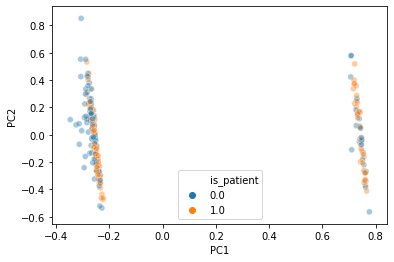

In [148]:
#PCA On Under Sampled Dataset
pca_under = PCA(n_components=2)
X_pca_under = pca_under.fit_transform(X_train_under)
print(pca_under.explained_variance_ratio_.cumsum())
y_temp_under = y_train_under
y_temp_under["PC1"] = X_pca_under[:,0]
y_temp_under["PC2"] = X_pca_under[:,1]
sns.scatterplot(data=y_temp_under, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_under["is_patient"].value_counts())

In [149]:
print(y_train_under.head())
y_train_under = y_train_under.drop(["PC1", "PC2"], axis=1)
print(y_train_under.head())

     is_patient       PC1       PC2
357         1.0 -0.269010  0.233227
223         0.0  0.710104 -0.109811
328         1.0 -0.243876 -0.234564
258         1.0 -0.258602  0.083724
69          1.0  0.721409  0.518398
     is_patient
357         1.0
223         0.0
328         1.0
258         1.0
69          1.0


<a id="graph3"></a>

[0.5588312 0.7331914]
0.0    291
1.0    291
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


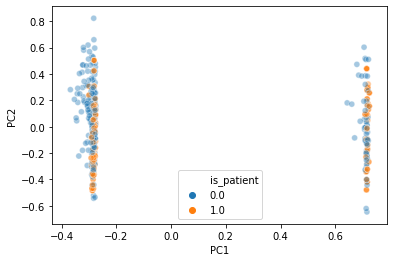

In [150]:
#PCA for Over Sampled Dataset
pca_over = PCA(n_components=2)
X_pca_over = pca_over.fit_transform(X_train_over)
print(pca_over.explained_variance_ratio_.cumsum())
y_temp_over = y_train_over
y_temp_over["PC1"] = X_pca_over[:,0]
y_temp_over["PC2"] = X_pca_over[:,1]
sns.scatterplot(data=y_temp_over, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_over["is_patient"].value_counts())

In [151]:
print(y_train_over.head())
y_train_over = y_train_over.drop(["PC1", "PC2"], axis=1)
print(y_train_over.head())

     is_patient       PC1       PC2
355         1.0 -0.285029 -0.220116
266         0.0 -0.288030  0.087318
86          1.0 -0.282254 -0.318068
5           1.0  0.717958 -0.169057
68          0.0 -0.283063 -0.025754
     is_patient
355         1.0
266         0.0
86          1.0
5           1.0
68          0.0


<a id="second"></a>

In [152]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On under sample dataset
print("Naive Bayes on Undersample dataset:")
clfFitPredict(GaussianNB(), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Naive Bayes on under sampled datset
print("\nCross Validation of Naive Bayes on Undersample dataset:")
crossValidation(GaussianNB(), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Undersample dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Undersample dataset:
[0.61165049 0.65686275 0.60784314 0.61764706] 

0.623500856653341

----------------------------------------------------------------------



In [153]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On under sampled dataset
print("SVM Classifier on Undersample dataset:")
clfFitPredict(LinearSVC(), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on SVM Classifier on under sampled datset
print("\nCross Validation of SVM on Undersample dataset:")
crossValidation(LinearSVC(), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Undersample dataset:

Confusion Matrix: 
[[68 57]
 [ 7 43]]

Accuracy : 0.6342857142857142
Sensitivity : 0.544
Precision: 0.9066666666666666
Specificity : 0.86
F-Score : 0.68

               precision    recall  f1-score   support

         0.0       0.91      0.54      0.68       125
         1.0       0.43      0.86      0.57        50

    accuracy                           0.63       175
   macro avg       0.67      0.70      0.63       175
weighted avg       0.77      0.63      0.65       175
 


Cross Validation of SVM on Undersample dataset:
[0.59223301 0.7254902  0.65686275 0.68627451] 

0.6652151151722825

----------------------------------------------------------------------



In [154]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On under sampled dataset
print("Logistic Regression on Undersample dataset:")
clfFitPredict(LogisticRegression(random_state=1), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Logistic Regression on under sampled datset
print("\nCross Validation of Logistic Regression on Undersample dataset:")
crossValidation(LogisticRegression(random_state=1), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression on Undersample dataset:

Confusion Matrix: 
[[80 45]
 [12 38]]

Accuracy : 0.6742857142857143
Sensitivity : 0.64
Precision: 0.8695652173913043
Specificity : 0.76
F-Score : 0.7373271889400922

               precision    recall  f1-score   support

         0.0       0.87      0.64      0.74       125
         1.0       0.46      0.76      0.57        50

    accuracy                           0.67       175
   macro avg       0.66      0.70      0.65       175
weighted avg       0.75      0.67      0.69       175
 


Cross Validation of Logistic Regression on Undersample dataset:
[0.54368932 0.70588235 0.64705882 0.64705882] 

0.6359223300970873

----------------------------------------------------------------------



In [155]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On under sampled dataset
print("KNN on Undersample dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on KNN on under sampled datset
print("\nCross Validation of KNN on Undersample dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN on Undersample dataset:

Confusion Matrix: 
[[98 27]
 [34 16]]

Accuracy : 0.6514285714285715
Sensitivity : 0.784
Precision: 0.7424242424242424
Specificity : 0.32
F-Score : 0.7626459143968871

               precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       125
         1.0       0.37      0.32      0.34        50

    accuracy                           0.65       175
   macro avg       0.56      0.55      0.55       175
weighted avg       0.64      0.65      0.64       175
 


Cross Validation of KNN on Undersample dataset:
[0.53398058 0.64705882 0.62745098 0.6372549 ] 

0.6114363221016562

----------------------------------------------------------------------



In [156]:
print("\n----------------------------------------------------------------------\n")

#5 RandomForest Classifier On under sampled dataset
print("RandomForest on Undersample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on RF on under sampled datset
print("\nCross Validation of Random Forest on Undersample dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

RandomForest on Undersample dataset:

Confusion Matrix: 
[[68 57]
 [ 9 41]]

Accuracy : 0.6228571428571429
Sensitivity : 0.544
Precision: 0.8831168831168831
Specificity : 0.82
F-Score : 0.6732673267326733

               precision    recall  f1-score   support

         0.0       0.88      0.54      0.67       125
         1.0       0.42      0.82      0.55        50

    accuracy                           0.62       175
   macro avg       0.65      0.68      0.61       175
weighted avg       0.75      0.62      0.64       175
 


Cross Validation of Random Forest on Undersample dataset:
[0.65048544 0.7254902  0.76470588 0.60784314] 

0.6871311631448697

----------------------------------------------------------------------



In [157]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for UnderSampled Dataset
print("Voting Classifier on under sampled dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf1 = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf1, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Voting Classifier on UnderSampled datset
print("\nCross Validation of Voting Classifier on under sampled dataset:")
crossValidation(vclf1, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on under sampled dataset:

Confusion Matrix: 
[[71 54]
 [ 8 42]]

Accuracy : 0.6457142857142857
Sensitivity : 0.568
Precision: 0.8987341772151899
Specificity : 0.84
F-Score : 0.6960784313725489

               precision    recall  f1-score   support

         0.0       0.90      0.57      0.70       125
         1.0       0.44      0.84      0.58        50

    accuracy                           0.65       175
   macro avg       0.67      0.70      0.64       175
weighted avg       0.77      0.65      0.66       175
 


Cross Validation of Voting Classifier on under sampled dataset:
[0.57281553 0.70588235 0.65686275 0.65686275] 

0.6481058442794593

----------------------------------------------------------------------



In [158]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on undersampled Dataset

dt_under = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_under = AdaBoostClassifier(base_estimator=dt_under, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on undersampled Dataset:")
clfFitPredict(adb_clf_under, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on AdaBoost Classifier on undersampled Dataset
print("\nCross Validation of AdaBoost Classifier on undersampled dataset:")
crossValidation(adb_clf_under, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on undersampled Dataset:

Confusion Matrix: 
[[69 56]
 [ 9 41]]

Accuracy : 0.6285714285714286
Sensitivity : 0.552
Precision: 0.8846153846153846
Specificity : 0.82
F-Score : 0.6798029556650247

               precision    recall  f1-score   support

         0.0       0.88      0.55      0.68       125
         1.0       0.42      0.82      0.56        50

    accuracy                           0.63       175
   macro avg       0.65      0.69      0.62       175
weighted avg       0.75      0.63      0.64       175
 


Cross Validation of AdaBoost Classifier on undersampled dataset:
[0.65048544 0.68627451 0.70588235 0.62745098] 

0.6675233200076147

----------------------------------------------------------------------



In [159]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_under = SVC(probability=True, kernel='linear')
adb_clf_svc_under = AdaBoostClassifier(base_estimator=svc_adb_under, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on undersampled Dataset:")
clfFitPredict(adb_clf_svc_under, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on AdaBoostClassifier on Orginial datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on undersampled dataset:")
crossValidation(adb_clf_svc_under, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on undersampled Dataset:

Confusion Matrix: 
[[56 69]
 [ 4 46]]

Accuracy : 0.5828571428571429
Sensitivity : 0.448
Precision: 0.9333333333333333
Specificity : 0.92
F-Score : 0.6054054054054054

               precision    recall  f1-score   support

         0.0       0.93      0.45      0.61       125
         1.0       0.40      0.92      0.56        50

    accuracy                           0.58       175
   macro avg       0.67      0.68      0.58       175
weighted avg       0.78      0.58      0.59       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on undersampled dataset:
[0.5631068  0.59803922 0.61764706 0.62745098] 

0.6015610127546164

----------------------------------------------------------------------



In [160]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On undersampled Dataset

gbc_under = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the undersampled dataset:")
clfFitPredict(gbc_under, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on GradientBoostingClassifier on undersampled datset
print("\nCross Validation of GradientBoostingClassifier on undersampled dataset:")
crossValidation(gbc_under, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the undersampled dataset:

Confusion Matrix: 
[[71 54]
 [14 36]]

Accuracy : 0.6114285714285714
Sensitivity : 0.568
Precision: 0.8352941176470589
Specificity : 0.72
F-Score : 0.6761904761904761

               precision    recall  f1-score   support

         0.0       0.84      0.57      0.68       125
         1.0       0.40      0.72      0.51        50

    accuracy                           0.61       175
   macro avg       0.62      0.64      0.60       175
weighted avg       0.71      0.61      0.63       175
 


Cross Validation of GradientBoostingClassifier on undersampled dataset:
[0.6407767  0.69607843 0.73529412 0.6372549 ] 

0.6773510375023796

----------------------------------------------------------------------



In [161]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the undersampled Dataset

xgb_clf_under = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the undersampled dataset:")
clfFitPredict(xgb_clf_under, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on XGBClassifier on undersampled dataset
print("\nCross Validation of XGBClassifier on undersampled dataset:")
crossValidation(xgb_clf_under, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the undersampled dataset:

Confusion Matrix: 
[[80 45]
 [17 33]]

Accuracy : 0.6457142857142857
Sensitivity : 0.64
Precision: 0.8247422680412371
Specificity : 0.66
F-Score : 0.7207207207207208

               precision    recall  f1-score   support

         0.0       0.82      0.64      0.72       125
         1.0       0.42      0.66      0.52        50

    accuracy                           0.65       175
   macro avg       0.62      0.65      0.62       175
weighted avg       0.71      0.65      0.66       175
 


Cross Validation of XGBClassifier on undersampled dataset:
[0.59223301 0.58823529 0.58823529 0.59803922] 

0.5916857034075766

----------------------------------------------------------------------



In [162]:
#Bagging Classifier On the UnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on UnderSampled dataset :")
clfFitPredict(clf_bagging, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Bagging Classifier on UnderSampled datset
print("\nCross Validation of Bagging Classifier on UnderSampled dataset :")
crossValidation(clf_bagging, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On UnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_under, X_test, y_train_under, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On UnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_under, y_under, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1


Bagging Classifier on UnderSampled dataset :

Confusion Matrix: 
[[87 38]
 [19 31]]

Accuracy : 0.6742857142857143
Sensitivity : 0.696
Precision: 0.8207547169811321
Specificity : 0.62
F-Score : 0.7532467532467533

               precision    recall  f1-score   support

         0.0       0.82      0.70      0.75       125
         1.0       0.45      0.62      0.52        50

    accuracy                           0.67       175
   macro avg       0.64      0.66      0.64       175
weighted avg       0.71      0.67      0.69       175
 


Cross Validation of Bagging Classifier on UnderSampled dataset :
[0.61165049 0.65686275 0.76470588 0.64705882] 

0.6700694841043213

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On UnderSampled Dataset

Confusion Matrix: 
[[87 38]
 [19 31]]

Accuracy : 0.6742857142857143
Sensitivity : 0.696
Precision: 0.8207547169811321
Specificity : 0.62
F-Score : 0.7532467532467533

 

In [163]:
#Perceptron On The UnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on UnderSampled dataset :")
clfFitPredict(clf_percept, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Perceptron on UnderSampled datset
print("\nCross Validation of Perceptron on UnderSampled dataset :")
crossValidation(clf_percept, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on UnderSampled dataset :

Confusion Matrix: 
[[108  17]
 [ 33  17]]

Accuracy : 0.7142857142857143
Sensitivity : 0.864
Precision: 0.7659574468085106
Specificity : 0.34
F-Score : 0.8120300751879698

               precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       125
         1.0       0.50      0.34      0.40        50

    accuracy                           0.71       175
   macro avg       0.63      0.60      0.61       175
weighted avg       0.69      0.71      0.70       175
 


Cross Validation of Perceptron on UnderSampled dataset :
[0.63106796 0.62745098 0.6372549  0.60784314] 

0.625904245193223

----------------------------------------------------------------------



<a id="pca2"></a>

In [164]:
#Classification With UnderSampled PCA Training dataset

pca_under_1 = PCA()
X_pca_under_1 = pca_under_1.fit_transform(X_train_under)
print(pca_under_1.explained_variance_ratio_.cumsum())

pca_under1 = PCA(n_components=6)
X_pca_train_under1 = pd.DataFrame(pca_under1.fit_transform(X_train_under))
X_pca_test_under1 = pd.DataFrame(pca_under1.transform(X_test))

X_pca_under1 = pd.concat([X_pca_train_under1, X_pca_test_under1], axis=0)

[0.54775031 0.72116793 0.82227    0.90717459 0.95267518 0.98177
 0.99355516 0.99794462 0.99913443 1.        ]


In [165]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On UnderSampled PCA Training dataset
print("Naive Bayes on UnderSampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on Naive Bayes on UnderSampled PCA Training dataset:
print("\nCross Validation of Naive Bayes on UnderSampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On UnderSampled PCA Training dataset:
print("SVM Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on SVM Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of SVM Classifier on UnderSampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On UnderSampled PCA Training dataset:
print("Logistic Regression Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on Logistic Regression Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of Logistic Regression Classifier on UnderSampled PCA Training dataset::")
crossValidation(LogisticRegression(), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On UnderSampled PCA Training dataset
print("KNN Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on KNN Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of KNN Classifier on UnderSampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On UnderSampled PCA Training dataset:
print("Random Forest Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on Random Forest Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of Random Forest Classifier on UnderSampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for UnderSampled PCA Training dataset:
print("Voting Classifier on UnderSampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on Voting Classifier on UnderSampled PCA Training dataset:
print("\nCross Validation of Voting Classifier on UnderSampled PCA Training dataset:")
crossValidation(vclf, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on undersampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_under, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on AdaBoost Classifier with Decision Tree on undersampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on undersampled PCA Training dataset:")
crossValidation(adb_clf_under, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator on undersampled PCA Training Dataset 

print("\nAdaBoostClassifier with SVC as base estimator on undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_under, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on AdaBoostClassifier on undersampled PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVC as base estimator on undersampled PCA Training dataset:")
crossValidation(adb_clf_svc_under, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On undersampled PCA Training Dataset

print("\nGradientBoostingClassifier on the undersampled PCA Training dataset:")
clfFitPredict(gbc_under, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on GradientBoostingClassifier on undersampled datset
print("\nCross Validation of GradientBoostingClassifier on undersampled dataset:")
crossValidation(gbc_under, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the undersampled PCA Training Dataset
print("\nXGBClassifier on the undersampled PCA Training dataset:")
clfFitPredict(xgb_clf_under, X_pca_train_under1, X_pca_test_under1, y_train_under, y_test)

#Cross Validation on XGBClassifier on undersampled PCA Training dataset
print("\nCross Validation of XGBClassifier on undersampled PCA Training dataset:")
crossValidation(xgb_clf_under, X_pca_under1, y_under, 4)

print("\n----------------------------------------------------------------------\n")

#Bagging Classifier On the UnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on UnderSampled dataset :")
clfFitPredict(clf_bagging, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Bagging Classifier on UnderSampled datset
print("\nCross Validation of Bagging Classifier on UnderSampled dataset :")
crossValidation(clf_bagging, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On UnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_under, X_test, y_train_under, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On UnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_under, y_under, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The UnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on UnderSampled dataset :")
clfFitPredict(clf_percept, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Perceptron on UnderSampled datset
print("\nCross Validation of Perceptron on UnderSampled dataset :")
crossValidation(clf_percept, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on UnderSampled PCA Training dataset:

Confusion Matrix: 
[[55 70]
 [15 35]]

Accuracy : 0.5142857142857142
Sensitivity : 0.44
Precision: 0.7857142857142857
Specificity : 0.7
F-Score : 0.5641025641025641

               precision    recall  f1-score   support

         0.0       0.79      0.44      0.56       125
         1.0       0.33      0.70      0.45        50

    accuracy                           0.51       175
   macro avg       0.56      0.57      0.51       175
weighted avg       0.66      0.51      0.53       175
 


Cross Validation of Naive Bayes on UnderSampled PCA Training dataset:
[0.61165049 0.6372549  0.62745098 0.57843137] 

0.6136969350847135

----------------------------------------------------------------------

SVM Classifier on UnderSampled PCA Training dataset:

Confusion Matrix: 
[[68 57]
 [ 9 41]]

Accuracy : 0.6228571428571429
Sensitivity : 0.544
Precision: 0.8831168831168

[0.61165049 0.65686275 0.76470588 0.64705882] 

0.6700694841043213

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On UnderSampled Dataset

Confusion Matrix: 
[[87 38]
 [19 31]]

Accuracy : 0.6742857142857143
Sensitivity : 0.696
Precision: 0.8207547169811321
Specificity : 0.62
F-Score : 0.7532467532467533

               precision    recall  f1-score   support

         0.0       0.82      0.70      0.75       125
         1.0       0.45      0.62      0.52        50

    accuracy                           0.67       175
   macro avg       0.64      0.66      0.64       175
weighted avg       0.71      0.67      0.69       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On UnderSampled Dataset
[0.61165049 0.65686275 0.76470588 0.64705882] 

0.6700694841043213

----------------------------------------------------------------------

Bagging Classifier with Perceptron as bas

<a id="hyper2"></a>

In [166]:
#Hyperparameter Tuning for SVC On UnderSampled Dataset
random_svc_under = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_svc_under, "RSCV_SVC_under.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished


['RSCV_SVC_under.pkl']

In [167]:
print("\nRandomizedSearchCV on SVC for UnderSampled Dataset - ")
RSCV_SVC_under = joblib.load("RSCV_SVC_under.pkl")
print("\nBest Score :", RSCV_SVC_under.best_score_)
print("\nBest Parameters :", RSCV_SVC_under.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_SVC_under.predict(X_test)))


RandomizedSearchCV on SVC for UnderSampled Dataset - 

Best Score : 0.6885869565217391

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Accuracy Score : 0.6057142857142858


In [168]:
#Hyperparameter Tuning for SVC On UnderSampled PCA Dataset
random_svc_pca_under = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(random_svc_pca_under, "RSCV_SVC_pca_under.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


['RSCV_SVC_pca_under.pkl']

In [169]:
print("\nRandomizedSearchCV on SVC for UnderSampled PCA Dataset - ")
RSCV_SVC_pca_under = joblib.load("RSCV_SVC_pca_under.pkl")
print("\nBest Score :", RSCV_SVC_pca_under.best_score_)
print("\nBest Parameters :", RSCV_SVC_pca_under.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_SVC_pca_under.predict(X_pca_test_under1)))


RandomizedSearchCV on SVC for UnderSampled PCA Dataset - 

Best Score : 0.6797101449275362

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Accuracy Score : 0.5885714285714285


In [170]:
#Hyperparameter Tuning on LR on UnderSampled Dataset
random_logreg_under = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,
                            scoring='accuracy', 
                            refit=True,
                            verbose=1,
                            n_jobs=-1,
                            n_iter=100,
                            random_state=0
                           )

random_logreg_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_logreg_under, "RSCV_LR_under.pkl")

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    7.0s finished
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['RSCV_LR_under.pkl']

In [171]:
print("\nRandomizedSearchCV on Logistic Regression on UnderSampled Dataset -")
RSCV_LR_under_loaded = joblib.load("RSCV_LR_under.pkl")
print("\nBest Parameters :", RSCV_LR_under_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_under_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_under_loaded.predict(X_test)))


RandomizedSearchCV on Logistic Regression on UnderSampled Dataset -

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 50}

Best Score : 0.7268115942028986

Accuracy Score : 0.5942857142857143


In [172]:
random_logreg_pca_under = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_logreg_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(random_logreg_pca_under, "RSCV_LR_pca_under.pkl")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


['RSCV_LR_pca_under.pkl']

In [173]:
print("\nRandomizedSearchCV for LR on UnderSampled PCA Dataset -")
RSCV_LR_pca_under_loaded = joblib.load("RSCV_LR_pca_under.pkl")
print("\nBest Parameters :", RSCV_LR_pca_under_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_under_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_under_loaded.predict(X_pca_test_under1)))


RandomizedSearchCV for LR on UnderSampled PCA Dataset -

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.6753623188405797

Accuracy Score : 0.6285714285714286


In [174]:
random_rf_under = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False, 
                               cv=10,
                               scoring='accuracy', 
                               refit=True,
                               n_jobs=-1,
                               random_state=0
                              )
random_rf_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_rf_under, "RSCV_RF_under.pkl")

['RSCV_RF_under.pkl']

In [175]:
print("\nRandomizedSearchCV for RF for UnderSampled Dataset -")
RSCV_RF_under_loaded = joblib.load("RSCV_RF_under.pkl")
print("\nBest Parameter :", RSCV_RF_under_loaded.best_params_)
print("\nBest Score :", RSCV_RF_under_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_under_loaded.predict(X_test)))



RandomizedSearchCV for RF for UnderSampled Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.7126811594202899

Accuracy Score : 0.6285714285714286


In [176]:
random_rf_pca_under = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_rf_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(random_rf_pca_under, "RSCV_RF_pca_under.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.9s finished


['RSCV_RF_pca_under.pkl']

In [177]:
print("\nRandomizedSearchCV for RF for UnderSampled PCA Dataset -")
RSCV_RF_pca_under_loaded = joblib.load("RSCV_RF_pca_under.pkl")
print("\nBest Parameter :", RSCV_RF_pca_under_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_under_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_under_loaded.predict(X_pca_test_under1)))


RandomizedSearchCV for RF for UnderSampled PCA Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.30000000000000004, 'max_features': 'auto', 'max_depth': 22.0, 'bootstrap': True}

Best Score : 0.6286231884057971

Accuracy Score : 0.6114285714285714


In [178]:
#RandomizedSearchCV for GradientBoostingClassifier on UnderSampled Dataset
clf_gbc_under = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(clf_gbc_under,'RSCV_GBC_under.pkl')

['RSCV_GBC_under.pkl']

In [179]:
print("\nRandomizedSearchCV for GradientBoostingClassifier on UnderSampled Dataset :")
RSCV_GBC_under_loaded = joblib.load("RSCV_GBC_under.pkl")
print("\nBest Score :", RSCV_GBC_under_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_under_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_under_loaded.predict(X_test)))



RandomizedSearchCV for GradientBoostingClassifier on UnderSampled Dataset :

Best Score : 0.7175724637681159

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1, 'max_depth': 22.0, 'learning_rate': 0.005}

Accuracy Score : 0.6285714285714286


In [180]:
#RandomizedSearchCV for GradientBoostingClassifier on UnderSampled PCA Dataset
clf_gbc_pca_under = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
clf_gbc_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(clf_gbc_pca_under,'RSCV_GBC_pca_under.pkl')

['RSCV_GBC_pca_under.pkl']

In [181]:
print("\nRandomizedSearchCV for GBC on UnderSampled PCA Dataset :")
RSCV_GBC_pca_under_loaded = joblib.load("RSCV_GBC_pca_under.pkl")
print("\nBest Score -", RSCV_GBC_pca_under_loaded.best_score_)
print("\nBest Parameter -", RSCV_GBC_pca_under_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_GBC_pca_under_loaded.predict(X_pca_test_under1)))


RandomizedSearchCV for GBC on UnderSampled PCA Dataset :

Best Score - 0.6666666666666665

Best Parameter - {'n_estimators': 300, 'min_samples_split': 0.6, 'min_samples_leaf': 0.4, 'max_depth': 24.0, 'learning_rate': 0.05}

Accuracy Score - 0.6


In [182]:
#Hyperparameter for AdaBoost Classifier on UnderSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_under = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_adaboost_under, "RSCV_ADC_under.pkl")

['RSCV_ADC_under.pkl']

In [183]:
print("\nRandomizedSearchCV for AdaBoostClassifier with Decision Tree as base classifier on Undersampled Dataset :")
RSCV_ADC_under_loaded = joblib.load("RSCV_ADC_under.pkl")
print("\nBest Score -", RSCV_ADC_under_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_under_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_under_loaded.predict(X_test)))


RandomizedSearchCV for AdaBoostClassifier with Decision Tree as base classifier on Undersampled Dataset :

Best Score - 0.5702898550724639

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.6171428571428571


In [184]:
#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_under = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_under.fit(X_train_under, y_train_under.values.ravel())
joblib.dump(random_adaboost_svc_under, "RSCV_ADC_SVC_under.pkl")

['RSCV_ADC_SVC_under.pkl']

In [185]:
print("\nRandomizedSearchCV for ADC with SVC on UnderSampled Dataset -")
RSCV_ADC_SVC_under_loaded = joblib.load("RSCV_ADC_SVC_under.pkl")
print("\nBest Score :", RSCV_ADC_SVC_under_loaded.best_score_)
print("\nBest Parameter :", RSCV_ADC_SVC_under_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_under_loaded.predict(X_test)))



RandomizedSearchCV for ADC with SVC on UnderSampled Dataset -

Best Score : 0.48695652173913045

Best Parameter : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Accuracy Score : 0.6228571428571429


In [186]:
#Hyperparameter Tuning for ADC with SVC as base estimator on UnderSampled PCA Dataset
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_under = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

#X_pca_train_under1, X_pca_test_under1, y_train_under, y_test
random_adaboost_svc_pca_under.fit(X_pca_train_under1, y_train_under.values.ravel())
joblib.dump(random_adaboost_svc_pca_under, "RSCV_ADC_SVC_pca_under.pkl")

['RSCV_ADC_SVC_pca_under.pkl']

In [187]:
print("\nRandomizedSearchCV for ADC with SVC as base estimator on UnderSampled PCA Dataset :")
RSCV_ADC_SVC_pca_under_loaded = joblib.load("RSCV_ADC_SVC_pca_under.pkl")
print("\nBest Score -", RSCV_ADC_SVC_pca_under_loaded.best_score_)
print("\nBest Parameter -", RSCV_ADC_SVC_pca_under_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_ADC_SVC_pca_under_loaded.predict(X_pca_test_under1)))


RandomizedSearchCV for ADC with SVC as base estimator on UnderSampled PCA Dataset :

Best Score - 0.49112318840579716

Best Parameter - {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Accuracy Score - 0.6114285714285714


In [188]:
#Hyperparameter Tuning on XGBoostClassifier 


<a id="third"></a>

In [189]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Over sample dataset
print("Naive Bayes on Oversample dataset:")
clfFitPredict(GaussianNB(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Naive Bayes on Over sampled datset
print("\nCross Validation of Naive Bayes on Oversample dataset:")
crossValidation(GaussianNB(), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Oversample dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Oversample dataset:
[0.66315789 0.64550265 0.65608466 0.64021164] 

0.651239209133946

----------------------------------------------------------------------



In [190]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On Over sample dataset
print("SVM Classifier on Oversample dataset:")
clfFitPredict(LinearSVC(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on SVM Classifier on Over sampled datset
print("\nCross Validation of SVM Classifier on Oversample dataset:")
crossValidation(LinearSVC(), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Oversample dataset:

Confusion Matrix: 
[[68 57]
 [ 9 41]]

Accuracy : 0.6228571428571429
Sensitivity : 0.544
Precision: 0.8831168831168831
Specificity : 0.82
F-Score : 0.6732673267326733

               precision    recall  f1-score   support

         0.0       0.88      0.54      0.67       125
         1.0       0.42      0.82      0.55        50

    accuracy                           0.62       175
   macro avg       0.65      0.68      0.61       175
weighted avg       0.75      0.62      0.64       175
 


Cross Validation of SVM Classifier on Oversample dataset:
[0.73157895 0.68253968 0.67195767 0.66666667] 

0.6881857421331106

----------------------------------------------------------------------



In [191]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On Over sample dataset
print("Logistic Regression Classifier on Oversample dataset:")
clfFitPredict(LogisticRegression(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Logistic Regression Classifier on Over sampled datset
print("\nCross Validation of Logistic Regression Classifier on Oversample dataset:")
crossValidation(LogisticRegression(), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Oversample dataset:

Confusion Matrix: 
[[74 51]
 [10 40]]

Accuracy : 0.6514285714285715
Sensitivity : 0.592
Precision: 0.8809523809523809
Specificity : 0.8
F-Score : 0.708133971291866

               precision    recall  f1-score   support

         0.0       0.88      0.59      0.71       125
         1.0       0.44      0.80      0.57        50

    accuracy                           0.65       175
   macro avg       0.66      0.70      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Logistic Regression Classifier on Oversample dataset:
[0.68947368 0.64550265 0.64550265 0.67724868] 

0.6644319131161236

----------------------------------------------------------------------



In [192]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On Over sample dataset
print("KNN Classifier on Oversample dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on KNN Classifier on Over sampled datset
print("\nCross Validation of KNN Classifier on Oversample dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Oversample dataset:

Confusion Matrix: 
[[103  22]
 [ 33  17]]

Accuracy : 0.6857142857142857
Sensitivity : 0.824
Precision: 0.7573529411764706
Specificity : 0.34
F-Score : 0.789272030651341

               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       125
         1.0       0.44      0.34      0.38        50

    accuracy                           0.69       175
   macro avg       0.60      0.58      0.59       175
weighted avg       0.67      0.69      0.67       175
 


Cross Validation of KNN Classifier on Oversample dataset:
[0.78947368 0.80952381 0.76190476 0.6984127 ] 

0.7648287385129491

----------------------------------------------------------------------



In [193]:
print("\n----------------------------------------------------------------------\n")

#5 Random Forest Classifier On Over sample dataset
print("Random Forest Classifier on Oversample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Random Forest Classifier on Over sampled datset
print("\nCross Validation of Random Forest Classifier on Oversample dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Oversample dataset:

Confusion Matrix: 
[[80 45]
 [11 39]]

Accuracy : 0.68
Sensitivity : 0.64
Precision: 0.8791208791208791
Specificity : 0.78
F-Score : 0.7407407407407407

               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74       125
         1.0       0.46      0.78      0.58        50

    accuracy                           0.68       175
   macro avg       0.67      0.71      0.66       175
weighted avg       0.76      0.68      0.70       175
 


Cross Validation of Random Forest Classifier on Oversample dataset:
[0.83157895 0.75132275 0.6984127  0.68783069] 

0.7422862712336397

----------------------------------------------------------------------



In [194]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for OverSampled Dataset

print("Voting Classifier on over sampled dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Voting Classifier on UnderSampled datset
print("\nCross Validation of Voting Classifier on under sampled dataset:")
crossValidation(vclf, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on over sampled dataset:

Confusion Matrix: 
[[74 51]
 [10 40]]

Accuracy : 0.6514285714285715
Sensitivity : 0.592
Precision: 0.8809523809523809
Specificity : 0.8
F-Score : 0.708133971291866

               precision    recall  f1-score   support

         0.0       0.88      0.59      0.71       125
         1.0       0.44      0.80      0.57        50

    accuracy                           0.65       175
   macro avg       0.66      0.70      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Voting Classifier on under sampled dataset:
[0.74210526 0.6984127  0.66666667 0.66137566] 

0.6921400724032303

----------------------------------------------------------------------



In [195]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Oversampled Dataset

dt_over = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_over = AdaBoostClassifier(base_estimator=dt_over, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on Oversampled Dataset:")
clfFitPredict(adb_clf_over, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on AdaBoost Classifier on Oversampled Dataset
print("\nCross Validation of AdaBoost Classifier on Oversampled dataset:")
crossValidation(adb_clf_over, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on Oversampled Dataset:

Confusion Matrix: 
[[71 54]
 [ 8 42]]

Accuracy : 0.6457142857142857
Sensitivity : 0.568
Precision: 0.8987341772151899
Specificity : 0.84
F-Score : 0.6960784313725489

               precision    recall  f1-score   support

         0.0       0.90      0.57      0.70       125
         1.0       0.44      0.84      0.58        50

    accuracy                           0.65       175
   macro avg       0.67      0.70      0.64       175
weighted avg       0.77      0.65      0.66       175
 


Cross Validation of AdaBoost Classifier on Oversampled dataset:
[0.76842105 0.68783069 0.67195767 0.69312169] 

0.7053327763854079

----------------------------------------------------------------------



In [196]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator on OverSampled Dataset

svc_adb_over = SVC(probability=True, kernel='linear')
adb_clf_svc_over = AdaBoostClassifier(base_estimator=svc_adb_over, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on Oversampled Dataset:")
clfFitPredict(adb_clf_svc_over, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on AdaBoostClassifier on Oversampled datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Oversampled dataset:")
crossValidation(adb_clf_svc_over, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on Oversampled Dataset:

Confusion Matrix: 
[[88 37]
 [18 32]]

Accuracy : 0.6857142857142857
Sensitivity : 0.704
Precision: 0.8301886792452831
Specificity : 0.64
F-Score : 0.7619047619047619

               precision    recall  f1-score   support

         0.0       0.83      0.70      0.76       125
         1.0       0.46      0.64      0.54        50

    accuracy                           0.69       175
   macro avg       0.65      0.67      0.65       175
weighted avg       0.73      0.69      0.70       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Oversampled dataset:
[0.69473684 0.64021164 0.6031746  0.6031746 ] 

0.6353244221665275

----------------------------------------------------------------------



In [197]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Oversampled Dataset

gbc_over = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the Oversampled dataset:")
clfFitPredict(gbc_over, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on GradientBoostingClassifier on Oversampled datset
print("\nCross Validation of GradientBoostingClassifier on Oversampled dataset:")
crossValidation(gbc_over, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the Oversampled dataset:

Confusion Matrix: 
[[84 41]
 [15 35]]

Accuracy : 0.68
Sensitivity : 0.672
Precision: 0.8484848484848485
Specificity : 0.7
F-Score : 0.75

               precision    recall  f1-score   support

         0.0       0.85      0.67      0.75       125
         1.0       0.46      0.70      0.56        50

    accuracy                           0.68       175
   macro avg       0.65      0.69      0.65       175
weighted avg       0.74      0.68      0.69       175
 


Cross Validation of GradientBoostingClassifier on Oversampled dataset:
[0.75263158 0.74603175 0.62962963 0.72486772] 

0.7132901698691172

----------------------------------------------------------------------



In [198]:

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Oversampled Dataset

xgb_clf_over = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the Oversampled dataset:")
clfFitPredict(xgb_clf_over, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on XGBClassifier on Oversampled dataset
print("\nCross Validation of XGBClassifier on Oversampled dataset:")
crossValidation(xgb_clf_over, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the Oversampled dataset:

Confusion Matrix: 
[[79 46]
 [18 32]]

Accuracy : 0.6342857142857142
Sensitivity : 0.632
Precision: 0.8144329896907216
Specificity : 0.64
F-Score : 0.7117117117117119

               precision    recall  f1-score   support

         0.0       0.81      0.63      0.71       125
         1.0       0.41      0.64      0.50        50

    accuracy                           0.63       175
   macro avg       0.61      0.64      0.61       175
weighted avg       0.70      0.63      0.65       175
 


Cross Validation of XGBClassifier on Oversampled dataset:
[0.54736842 0.55026455 0.55026455 0.55026455] 

0.5495405179615706

----------------------------------------------------------------------



In [199]:
#Bagging Classifier On the OverSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on OverSampled dataset :")
clfFitPredict(clf_bagging, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Bagging Classifier on OverSampled datset
print("\nCross Validation of Bagging Classifier on OverSampled dataset :")
crossValidation(clf_bagging, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On OverSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_over, X_test, y_train_over, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On OverSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_over, y_over, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on OverSampled dataset :

Confusion Matrix: 
[[103  22]
 [ 31  19]]

Accuracy : 0.6971428571428572
Sensitivity : 0.824
Precision: 0.7686567164179104
Specificity : 0.38
F-Score : 0.7953667953667953

               precision    recall  f1-score   support

         0.0       0.77      0.82      0.80       125
         1.0       0.46      0.38      0.42        50

    accuracy                           0.70       175
   macro avg       0.62      0.60      0.61       175
weighted avg       0.68      0.70      0.69       175
 


Cross Validation of Bagging Classifier on OverSampled dataset :
[0.86842105 0.82539683 0.78835979 0.71957672] 

0.8004385964912281

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On OverSampled Dataset

Confusion Matrix: 
[[103  22]
 [ 31  19]]

Accuracy : 0.6971428571428572
Sensitivity : 0.824
Precision: 0.7686567164179104
Specificity : 0.38
F-Score : 0.79536679536679

In [200]:
#Perceptron On The OverSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on OverSampled dataset :")
clfFitPredict(clf_percept, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Perceptron on OverSampled datset
print("\nCross Validation of Perceptron on OverSampled dataset :")
crossValidation(clf_percept, X_over, y_over, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on OverSampled dataset :

Confusion Matrix: 
[[92 33]
 [22 28]]

Accuracy : 0.6857142857142857
Sensitivity : 0.736
Precision: 0.8070175438596491
Specificity : 0.56
F-Score : 0.7698744769874476

               precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       125
         1.0       0.46      0.56      0.50        50

    accuracy                           0.69       175
   macro avg       0.63      0.65      0.64       175
weighted avg       0.71      0.69      0.69       175
 


Cross Validation of Perceptron on OverSampled dataset :
[0.59473684 0.65608466 0.61375661 0.56084656] 

0.6063561681982734

----------------------------------------------------------------------



<a id="pca3"></a>

In [201]:
#Classification With OverSampled PCA Training dataset:

pca_over_1 = PCA()
X_pca_over_1 = pca_over_1.fit_transform(X_train_over)
print(pca_over_1.explained_variance_ratio_.cumsum())

pca_over1 = PCA(n_components=5)
X_pca_train_over1 = pd.DataFrame(pca_over1.fit_transform(X_train_over))
X_pca_test_over1 = pd.DataFrame(pca_over1.transform(X_test))

X_pca_over1 = pd.concat([X_pca_train_over1, X_pca_test_over1], axis=0)

[0.5588312  0.7331914  0.82880525 0.91173706 0.95034121 0.97520245
 0.99524933 0.99806641 0.99938238 1.        ]


In [202]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On OverSampled PCA Training dataset:
print("Naive Bayes on OverSampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Naive Bayes on OverSampled PCA Training dataset:
print("\nCross Validation of Naive Bayes on OverSampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On OverSampled PCA Training dataset:
print("SVM Classifier on OverSampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on SVM Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of SVM Classifier on OverSampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On OverSampled PCA Training dataset:
print("Logistic Regression Classifier on OverSampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Logistic Regression Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of Logistic Regression Classifier on OverSampled PCA Training dataset::")
crossValidation(LogisticRegression(), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On OverSampled PCA Training dataset
print("KNN Classifier on OverSampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on KNN Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of KNN Classifier on OverSampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On OverSampled PCA Training dataset:
print("Random Forest Classifier on OverSampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Random Forest Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of Random Forest Classifier on OverSampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for OverSampled PCA Training dataset:
print("Voting Classifier on OverSampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Voting Classifier on OverSampled PCA Training dataset:
print("\nCross Validation of Voting Classifier on OverSampled PCA Training dataset:")
crossValidation(vclf, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator 

print("\nAdaBoostClassifier with Decision Tree as base estimator on Oversampled PCA Dataset:")
clfFitPredict(adb_clf_over, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on AdaBoost Classifier on Oversampled PCA Dataset
print("\nCross Validation of AdaBoost Classifier on Oversampled PCA dataset:")
crossValidation(adb_clf_over, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on oversampled PCA Dataset:")
clfFitPredict(adb_clf_svc_over, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on AdaBoostClassifier on Oversampled PCA Training  datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Oversampled PCA Training dataset:")
crossValidation(adb_clf_svc_over, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Oversampled PCA Training Dataset

print("\nGradientBoostingClassifier on the Oversampled PCA dataset:")
clfFitPredict(gbc_over, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on GradientBoostingClassifier on Oversampled PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on Oversampled PCA Training dataset:")
crossValidation(gbc_over, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Oversampled PCA Training Dataset

print("\nXGBClassifier on the Oversampled PCA Training dataset:")
clfFitPredict(xgb_clf_over, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on XGBClassifier on Oversampled PCA Training dataset
print("\nCross Validation of XGBClassifier on Oversampled PCA Training dataset:")
crossValidation(xgb_clf_over, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

#11 Bagging Classifier On the OverSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on OverSampled dataset :")
clfFitPredict(clf_bagging, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Bagging Classifier on OverSampled datset
print("\nCross Validation of Bagging Classifier on OverSampled dataset :")
crossValidation(clf_bagging, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On UnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On UnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca_over1, y_over, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#12 Perceptron On The OverSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on OverSampled dataset :")
clfFitPredict(clf_percept, X_pca_train_over1, X_pca_test_over1, y_train_over, y_test)

#Cross Validation on Perceptron on OverSampled datset
print("\nCross Validation of Perceptron on OverSampled dataset :")
crossValidation(clf_percept, X_pca_over1, y_over, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on OverSampled PCA Training dataset:

Confusion Matrix: 
[[59 66]
 [12 38]]

Accuracy : 0.5542857142857143
Sensitivity : 0.472
Precision: 0.8309859154929577
Specificity : 0.76
F-Score : 0.6020408163265306

               precision    recall  f1-score   support

         0.0       0.83      0.47      0.60       125
         1.0       0.37      0.76      0.49        50

    accuracy                           0.55       175
   macro avg       0.60      0.62      0.55       175
weighted avg       0.70      0.55      0.57       175
 


Cross Validation of Naive Bayes on OverSampled PCA Training dataset:
[0.65789474 0.57142857 0.58730159 0.6031746 ] 

0.6049498746867168

----------------------------------------------------------------------

SVM Classifier on OverSampled PCA Training dataset:

Confusion Matrix: 
[[72 53]
 [ 9 41]]

Accuracy : 0.6457142857142857
Sensitivity : 0.576
Precision: 0.88888888888888

[0.91578947 0.83068783 0.78835979 0.70899471] 

0.8109579504316347

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On UnderSampled Dataset

Confusion Matrix: 
[[102  23]
 [ 33  17]]

Accuracy : 0.68
Sensitivity : 0.816
Precision: 0.7555555555555555
Specificity : 0.34
F-Score : 0.7846153846153846

               precision    recall  f1-score   support

         0.0       0.76      0.82      0.78       125
         1.0       0.42      0.34      0.38        50

    accuracy                           0.68       175
   macro avg       0.59      0.58      0.58       175
weighted avg       0.66      0.68      0.67       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On UnderSampled Dataset
[0.91578947 0.83068783 0.78835979 0.70899471] 

0.8109579504316347

----------------------------------------------------------------------

Bagging Classifier with Perceptron as base estimato

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id="hyper3"></a>

In [203]:
#Hyperparameter Tuning for SVC on OverSampled Dataset 
random_svc_over = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )
random_svc_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_svc_over, "RSCV_SVC_over.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


['RSCV_SVC_over.pkl']

In [204]:
print("\nRandomizedSearchCV for SVC on OverSampled Dataset :")
RSCV_SVC_over_loaded = joblib.load("RSCV_SVC_over.pkl")
print("\nBest Parameters :", RSCV_SVC_over_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_over_loaded.predict(X_test)))


RandomizedSearchCV for SVC on OverSampled Dataset :

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.005, 'C': 100}

Best Score : 0.6871420222092344

Accuracy Score : 0.5828571428571429


In [205]:
#Hyperparameter Tuning for SVC with OverSampled PCA Dataset
random_svc_pca_over = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )

random_svc_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_svc_pca_over, "RSCV_SVC_pca_over.pkl")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


['RSCV_SVC_pca_over.pkl']

In [206]:
print("\nRandomizedSearchCV on SVC with OverSampled PCA Dataset :")
RSCV_SVC_pca_over_loaded = joblib.load("RSCV_SVC_pca_over.pkl")
print("\nBest Score -", RSCV_SVC_pca_over_loaded.best_score_)
print("\nBest Paramters -", RSCV_SVC_pca_over_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_SVC_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV on SVC with OverSampled PCA Dataset :

Best Score - 0.6888661601402688

Best Paramters - {'kernel': 'sigmoid', 'gamma': 0.005, 'C': 100}

Accuracy Score - 0.5828571428571429


In [207]:
#Hyperparameter Tuning for Logistic Regression 

#https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

random_logreg_over = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,
                            scoring='accuracy', 
                            refit=True,
                            verbose=1,
                            n_jobs=-1,
                            n_iter=100,
                            random_state=0
                           )
#X_train_over, X_test, y_train_over, y_test
random_logreg_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_logreg_over, "RSCV_LR_over.pkl")
# print("\nBest Parameters :",random_logreg.best_params_) 
# print("\nBest Score :",random.best_score_)
# print("\nAccuracy Score :",accuracy_score(y_test, random_logreg.predict(X_test)))


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s
/home/srix/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    7.7s finished


['RSCV_LR_over.pkl']

In [208]:
print("\nRandomizedSearchCV for LR on OverSampled Dataset :")
RSCV_LR_over_loaded = joblib.load("RSCV_LR_over.pkl")
print("\nBest Parameters :", RSCV_LR_over_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_over_loaded.predict(X_test)))



RandomizedSearchCV for LR on OverSampled Dataset :

Best Parameters : {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}

Best Score : 0.7471361776738749

Accuracy Score : 0.6


In [209]:
#Hyperparameter Tuning for LR with OverSampled PCA Dataset
random_logreg_pca_over = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
random_logreg_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_logreg_pca_over, "RSCV_LR_pca_over.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_LR_pca_over.pkl']

In [210]:
print("\nRandomizedSearchCV on LR with OverSampled PCA Dataset :")
RSCV_LR_pca_over_loaded = joblib.load("RSCV_LR_pca_over.pkl")
print("\nBest params -", RSCV_LR_pca_over_loaded.best_params_)
print("\nBest Score - ", RSCV_LR_pca_over_loaded.best_score_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_LR_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV on LR with OverSampled PCA Dataset :

Best params - {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score -  0.7042665108123904

Accuracy Score - 0.6342857142857142


In [211]:
#Hyperparameter Tuning for RandomForest On OverSampled Dataset
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

random_rf_over = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False, 
                               cv=10,
                               scoring='accuracy', 
                               refit=True,
                               n_jobs=-1,
                               random_state=0
                              )
#X_train_over, X_test, y_train_over, y_test
random_rf_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_rf_over, "RSCV_RF_over.pkl")

['RSCV_RF_over.pkl']

In [212]:
print("\nRandomizedSearchCV for RF on OverSampled Dataset -")
RSCV_RF_over_loaded = joblib.load("RSCV_RF_over.pkl")
print("\nBest Parameter :",RSCV_RF_over_loaded.best_params_)
print("\nBest Score :", RSCV_RF_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_over_loaded.predict(X_test)))


RandomizedSearchCV for RF on OverSampled Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 26.0, 'bootstrap': False}

Best Score : 0.7197253068381063

Accuracy Score : 0.6457142857142857


In [213]:
#Hyperparameter Tuning for RandomForest On Oversampled PCA Dataset
random_rf_pca_over = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf, 
                            refit=True,
                            verbose=True,
                            scoring='accuracy',
                            cv=10, 
                            n_jobs=-1, 
                            random_state = 0
                           )
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
random_rf_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_rf_pca_over, "RSCV_RF_pca_over.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.9s finished


['RSCV_RF_pca_over.pkl']

In [214]:
print("\nRandomizedSearchCV for RF on OverSampled PCA Dataset -")
RSCV_RF_pca_over_loaded = joblib.load("RSCV_RF_pca_over.pkl")
print("\nBest Parameter :",RSCV_RF_pca_over_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV for RF on OverSampled PCA Dataset -

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_features': 'auto', 'max_depth': 1.0, 'bootstrap': False}

Best Score : 0.6872004675628287

Accuracy Score : 0.5885714285714285


In [215]:
#Hyperparameter Tuning for GradientBoostingClassifier On OverSampled Dataset

clf_gbc_over = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
#X_train_over, X_test, y_train_over, y_test
clf_gbc_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(clf_gbc_over,'RSCV_GBC_over.pkl')

['RSCV_GBC_over.pkl']

In [216]:
print("\nRandomizedSearchCV for GradientBoostingClassifier on OverSampled Dataset -")
RSCV_GBC_over_loaded = joblib.load("RSCV_GBC_over.pkl")
print("\nBest Score :", RSCV_GBC_over_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_over_loaded.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_GBC_over_loaded.predict(X_test)))


RandomizedSearchCV for GradientBoostingClassifier on OverSampled Dataset -

Best Score : 0.8556107539450613

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.6971428571428572


In [217]:
#Hyperparameter Tuning for GradientBoostingClassifier On OverSampled PCA Dataset
clf_gbc_pca_over = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,
                             cv=10,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             verbose=False,
                             random_state=0
                            )
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
clf_gbc_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(clf_gbc_pca_over,'RSCV_GBC_pca_over.pkl')

['RSCV_GBC_pca_over.pkl']

In [218]:
print("\nRandomizedSearchCV for GradientBoostingClassifier on OverSampled PCA Dataset :")
RSCV_GBC_pca_over_loaded = joblib.load("RSCV_GBC_pca_over.pkl")
print("\nBest Score :", RSCV_GBC_pca_over_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_over_loaded.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_GBC_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV for GradientBoostingClassifier on OverSampled PCA Dataset :

Best Score : 0.8452074810052601

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 0.6, 'min_samples_leaf': 0.2, 'max_depth': 30.0, 'learning_rate': 0.25}

Accuracy Score : 0.7028571428571428


In [219]:
#Hyperparameter Tuning for AdaBoost Classifier On OverSampled Dataset
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_over = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_over, X_test, y_train_over, y_test
random_adaboost_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_adaboost_over, "RSCV_ADC_over.pkl")

['RSCV_ADC_over.pkl']

In [220]:
print("\nRandomizedSearchCV for AdaBoostClassifier on OverSampled Dataset :")
RSCV_ADC_over_loaded = joblib.load("RSCV_ADC_over.pkl")
print("\nBest Score -", RSCV_ADC_over_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_over_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_over_loaded.predict(X_test)))


RandomizedSearchCV for AdaBoostClassifier on OverSampled Dataset :

Best Score - 0.5379602571595558

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.7142857142857143


In [221]:
#Hyperparameter Tuning for AdaBoostClassifier On OverSampled PCA Dataset
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca_over = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
random_adaboost_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_adaboost_pca_over, "RSCV_ADC_pca_over.pkl")

['RSCV_ADC_pca_over.pkl']

In [222]:
print("\nRandomizedSearchCV for ADC on OverSampled PCA Dataset :")
RSCV_ADC_pca_over_loaded = joblib.load("RSCV_ADC_pca_over.pkl")
print("\nBest Score -", RSCV_ADC_pca_over_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_pca_over_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_pca_over_loaded.predict(X_pca_test_over1)))


RandomizedSearchCV for ADC on OverSampled PCA Dataset :

Best Score - 0.5827878433664525

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5657142857142857


In [223]:
#AdaBoostClassifier with SVC as base estimator On OverSampled Dataset
svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_over = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_over, X_test, y_train_over, y_test
random_adaboost_svc_over.fit(X_train_over, y_train_over.values.ravel())
joblib.dump(random_adaboost_svc_over, "RSCV_ADC_SVC_over.pkl")

['RSCV_ADC_SVC_over.pkl']

In [224]:
print("\nRandomizedSearchCV for ADC with SVC as base estimator on OverSampled Dataset :")
RSCV_ADC_SVC_over_loaded = joblib.load("RSCV_ADC_SVC_over.pkl")
print("\nBest Score :", RSCV_ADC_SVC_over_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_SVC_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_over_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC as base estimator on OverSampled Dataset :

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5965809468147282

Accuracy Score : 0.6285714285714286


In [225]:
#Hyperparameter Tuning for ADC with SVC as base estimator on OverSampled PCA Dataset
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_over = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
#X_pca_train_over1, X_pca_test_over1, y_train_over, y_test
random_adaboost_svc_pca_over.fit(X_pca_train_over1, y_train_over.values.ravel())
joblib.dump(random_adaboost_svc_pca_over, "RSCV_ADC_SVC_pca_over.pkl")


['RSCV_ADC_SVC_pca_over.pkl']

In [226]:
print("\nRandomizedSearchCV for ADC with SVC as base estimator on OverSampled PCA Dataset :")
RSCV_ADC_SVC_pca_over_loaded = joblib.load("RSCV_ADC_SVC_pca_over.pkl")
print("\nBest Score :", RSCV_ADC_SVC_pca_over_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_SVC_pca_over_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_pca_over_loaded.predict(X_pca_test_over1)))



RandomizedSearchCV for ADC with SVC as base estimator on OverSampled PCA Dataset :

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.6000292226767971

Accuracy Score : 0.6171428571428571


<a id="rus"></a>

In [227]:
print("\n----------------------------------------------------------------------\n")
#RandomUnderSampler On the Training Dataset and testing with the unbalanced Testing Dataset
rus1 = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_train_rus, y_train_rus = rus1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution: \n")
print(y_train['is_patient'].value_counts())
print("\nTraining Dataset Distribution After Random Under Sampling: \n")
print(pd.Series(y_train_rus).value_counts())
X_train_rus = pd.DataFrame(X_train_rus)
y_train_rus = pd.DataFrame(y_train_rus)
y_train_rus = y_train_rus.rename(columns={0:"is_patient"})
X_temp_rus = pd.concat([X_train_rus, y_train_rus], axis=1)

#shuffling the training dataset
X_temp_rus = X_temp_rus.sample(frac=1, random_state=1)

X_train_rus  = X_temp_rus.drop(["is_patient"], axis=1)
y_train_rus  = X_temp_rus[["is_patient"]]
X_rus = pd.concat([X_train_rus, X_test], axis=0)
y_rus = pd.concat([y_train_rus, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution: 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After Random Under Sampling: 

1.0    117
0.0    117
dtype: int64

----------------------------------------------------------------------



<a id="graph4"></a>

[0.5486141  0.73464389]
0.0    117
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


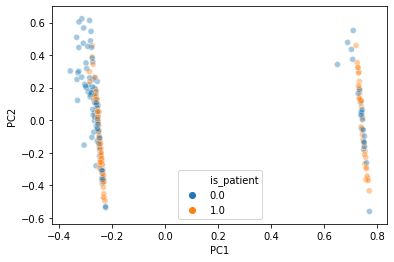

In [228]:
#PCA for Random Under Sampled Dataset
pca_random_under = PCA(n_components=2)
X_pca_random_under = pca_random_under.fit_transform(X_train_rus)
print(pca_random_under.explained_variance_ratio_.cumsum())
y_temp_rus = y_train_rus
y_temp_rus["PC1"] = X_pca_random_under[:,0]
y_temp_rus["PC2"] = X_pca_random_under[:,1]
sns.scatterplot(data=y_temp_rus, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_rus["is_patient"].value_counts())

In [229]:
print(y_train_rus.head())
y_train_rus = y_train_rus.drop(["PC1", "PC2"], axis=1)
print(y_train_rus.head())

     is_patient       PC1       PC2
199         1.0  0.732684  0.298147
69          0.0  0.744576 -0.057108
233         1.0  0.756407 -0.190036
39          0.0 -0.333367  0.250382
138         1.0 -0.256523  0.093402
     is_patient
199         1.0
69          0.0
233         1.0
39          0.0
138         1.0


<a id="fourth"></a>

In [230]:
#1 Naive Bayes On Random Under Sampled Training dataset

print("\n----------------------------------------------------------------------\n")

print("Naive Bayes on Random Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Naive Bayes on Random Under Sampled Training datset
print("\nCross Validation of Naive Bayes on Random Undersample Training dataset:")
crossValidation(GaussianNB(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Random Under sampled Training dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Undersample Training dataset:
[0.66019417 0.6372549  0.59803922 0.61764706] 

0.6282838378069675

----------------------------------------------------------------------



In [231]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On Random UnderSampled Training dataset
print("SVM Classifier on Random Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on SVM Classifier on Random Under Training sampled datset
print("\nCross Validation of SVM Classifier on Random Undersample Training dataset:")
crossValidation(LinearSVC(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of SVM Classifier on Random Undersample Training dataset:
[0.72815534 0.65686275 0.60784314 0.69607843] 

0.6722349133828289

----------------------------------------------------------------------



In [232]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On Random Undersampled Training dataset
print("Logistic Regression Classifier on Random Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Logistic Regression Classifier on Random Under sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Radom Under sample Training dataset:")
crossValidation(LogisticRegression(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[75 50]
 [ 7 43]]

Accuracy : 0.6742857142857143
Sensitivity : 0.6
Precision: 0.9146341463414634
Specificity : 0.86
F-Score : 0.7246376811594203

               precision    recall  f1-score   support

         0.0       0.91      0.60      0.72       125
         1.0       0.46      0.86      0.60        50

    accuracy                           0.67       175
   macro avg       0.69      0.73      0.66       175
weighted avg       0.79      0.67      0.69       175
 


Cross Validation of Logistic Regression Classifier on Radom Under sample Training dataset:
[0.68932039 0.64705882 0.60784314 0.67647059] 

0.6551732343422807

----------------------------------------------------------------------



In [233]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On Random Under Sample Training dataset
print("KNN Classifier on Random Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_rus, X_test, y_train_rus, y_test)


#Cross Validation on KNN Classifier on Random Under sampled Training datset
print("\nCross Validation of KNN Classifier on Random Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[91 34]
 [28 22]]

Accuracy : 0.6457142857142857
Sensitivity : 0.728
Precision: 0.7647058823529411
Specificity : 0.44
F-Score : 0.7459016393442623

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.75       125
         1.0       0.39      0.44      0.42        50

    accuracy                           0.65       175
   macro avg       0.58      0.58      0.58       175
weighted avg       0.66      0.65      0.65       175
 


Cross Validation of KNN Classifier on Random Undersample Training dataset:
[0.60194175 0.56862745 0.60784314 0.64705882] 

0.6063677898343803

----------------------------------------------------------------------



In [234]:
print("\n----------------------------------------------------------------------\n")

#5 Random Forest Classifier On Random Under sample Training dataset
print("Random Forest Classifier on Random Undersample training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Random Forest Classifier on Random under sampled Training datset
print("\nCross Validation of Random Forest Classifier on Random Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Random Undersample training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of Random Forest Classifier on Random Undersample Training dataset:
[0.75728155 0.69607843 0.62745098 0.62745098] 

0.6770654863887302

----------------------------------------------------------------------



In [235]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Radnom UnderSampled Training Dataset

print("Voting Classifier on Random Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), 
        ('svm',LinearSVC()), ('knn', KNeighborsClassifier(n_neighbors = 2))]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Voting Classifier on Random UnderSampled Training datset
print("\nCross Validation of Voting Classifier on Random under sampled Training dataset:")
crossValidation(vclf, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Random Under sampled Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Voting Classifier on Random under sampled Training dataset:
[0.70873786 0.62745098 0.57843137 0.66666667] 

0.6453217209213783

----------------------------------------------------------------------



In [236]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Random Undersampled Dataset

dt_rus = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_rus = AdaBoostClassifier(base_estimator=dt_rus, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on Random Undersampled Dataset:")
clfFitPredict(adb_clf_rus, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on AdaBoost Classifier on Random Undersampled Dataset
print("\nCross Validation of AdaBoost Classifier on Random undersampled dataset:")
crossValidation(adb_clf_rus, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on Random Undersampled Dataset:

Confusion Matrix: 
[[63 62]
 [ 7 43]]

Accuracy : 0.6057142857142858
Sensitivity : 0.504
Precision: 0.9
Specificity : 0.86
F-Score : 0.6461538461538462

               precision    recall  f1-score   support

         0.0       0.90      0.50      0.65       125
         1.0       0.41      0.86      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.68      0.60       175
weighted avg       0.76      0.61      0.62       175
 


Cross Validation of AdaBoost Classifier on Random undersampled dataset:
[0.70873786 0.67647059 0.68627451 0.64705882] 

0.6796354464115743

----------------------------------------------------------------------



In [237]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_rus = SVC(probability=True, kernel='linear')
adb_clf_svc_rus = AdaBoostClassifier(base_estimator=svc_adb_rus, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on Random undersampled Dataset:")
clfFitPredict(adb_clf_svc_rus, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on AdaBoostClassifier on Random Undersampled datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Random undersampled dataset:")
crossValidation(adb_clf_svc_rus, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on Random undersampled Dataset:

Confusion Matrix: 
[[83 42]
 [17 33]]

Accuracy : 0.6628571428571428
Sensitivity : 0.664
Precision: 0.83
Specificity : 0.66
F-Score : 0.7377777777777779

               precision    recall  f1-score   support

         0.0       0.83      0.66      0.74       125
         1.0       0.44      0.66      0.53        50

    accuracy                           0.66       175
   macro avg       0.64      0.66      0.63       175
weighted avg       0.72      0.66      0.68       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Random undersampled dataset:
[0.63106796 0.53921569 0.64705882 0.64705882] 

0.6161003236245954

----------------------------------------------------------------------



In [238]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Random undersampled Dataset

gbc_rus = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the Random undersampled dataset:")
clfFitPredict(gbc_rus, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on GradientBoostingClassifier on Random undersampled datset
print("\nCross Validation of GradientBoostingClassifier on Random undersampled dataset:")
crossValidation(gbc_rus, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the Random undersampled dataset:

Confusion Matrix: 
[[68 57]
 [11 39]]

Accuracy : 0.6114285714285714
Sensitivity : 0.544
Precision: 0.8607594936708861
Specificity : 0.78
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.86      0.54      0.67       125
         1.0       0.41      0.78      0.53        50

    accuracy                           0.61       175
   macro avg       0.63      0.66      0.60       175
weighted avg       0.73      0.61      0.63       175
 


Cross Validation of GradientBoostingClassifier on Random undersampled dataset:
[0.73786408 0.60784314 0.65686275 0.71568627] 

0.679564058633162

----------------------------------------------------------------------



In [239]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Random undersampled Dataset

xgb_clf_rus = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the Random undersampled dataset:")
clfFitPredict(xgb_clf_rus, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on XGBClassifier on Random undersampled dataset
print("\nCross Validation of XGBClassifier on Random undersampled dataset:")
crossValidation(xgb_clf_rus, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the Random undersampled dataset:

Confusion Matrix: 
[[77 48]
 [19 31]]

Accuracy : 0.6171428571428571
Sensitivity : 0.616
Precision: 0.8020833333333334
Specificity : 0.62
F-Score : 0.6968325791855204

               precision    recall  f1-score   support

         0.0       0.80      0.62      0.70       125
         1.0       0.39      0.62      0.48        50

    accuracy                           0.62       175
   macro avg       0.60      0.62      0.59       175
weighted avg       0.69      0.62      0.64       175
 


Cross Validation of XGBClassifier on Random undersampled dataset:
[0.59223301 0.58823529 0.58823529 0.59803922] 

0.5916857034075766

----------------------------------------------------------------------



In [240]:
#Bagging Classifier On the RandomUnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on RandomUnderSampled dataset :")
clfFitPredict(clf_bagging, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Bagging Classifier on RandomUnderSampled datset
print("\nCross Validation of Bagging Classifier on RandomUnderSampled dataset :")
crossValidation(clf_bagging, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On RandomUnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_rus, X_test, y_train_rus, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On RandomUnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_rus, y_rus, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on RandomUnderSampled dataset :

Confusion Matrix: 
[[81 44]
 [21 29]]

Accuracy : 0.6285714285714286
Sensitivity : 0.648
Precision: 0.7941176470588235
Specificity : 0.58
F-Score : 0.7136563876651983

               precision    recall  f1-score   support

         0.0       0.79      0.65      0.71       125
         1.0       0.40      0.58      0.47        50

    accuracy                           0.63       175
   macro avg       0.60      0.61      0.59       175
weighted avg       0.68      0.63      0.64       175
 


Cross Validation of Bagging Classifier on RandomUnderSampled dataset :
[0.74757282 0.65686275 0.71568627 0.64705882] 

0.6917951646678089

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On RandomUnderSampled Dataset

Confusion Matrix: 
[[81 44]
 [21 29]]

Accuracy : 0.6285714285714286
Sensitivity : 0.648
Precision: 0.7941176470588235
Specificity : 0.58
F-Score : 0.7

In [241]:
#Perceptron On The RandomUnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on RandomUnderSampled dataset :")
clfFitPredict(clf_percept, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Perceptron on RandomUnderSampled datset
print("\nCross Validation of Perceptron on RandomUnderSampled dataset :")
crossValidation(clf_percept, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on RandomUnderSampled dataset :

Confusion Matrix: 
[[39 86]
 [ 1 49]]

Accuracy : 0.5028571428571429
Sensitivity : 0.312
Precision: 0.975
Specificity : 0.98
F-Score : 0.4727272727272727

               precision    recall  f1-score   support

         0.0       0.97      0.31      0.47       125
         1.0       0.36      0.98      0.53        50

    accuracy                           0.50       175
   macro avg       0.67      0.65      0.50       175
weighted avg       0.80      0.50      0.49       175
 


Cross Validation of Perceptron on RandomUnderSampled dataset :
[0.65048544 0.62745098 0.62745098 0.61764706] 

0.6307586141252618

----------------------------------------------------------------------



<a id="pca4"></a>

In [242]:
#Classification With Random UnderSampled PCA Training dataset:

pca_rus_1 = PCA()
X_pca_rus_1 = pca_rus_1.fit_transform(X_train_rus)
print(pca_rus_1.explained_variance_ratio_.cumsum())

pca_rus1 = PCA(n_components=5)
X_pca_train_rus1 = pd.DataFrame(pca_rus1.fit_transform(X_train_rus))
X_pca_test_rus1 = pd.DataFrame(pca_rus1.transform(X_test))

X_pca_rus1 = pd.concat([X_pca_train_rus1, X_pca_test_rus1], axis=0)


[0.5486141  0.73464389 0.84740938 0.92879486 0.96903557 0.98625515
 0.99485509 0.99898767 0.99968489 1.        ]


In [243]:

print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Random UnderSampled PCA Training dataset
print("Naive Bayes on Random UnderSampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Naive Bayes on Random UnderSampled PCA Training dataset
print("\nCross Validation of Naive Bayes on Random UnderSampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Random UnderSampled PCA Training dataset
print("SVM Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on SVM Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of SVM Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Random UnderSampled PCA Training dataset
print("Logistic Regression Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Logistic Regression Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of Logistic Regression Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(LogisticRegression(), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On Random UnderSampled PCA Training dataset
print("KNN Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on KNN Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of KNN Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Random UnderSampled PCA Training dataset
print("Random Forest Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Random Forest Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of Random Forest Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Random UnderSampled PCA Training dataset
print("Voting Classifier on Random UnderSampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Voting Classifier on Random UnderSampled PCA Training dataset
print("\nCross Validation of Voting Classifier on Random UnderSampled PCA Training dataset:")
crossValidation(vclf, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Random Undersampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on Random Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_rus, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on AdaBoost Classifier on Random Undersampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on Random undersampled PCA Training dataset:")
crossValidation(adb_clf_rus, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on Random undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_rus, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on AdaBoostClassifier on Random Undersampled PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Random undersampled PCA Training dataset:")
crossValidation(adb_clf_svc_rus, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Random undersampled PCA Training Dataset

print("\nGradientBoostingClassifier on the Random undersampled PCA training dataset:")
clfFitPredict(gbc_rus, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on GradientBoostingClassifier on Random undersampled PCA Training dataset
print("\nCross Validation of GradientBoostingClassifier on Random undersampled PCA Training dataset:")
crossValidation(gbc_rus, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Random Undersampled Training PCA Training Dataset

print("\nXGBClassifier on the Random undersampled PCA Training dataset:")
clfFitPredict(xgb_clf_rus, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on XGBClassifier on Random undersampled PCA Training dataset
print("\nCross Validation of XGBClassifier on Random undersampled PCA Training dataset:")
crossValidation(xgb_clf_rus, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

#11 Bagging Classifier On the RandomUnderSampled PCA Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on RandomUnderSampled PCA dataset :")
clfFitPredict(clf_bagging, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Bagging Classifier on RandomUnderSampled PCA datset
print("\nCross Validation of Bagging Classifier on RandomUnderSampled PCA dataset :")
crossValidation(clf_bagging, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On RandomUnderSampled PCA Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On RandomUnderSampled PCA Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca_rus1, y_rus, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#12 Perceptron On The RandomUnderSampled PCA Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on RandomUnderSampled PCA dataset :")
clfFitPredict(clf_percept, X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test)

#Cross Validation on Perceptron on RandomUnderSampled PCA datset
print("\nCross Validation of Perceptron on RandomUnderSampled PCA dataset :")
crossValidation(clf_percept, X_pca_rus1, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Random UnderSampled PCA Training dataset:

Confusion Matrix: 
[[54 71]
 [12 38]]

Accuracy : 0.5257142857142857
Sensitivity : 0.432
Precision: 0.8181818181818182
Specificity : 0.76
F-Score : 0.5654450261780104

               precision    recall  f1-score   support

         0.0       0.82      0.43      0.57       125
         1.0       0.35      0.76      0.48        50

    accuracy                           0.53       175
   macro avg       0.58      0.60      0.52       175
weighted avg       0.68      0.53      0.54       175
 


Cross Validation of Naive Bayes on Random UnderSampled PCA Training dataset:
[0.65048544 0.66666667 0.55882353 0.55882353] 

0.60869979059585

----------------------------------------------------------------------

SVM Classifier on Random UnderSampled PCA Training dataset:

Confusion Matrix: 
[[62 63]
 [ 7 43]]

Accuracy : 0.6
Sensitivity : 0.496
Precision: 0.8985507

[0.63106796 0.66666667 0.60784314 0.6372549 ] 

0.6357081667618504

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On RandomUnderSampled PCA Dataset

Confusion Matrix: 
[[81 44]
 [14 36]]

Accuracy : 0.6685714285714286
Sensitivity : 0.648
Precision: 0.8526315789473684
Specificity : 0.72
F-Score : 0.7363636363636363

               precision    recall  f1-score   support

         0.0       0.85      0.65      0.74       125
         1.0       0.45      0.72      0.55        50

    accuracy                           0.67       175
   macro avg       0.65      0.68      0.65       175
weighted avg       0.74      0.67      0.68       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On RandomUnderSampled PCA Dataset
[0.63106796 0.66666667 0.60784314 0.6372549 ] 

0.6357081667618504

----------------------------------------------------------------------

Bagging Classifier wi

<a id="hyper4"></a>

In [244]:
#Hyperparameter Tuning for SVC on RandomUnderSampled Dataset

random_svc_rus = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10, n_jobs=-1,random_state = 0
                           )
#X_train_rus, X_test, y_train_rus, y_test
random_svc_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_svc_rus, "RSCV_SVC_rus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


['RSCV_SVC_rus.pkl']

In [245]:
print("\nRandomizedSearchCV for SVC on RandomUnderSampled Dataset :")
RSCV_SVC_rus_loaded = joblib.load("RSCV_SVC_rus.pkl")
print("\nBest Params -", RSCV_SVC_rus_loaded.best_params_)
print("\nBest Score -", RSCV_SVC_rus_loaded.best_score_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_SVC_rus_loaded.predict(X_test)))


RandomizedSearchCV for SVC on RandomUnderSampled Dataset :

Best Params - {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score - 0.7217391304347827

Accuracy Score - 0.6057142857142858


In [246]:
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
random_svc_pca_rus = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_svc_pca_rus, "RSCV_SVC_pca_rus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


['RSCV_SVC_pca_rus.pkl']

In [247]:
print("\nRandomizedSearchCV for SVC on RandomUnderSampled PCA Dataset :")
RSCV_SVC_pca_rus_loaded = joblib.load("RSCV_SVC_pca_rus.pkl")
print("\nBest Params -", RSCV_SVC_pca_rus_loaded.best_params_)
print("\nBest Score -", RSCV_SVC_pca_rus_loaded.best_score_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_SVC_pca_rus_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV for SVC on RandomUnderSampled PCA Dataset :

Best Params - {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score - 0.6922101449275363

Accuracy Score - 0.5942857142857143


In [248]:
#Hyperparameter Tuning for Logistic Regression With RandomUnderSampled Dataset

random_logreg_rus = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )
#X_train_rus, X_test, y_train_rus, y_test
random_logreg_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_logreg_rus, "RSCV_LR_rus.pkl")

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    4.6s finished
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


['RSCV_LR_rus.pkl']

In [249]:
print("\nRandomizedSearchCV for LR on RandomUnderSampled Dataset :")
RSCV_LR_rus_loaded = joblib.load("RSCV_LR_rus.pkl")
print("\nBest Parameters :",RSCV_LR_rus_loaded.best_params_) 
print("\nBest Score :",RSCV_LR_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_rus_loaded.predict(X_test)))



RandomizedSearchCV for LR on RandomUnderSampled Dataset :

Best Parameters : {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1000}

Best Score : 0.7469202898550724

Accuracy Score : 0.6171428571428571


In [250]:
#Hyperparameter Tuning for Logistic Regression With RandomUnderSampled PCA Dataset
random_logreg_pca_rus = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
random_logreg_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_logreg_pca_rus, "RSCV_LR_pca_rus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


['RSCV_LR_pca_rus.pkl']

In [251]:
print("\nRandomizedSearchCV for LR on RandomUnderSampled PCA Dataset :")
RSCV_LR_pca_rus_loaded = joblib.load("RSCV_LR_pca_rus.pkl")
print("\nBest Parameters :", RSCV_LR_pca_rus_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_rus_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV for LR on RandomUnderSampled PCA Dataset :

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.7088768115942029

Accuracy Score : 0.6285714285714286


In [252]:
#Hyperparameter Tuning for RandomForest on RandomUnderSampled Dataset

random_rf_rus = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
#X_train_rus, X_test, y_train_rus, y_test
random_rf_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_rf_rus, "RSCV_RF_rus.pkl")

['RSCV_RF_rus.pkl']

In [253]:
print("\nRandomizedSearchCV for RF on RUS Dataset :")
RSCV_RF_rus_loaded = joblib.load("RSCV_RF_rus.pkl")
print("\nBest Parameter :", RSCV_RF_rus_loaded.best_params_)
print("\nBest Score :", RSCV_RF_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_rus_loaded.predict(X_test)))


RandomizedSearchCV for RF on RUS Dataset :

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.7047101449275363

Accuracy Score : 0.6171428571428571


In [254]:
#Hyperparameter Tuning for RandomForest on RandomUnderSampled PCA Dataset
random_rf_pca_rus = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
random_rf_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_rf_pca_rus, "RSCV_RF_pca_rus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.8s finished


['RSCV_RF_pca_rus.pkl']

In [255]:
print("\nRandomizedSearchCV for RF on RUS PCA Dataset :")
RSCV_RF_pca_rus_loaded = joblib.load("RSCV_RF_pca_rus.pkl")
print("\nBest Parameter :", RSCV_RF_pca_rus_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_rus_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV for RF on RUS PCA Dataset :

Best Parameter : {'n_estimators': 32, 'min_samples_split': 1.0, 'min_samples_leaf': 0.4, 'max_features': 'sqrt', 'max_depth': 14.0, 'bootstrap': False}

Best Score : 0.6672101449275363

Accuracy Score : 0.6114285714285714


In [256]:
#Hyperparameter Tuning for GradientBoostingClassifier on RUS Dataset

clf_gbc_rus = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
#X_train_rus, X_test, y_train_rus, y_test
clf_gbc_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(clf_gbc_rus,'RSCV_GBC_rus.pkl')

['RSCV_GBC_rus.pkl']

In [257]:
print("\nRandomizedSearchCV on GBC with RUS Dataset")
RSCV_GBC_rus_loaded = joblib.load("RSCV_GBC_rus.pkl")
print("\nBest Score :", RSCV_GBC_rus_loaded.best_score_)
print("\nBest Parameters :",RSCV_GBC_rus_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_rus_loaded.predict(X_test)))



RandomizedSearchCV on GBC with RUS Dataset

Best Score : 0.7253623188405797

Best Parameters : {'n_estimators': 32, 'min_samples_split': 0.5, 'min_samples_leaf': 0.2, 'max_depth': 27.0, 'learning_rate': 0.1}

Accuracy Score : 0.6342857142857142


In [258]:
#Hyperparameter Tuning for GradientBoostingClassifier on RUS PCA Dataset

clf_gbc_rus_pca = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
clf_gbc_rus_pca.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(clf_gbc_rus_pca,'RSCV_GBC_rus_pca.pkl')

['RSCV_GBC_rus_pca.pkl']

In [259]:
print("\nRandomizedSearchCV on GBC with RUS PCA Dataset")
RSCV_GBC_rus_pca_loaded = joblib.load("RSCV_GBC_rus_pca.pkl")
print("\nBest Score :", RSCV_GBC_rus_pca_loaded.best_score_)
print("\nBest Parameters :",RSCV_GBC_rus_pca_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_rus_pca_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV on GBC with RUS PCA Dataset

Best Score : 0.6873188405797102

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1, 'max_depth': 22.0, 'learning_rate': 0.005}

Accuracy Score : 0.6057142857142858


In [260]:
#Hyperparameter for AdaBoost Classifier 
                
#dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(random_state=0) #base_estimator=dTC, 

random_adaboost_rus = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_rus, X_test, y_train_rus, y_test
random_adaboost_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_adaboost_rus, "RSCV_ADC_rus.pkl")

['RSCV_ADC_rus.pkl']

In [261]:
print("\nRandomizedSearchCV for ADC for RUS Dataset :")
RSCV_ADC_rus_loaded = joblib.load("RSCV_ADC_rus.pkl")
print("\nBest Score -", RSCV_ADC_rus_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_rus_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_rus_loaded.predict(X_test)))


RandomizedSearchCV for ADC for RUS Dataset :

Best Score - 0.6960144927536231

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5942857142857143


In [262]:
#Hyperparameter Tuning For AdaBoostClassifier on PCA Original Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca_rus = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test
random_adaboost_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_adaboost_pca_rus, "RSCV_ADC_pca_rus.pkl")

['RSCV_ADC_pca_rus.pkl']

In [263]:
print("\nRandomizedSearchCV for ADC for RUS PCA Dataset :")
RSCV_ADC_pca_rus_loaded = joblib.load("RSCV_ADC_pca_rus.pkl")
print("\nBest Score -", RSCV_ADC_pca_rus_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_pca_rus_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_pca_rus_loaded.predict(X_pca_test_rus1)))



RandomizedSearchCV for ADC for RUS PCA Dataset :

Best Score - 0.5702898550724639

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5657142857142857


In [264]:
#AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_rus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_rus.fit(X_train_rus, y_train_rus.values.ravel())
joblib.dump(random_adaboost_svc_rus, "RSCV_ADC_SVC_rus.pkl")
#X_train_rus, X_test, y_train_rus, y_test
#X_pca_train_rus1, X_pca_test_rus1, y_train_rus, y_test

['RSCV_ADC_SVC_rus.pkl']

In [265]:
print("\nRandomizedSearchCV for ADC with SVC on RUS")
RSCV_ADC_SVC_rus_loaded = joblib.load("RSCV_ADC_SVC_rus.pkl")
print("\nBest Score :",RSCV_ADC_SVC_rus_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_SVC_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_rus_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC on RUS

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5327898550724639

Accuracy Score : 0.6342857142857142


In [266]:
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_rus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)

random_adaboost_svc_pca_rus.fit(X_pca_train_rus1, y_train_rus.values.ravel())
joblib.dump(random_adaboost_svc_pca_rus, "RSCV_ADC_SVC_pca_rus.pkl")

['RSCV_ADC_SVC_pca_rus.pkl']

In [267]:
print("\nRandomizedSearchCV for ADC with SVC on RUS Dataset")
RSCV_ADC_SVC_pca_rus_loaded = joblib.load("RSCV_ADC_SVC_pca_rus.pkl")
print("\nBest Score :",RSCV_ADC_SVC_pca_rus_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_SVC_pca_rus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_SVC_pca_rus_loaded.predict(X_pca_test_rus1)))


RandomizedSearchCV for ADC with SVC on RUS Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5369565217391304

Accuracy Score : 0.6342857142857142


<a id="ros"></a>

In [268]:
print("\n----------------------------------------------------------------------\n")

#RandomOverSampler On the Training Dataset
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution: \n")
print(y_train['is_patient'].value_counts())
print("\nTraining Dataset Distribution After Random Over Sampling: \n")
print(pd.Series(y_train_ros).value_counts())
X_train_ros = pd.DataFrame(X_train_ros)
y_train_ros = pd.DataFrame(y_train_ros)
y_train_ros = y_train_ros.rename(columns={0:"is_patient"})
X_temp_ros = pd.concat([X_train_ros, y_train_ros], axis=1)
#shuffling the training dataset
X_temp_ros = X_temp_ros.sample(frac=1, random_state=1)
X_train_ros  = X_temp_ros.drop(["is_patient"], axis=1)
y_train_ros  = X_temp_ros[["is_patient"]]
X_ros = pd.concat([X_train_ros, X_test], axis=0)
y_ros = pd.concat([y_train_ros, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution: 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After Random Over Sampling: 

0.0    291
1.0    291
dtype: int64

----------------------------------------------------------------------



<a id="graph5"></a>

[0.56256164 0.73330707]
0.0    291
1.0    291
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


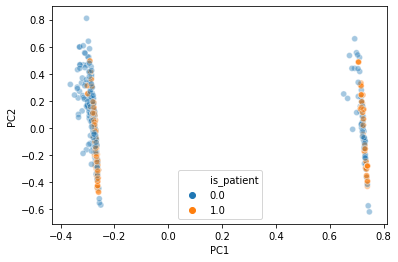

In [269]:
#PCA for Random Over Sampled Dataset
pca_random_over = PCA(n_components=2)
X_pca_random_over = pca_random_over.fit_transform(X_train_ros)
print(pca_random_over.explained_variance_ratio_.cumsum())
y_temp_ros = y_train_ros
y_temp_ros["PC1"] = X_pca_random_over[:,0]
y_temp_ros["PC2"] = X_pca_random_over[:,1]
sns.scatterplot(data=y_temp_ros, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_ros["is_patient"].value_counts())

In [270]:
print(y_train_ros.head())
y_train_ros = y_train_ros.drop(["PC1", "PC2"], axis=1)
print(y_train_ros.head())

     is_patient       PC1       PC2
457         1.0 -0.274678  0.024499
225         1.0  0.718415  0.144603
162         0.0 -0.296888  0.640445
195         0.0 -0.287466  0.067029
267         0.0 -0.278075  0.085863
     is_patient
457         1.0
225         1.0
162         0.0
195         0.0
267         0.0


<a id="fifth"></a>

In [271]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Random Over sampled Training dataset
print("Naive Bayes on Random Over sampled dataset:")
clfFitPredict(GaussianNB(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Naive Bayes on Random Over sampled datset
print("\nCross Validation of Naive Bayes on Random Over sampled dataset:")
crossValidation(GaussianNB(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Random Over sampled dataset:

Confusion Matrix: 
[[47 78]
 [ 3 47]]

Accuracy : 0.5371428571428571
Sensitivity : 0.376
Precision: 0.94
Specificity : 0.94
F-Score : 0.5371428571428571

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.54       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Over sampled dataset:
[0.66842105 0.64550265 0.65608466 0.64021164] 

0.6525549986076302

----------------------------------------------------------------------



In [272]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On Random OverSampled Training dataset
print("SVM Classifier on Random Oversample Training dataset:")
clfFitPredict(LinearSVC(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on SVM Classifier on Random Oversampled datset
print("\nCross Validation of SVM Classifier on Random Oversampled Training dataset:")
crossValidation(LinearSVC(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[66 59]
 [10 40]]

Accuracy : 0.6057142857142858
Sensitivity : 0.528
Precision: 0.868421052631579
Specificity : 0.8
F-Score : 0.6567164179104478

               precision    recall  f1-score   support

         0.0       0.87      0.53      0.66       125
         1.0       0.40      0.80      0.54        50

    accuracy                           0.61       175
   macro avg       0.64      0.66      0.60       175
weighted avg       0.74      0.61      0.62       175
 


Cross Validation of SVM Classifier on Random Oversampled Training dataset:
[0.7        0.6984127  0.67195767 0.71428571] 

0.6961640211640212

----------------------------------------------------------------------



In [273]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On Random Over Sampled Training  dataset
print("Logistic Regression Classifier on Random Oversample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Logistic Regression Classifier on Random Over Sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Random Oversampled Training dataset:")
crossValidation(LogisticRegression(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Logistic Regression Classifier on Random Oversampled Training dataset:
[0.67368421 0.68783069 0.61904762 0.70899471] 

0.6723893065998329

----------------------------------------------------------------------



In [274]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On Randm Oversampled Training dataset
print("KNN Classifier on Random Oversample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on KNN Classifier on Random Over sampled Training datset
print("\nCross Validation of KNN Classifier on Random Oversample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[97 28]
 [33 17]]

Accuracy : 0.6514285714285715
Sensitivity : 0.776
Precision: 0.7461538461538462
Specificity : 0.34
F-Score : 0.7607843137254902

               precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       125
         1.0       0.38      0.34      0.36        50

    accuracy                           0.65       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.64      0.65      0.65       175
 


Cross Validation of KNN Classifier on Random Oversample Training dataset:
[0.72631579 0.75661376 0.75661376 0.67724868] 

0.7291979949874687

----------------------------------------------------------------------



In [275]:
print("\n----------------------------------------------------------------------\n")

#5 Random Forest Classifier On Random Over Sampled Training dataset
print("Random Forest Classifier on Random Oversample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Random Forest Classifier on Radnom Over Sampled Training datset
print("\nCross Validation of Random Forest Classifier on Random Oversample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[74 51]
 [11 39]]

Accuracy : 0.6457142857142857
Sensitivity : 0.592
Precision: 0.8705882352941177
Specificity : 0.78
F-Score : 0.7047619047619046

               precision    recall  f1-score   support

         0.0       0.87      0.59      0.70       125
         1.0       0.43      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.65      0.69      0.63       175
weighted avg       0.75      0.65      0.66       175
 


Cross Validation of Random Forest Classifier on Random Oversample Training dataset:
[0.74736842 0.75132275 0.74074074 0.6984127 ] 

0.7344611528822056

----------------------------------------------------------------------



In [276]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Random OverSampled Training Dataset
print("Voting Classifier on Random Over sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Voting Classifier on Random OverSampled Training datset
print("\nCross Validation of Voting Classifier on Random Over sampled Training dataset:")
crossValidation(vclf, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Random Over sampled Training dataset:

Confusion Matrix: 
[[70 55]
 [11 39]]

Accuracy : 0.6228571428571429
Sensitivity : 0.56
Precision: 0.8641975308641975
Specificity : 0.78
F-Score : 0.6796116504854369

               precision    recall  f1-score   support

         0.0       0.86      0.56      0.68       125
         1.0       0.41      0.78      0.54        50

    accuracy                           0.62       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.74      0.62      0.64       175
 


Cross Validation of Voting Classifier on Random Over sampled Training dataset:
[0.70526316 0.71428571 0.67195767 0.71957672] 

0.7027708159287107

----------------------------------------------------------------------



In [277]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Random Oversampled Dataset

dt_ros = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_ros = AdaBoostClassifier(base_estimator=dt_ros, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on Random Oversampled Dataset:")
clfFitPredict(adb_clf_ros, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on AdaBoost Classifier on Random Oversampled Dataset
print("\nCross Validation of AdaBoost Classifier on Random Oversampled dataset:")
crossValidation(adb_clf_ros, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on Random Oversampled Dataset:

Confusion Matrix: 
[[69 56]
 [11 39]]

Accuracy : 0.6171428571428571
Sensitivity : 0.552
Precision: 0.8625
Specificity : 0.78
F-Score : 0.6731707317073171

               precision    recall  f1-score   support

         0.0       0.86      0.55      0.67       125
         1.0       0.41      0.78      0.54        50

    accuracy                           0.62       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.73      0.62      0.63       175
 


Cross Validation of AdaBoost Classifier on Random Oversampled dataset:
[0.66315789 0.68783069 0.67195767 0.68253968] 

0.6763714842662212

----------------------------------------------------------------------



In [278]:
#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_ros = SVC(probability=True, kernel='linear')
adb_clf_svc_ros = AdaBoostClassifier(base_estimator=svc_adb_ros, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on Random Oversampled Dataset:")
clfFitPredict(adb_clf_svc_ros, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on AdaBoostClassifier on Random Oversampled datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Random Oversampled dataset:")
crossValidation(adb_clf_svc_ros, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


AdaBoostClassifier with SVC as base estimator on Random Oversampled Dataset:

Confusion Matrix: 
[[67 58]
 [ 8 42]]

Accuracy : 0.6228571428571429
Sensitivity : 0.536
Precision: 0.8933333333333333
Specificity : 0.84
F-Score : 0.67

               precision    recall  f1-score   support

         0.0       0.89      0.54      0.67       125
         1.0       0.42      0.84      0.56        50

    accuracy                           0.62       175
   macro avg       0.66      0.69      0.61       175
weighted avg       0.76      0.62      0.64       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Random Oversampled dataset:
[0.63157895 0.65608466 0.6031746  0.65608466] 

0.6367307156780841

----------------------------------------------------------------------



In [279]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Random Oversampled Dataset

gbc_ros = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the Random Oversampled dataset:")
clfFitPredict(gbc_ros, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on GradientBoostingClassifier on Random Oversampled datset
print("\nCross Validation of GradientBoostingClassifier on Random Oversampled dataset:")
crossValidation(gbc_ros, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the Random Oversampled dataset:

Confusion Matrix: 
[[80 45]
 [15 35]]

Accuracy : 0.6571428571428571
Sensitivity : 0.64
Precision: 0.8421052631578947
Specificity : 0.7
F-Score : 0.7272727272727272

               precision    recall  f1-score   support

         0.0       0.84      0.64      0.73       125
         1.0       0.44      0.70      0.54        50

    accuracy                           0.66       175
   macro avg       0.64      0.67      0.63       175
weighted avg       0.73      0.66      0.67       175
 


Cross Validation of GradientBoostingClassifier on Random Oversampled dataset:
[0.7        0.74603175 0.7037037  0.71428571] 

0.716005291005291

----------------------------------------------------------------------



In [280]:
#10 XGBClassifier on the Random Oversampled Dataset

xgb_clf_ros = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the Random Oversampled dataset:")
clfFitPredict(xgb_clf_ros, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on XGBClassifier on Random Oversampled dataset
print("\nCross Validation of XGBClassifier on Random Oversampled dataset:")
crossValidation(xgb_clf_ros, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


XGBClassifier on the Random Oversampled dataset:

Confusion Matrix: 
[[72 53]
 [12 38]]

Accuracy : 0.6285714285714286
Sensitivity : 0.576
Precision: 0.8571428571428571
Specificity : 0.76
F-Score : 0.6889952153110047

               precision    recall  f1-score   support

         0.0       0.86      0.58      0.69       125
         1.0       0.42      0.76      0.54        50

    accuracy                           0.63       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.73      0.63      0.65       175
 


Cross Validation of XGBClassifier on Random Oversampled dataset:
[0.54736842 0.55026455 0.55026455 0.55026455] 

0.5495405179615706

----------------------------------------------------------------------



In [281]:
#Bagging Classifier On the RandomUnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on RandomUnderSampled dataset :")
clfFitPredict(clf_bagging, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Bagging Classifier on RandomUnderSampled datset
print("\nCross Validation of Bagging Classifier on RandomUnderSampled dataset :")
crossValidation(clf_bagging, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On RandomUnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_ros, X_test, y_train_ros, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On RandomUnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_ros, y_ros, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1


Bagging Classifier on RandomUnderSampled dataset :

Confusion Matrix: 
[[108  17]
 [ 32  18]]

Accuracy : 0.72
Sensitivity : 0.864
Precision: 0.7714285714285715
Specificity : 0.36
F-Score : 0.8150943396226416

               precision    recall  f1-score   support

         0.0       0.77      0.86      0.82       125
         1.0       0.51      0.36      0.42        50

    accuracy                           0.72       175
   macro avg       0.64      0.61      0.62       175
weighted avg       0.70      0.72      0.70       175
 


Cross Validation of Bagging Classifier on RandomUnderSampled dataset :
[0.8        0.84656085 0.83068783 0.70899471] 

0.7965608465608465

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On RandomUnderSampled Dataset

Confusion Matrix: 
[[108  17]
 [ 32  18]]

Accuracy : 0.72
Sensitivity : 0.864
Precision: 0.7714285714285715
Specificity : 0.36
F-Score : 0.8150943396226416

   

In [282]:
#Perceptron On The RandomUnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on RandomUnderSampled dataset :")
clfFitPredict(clf_percept, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Perceptron on RandomUnderSampled datset
print("\nCross Validation of Perceptron on RandomUnderSampled dataset :")
crossValidation(clf_percept, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on RandomUnderSampled dataset :

Confusion Matrix: 
[[30 95]
 [ 1 49]]

Accuracy : 0.4514285714285714
Sensitivity : 0.24
Precision: 0.967741935483871
Specificity : 0.98
F-Score : 0.38461538461538464

               precision    recall  f1-score   support

         0.0       0.97      0.24      0.38       125
         1.0       0.34      0.98      0.51        50

    accuracy                           0.45       175
   macro avg       0.65      0.61      0.44       175
weighted avg       0.79      0.45      0.42       175
 


Cross Validation of Perceptron on RandomUnderSampled dataset :
[0.65789474 0.58730159 0.65608466 0.63492063] 

0.6340504037872459

----------------------------------------------------------------------



<a id="pca5"></a>

In [283]:
#Classification With Random OverSampled PCA Training dataset:

pca_ros_1 = PCA()
X_pca_ros_1 = pca_ros_1.fit_transform(X_train_ros)
print(pca_ros_1.explained_variance_ratio_.cumsum())

pca_ros1 = PCA(n_components=5)
X_pca_train_ros1 = pd.DataFrame(pca_ros1.fit_transform(X_train_ros))
X_pca_test_ros1 = pd.DataFrame(pca_ros1.transform(X_test))

X_pca_ros1 = pd.concat([X_pca_train_ros1, X_pca_test_ros1], axis=0)

[0.56256164 0.73330707 0.82833474 0.91223202 0.94980686 0.974728
 0.99522245 0.99801175 0.99936417 1.        ]


In [284]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Random OverSampled PCA Training dataset
print("Naive Bayes on Random OverSampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Naive Bayes on Random OverSampled PCA Training dataset
print("\nCross Validation of Naive Bayes on Random OverSampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Random OverSampled PCA Training dataset
print("SVM Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on SVM Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of SVM Classifier on Random OverSampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Random OverSampled PCA Training dataset
print("Logistic Regression Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Logistic Regression Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of Logistic Regression Classifier on Random OverSampled PCA Training dataset:")
crossValidation(LogisticRegression(), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On Random OverSampled PCA Training dataset
print("KNN Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on KNN Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of KNN Classifier on Random OverSampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Random OverSampled PCA Training dataset
print("Random Forest Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Random Forest Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of Random Forest Classifier on Random OverSampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Random OverSampled PCA Training dataset
print("Voting Classifier on Random OverSampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Voting Classifier on Random OverSampled PCA Training dataset
print("\nCross Validation of Voting Classifier on Random OverSampled PCA Training dataset:")
crossValidation(vclf, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Random Oversampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on Random Oversampled PCA Training Dataset:")
clfFitPredict(adb_clf_ros, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on AdaBoost Classifier on Random Oversampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on Random Oversampled PCA Training dataset:")
crossValidation(adb_clf_ros, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on Random Oversampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_ros, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on AdaBoostClassifier on Random Oversampled PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Random Oversampled PCA Training dataset:")
crossValidation(adb_clf_svc_ros, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Random Oversampled PCA Training Dataset

print("\nGradientBoostingClassifier on the Random Oversampled PCA Training dataset:")
clfFitPredict(gbc_ros, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on GradientBoostingClassifier on Random Oversampled PCA Training dataset
print("\nCross Validation of GradientBoostingClassifier on Random Oversampled PCA Training dataset:")
crossValidation(gbc_ros, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Random Oversampled PCA Training Dataset

print("\nXGBClassifier on the Random Oversampled PCA Training dataset:")
clfFitPredict(xgb_clf_ros, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on XGBClassifier on Random Oversampled PCA Training dataset
print("\nCross Validation of XGBClassifier on Random Oversampled PCA Training dataset:")
crossValidation(xgb_clf_ros, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

#Bagging Classifier On the RandomUnderSampled PCA Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on RandomUnderSampled dataset :")
clfFitPredict(clf_bagging, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Bagging Classifier on RandomUnderSampled PCA datset
print("\nCross Validation of Bagging Classifier on RandomUnderSampled PCA dataset :")
crossValidation(clf_bagging, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On RandomUnderSampled PCA Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On RandomUnderSampled PCA Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca_ros1, y_ros, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The RandomUnderSampled PCA Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on RandomUnderSampled PCA dataset :")
clfFitPredict(clf_percept, X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test)

#Cross Validation on Perceptron on RandomUnderSampled PCA datset
print("\nCross Validation of Perceptron on RandomUnderSampled PCA dataset :")
crossValidation(clf_percept, X_pca_ros1, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Random OverSampled PCA Training dataset:

Confusion Matrix: 
[[60 65]
 [14 36]]

Accuracy : 0.5485714285714286
Sensitivity : 0.48
Precision: 0.8108108108108109
Specificity : 0.72
F-Score : 0.6030150753768844

               precision    recall  f1-score   support

         0.0       0.81      0.48      0.60       125
         1.0       0.36      0.72      0.48        50

    accuracy                           0.55       175
   macro avg       0.58      0.60      0.54       175
weighted avg       0.68      0.55      0.57       175
 


Cross Validation of Naive Bayes on Random OverSampled PCA Training dataset:
[0.61052632 0.61904762 0.65079365 0.6031746 ] 

0.6208855472013367

----------------------------------------------------------------------

SVM Classifier on Random OverSampled PCA Training dataset:

Confusion Matrix: 
[[68 57]
 [ 9 41]]

Accuracy : 0.6228571428571429
Sensitivity : 0.544
Precisi

[0.83157895 0.82010582 0.82539683 0.73015873] 

0.8018100807574492

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On RandomUnderSampled PCA Dataset

Confusion Matrix: 
[[98 27]
 [28 22]]

Accuracy : 0.6857142857142857
Sensitivity : 0.784
Precision: 0.7777777777777778
Specificity : 0.44
F-Score : 0.7808764940239045

               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       125
         1.0       0.45      0.44      0.44        50

    accuracy                           0.69       175
   macro avg       0.61      0.61      0.61       175
weighted avg       0.68      0.69      0.68       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On RandomUnderSampled PCA Dataset
[0.83157895 0.82010582 0.82539683 0.73015873] 

0.8018100807574492

----------------------------------------------------------------------

Bagging Classifier wi

<a id="hyper5"></a>

In [285]:
#Hyperparameter Tuning for SVC
random_svc_ros = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_svc_ros, "RSCV_SVC_ros.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


['RSCV_SVC_ros.pkl']

In [286]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled Dataset")
RSCV_SVC_ros_loaded  = joblib.load("RSCV_SVC_ros.pkl")
print("\nBest Parameters :", RSCV_SVC_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_ros_loaded.predict(X_test)))


RandomizedSearchCV for SVC with RandomOverSampled Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score : 0.6854763296317942

Accuracy Score : 0.5885714285714285


In [287]:
random_svc_pca_ros = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_svc_pca_ros, "RSCV_SVC_pca_ros.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


['RSCV_SVC_pca_ros.pkl']

In [288]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_SVC_pca_ros_loaded = joblib.load("RSCV_SVC_pca_ros.pkl")
print("\nBest Parameters :", RSCV_SVC_pca_ros_loaded.best_params_) 
print("\nBest Score :",RSCV_SVC_pca_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_pca_ros_loaded.predict(X_pca_test_ros1)))


RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.005, 'C': 100}

Best Score : 0.6855639976621859

Accuracy Score : 0.6114285714285714


In [289]:
#Hyperparameter Tuning for Logistic Regression with ROS Dataset

random_logreg_ros = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_logreg_ros, "RSCV_LR_ros.pkl")

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    6.9s finished


['RSCV_LR_ros.pkl']

In [290]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_LR_ros_loaded  = joblib.load("RSCV_LR_ros.pkl")
print("\nBest Parameters :", RSCV_LR_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_ros_loaded.predict(X_test)))


RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 1500}

Best Score : 0.7440677966101694

Accuracy Score : 0.6114285714285714


In [291]:
#Hyperparameter Tuning for LR on ROS PCA Dataset
random_logreg_pca_ros = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_logreg_pca_ros, "RSCV_LR_pca_ros.pkl")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_LR_pca_ros.pkl']

In [292]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_LR_pca_ros_loaded  = joblib.load("RSCV_LR_pca_ros.pkl")
print("\nBest Parameters :", RSCV_LR_pca_ros_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_ros_loaded.predict(X_pca_test_ros1)))



RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.6872881355932203

Accuracy Score : 0.6457142857142857


In [293]:
#Hyperparameter Tuning for RandomForest 

random_rf_ros = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_rf_ros, "RSCV_RF_ros.pkl")

['RSCV_RF_ros.pkl']

In [294]:
print("\nRandomizedSearchCV for SVC with RandomOverSampled PCA Dataset")
RSCV_RF_ros_loaded  = joblib.load("RSCV_RF_ros.pkl")
print("\nBest Parameter :", RSCV_RF_ros_loaded.best_params_)
print("\nBest Score :", RSCV_RF_ros_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_ros_loaded.predict(X_test)))


RandomizedSearchCV for SVC with RandomOverSampled PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.7166569257744009

Accuracy Score : 0.6514285714285715


In [295]:
#Hyperparameter Tuning for RF on ROS PCA Dataset
random_rf_pca_ros = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_rf_pca_ros, "RSCV_RF_ros_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.8s finished


['RSCV_RF_ros_pca.pkl']

In [296]:
print("\nRandomizedSearchCV for RF with RandomOverSampled PCA Dataset")
RSCV_RF_ros_pca_loaded  = joblib.load("RSCV_RF_ros_pca.pkl")
print("\nBest Parameter :", RSCV_RF_ros_pca_loaded.best_params_)
print("\nBest Score :", RSCV_RF_ros_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_ros_pca_loaded.predict(X_pca_test_ros1)))


RandomizedSearchCV for RF with RandomOverSampled PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.6908240794856809

Accuracy Score : 0.64


In [297]:
#Hyperparameter Tuning for GradientBoostingClassifier on ROS Dataset
clf_gbc_ros = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(clf_gbc_ros,'RSCV_GBC_ros.pkl')

['RSCV_GBC_ros.pkl']

In [298]:
print("\nRandomizedSearchCV for GBC with RandomOverSampled PCA Dataset")
RSCV_GBC_ros_loaded  = joblib.load("RSCV_GBC_ros.pkl")
print("\nBest Score :",RSCV_GBC_ros_loaded.best_score_)
print("\nBest Parameters :",RSCV_GBC_ros_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_ros_loaded.predict(X_test)))


RandomizedSearchCV for GBC with RandomOverSampled PCA Dataset

Best Score : 0.819666861484512

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.6857142857142857


In [299]:
#Hyperparameter Tuning for GBC on ROS PCA Dataset
clf_gbc_pca_ros = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(clf_gbc_pca_ros,'RSCV_GBC_pca_ros.pkl')

['RSCV_GBC_pca_ros.pkl']

In [300]:
print("\nRandomizedSearchCV for GBC with RandomOverSampled PCA Dataset")
RSCV_GBC_pca_ros_loaded  = joblib.load("RSCV_GBC_pca_ros.pkl")
print("\nBest Score :", RSCV_GBC_pca_ros_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_ros_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_ros_loaded.predict(X_pca_test_ros1)))


RandomizedSearchCV for GBC with RandomOverSampled PCA Dataset

Best Score : 0.8266218585622441

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 0.6, 'min_samples_leaf': 0.2, 'max_depth': 30.0, 'learning_rate': 0.25}

Accuracy Score : 0.6342857142857142


In [301]:
#Hyperparameter for AdaBoost Classifier on ROS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_ros = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_adaboost_ros, "RSCV_ADC_ros.pkl")

['RSCV_ADC_ros.pkl']

In [302]:
print("\nRandomizedSearchCV for ADC with DT as base Estimator on RandomOverSampled Dataset")
RSCV_ADC_ros_loaded  = joblib.load("RSCV_ADC_ros.pkl")
print("\nBest Score -", RSCV_ADC_ros_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_ros_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_ADC_ros_loaded.predict(X_test)))


RandomizedSearchCV for ADC with DT as base Estimator on RandomOverSampled Dataset

Best Score - 0.5258912916423144

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

Accuracy Score - 0.7142857142857143


In [303]:
#Hyperparameter Tuning For AdaBoostClassifier on ROS PCA Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_pca_ros = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_adaboost_pca_ros, "RSCV_ADC_pca_ros.pkl")

['RSCV_ADC_pca_ros.pkl']

In [304]:
print("\nRandomizedSearchCV for ADC with Decision Tree as base Classifier on RandomOverSampled PCA Dataset")
RSCV_ADC_pca_ros_loaded  = joblib.load("RSCV_ADC_pca_ros.pkl")
print("\nBest Score -", RSCV_ADC_pca_ros_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_pca_ros_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_pca_ros_loaded.predict(X_pca_test_ros1)))


RandomizedSearchCV for ADC with Decision Tree as base Classifier on RandomOverSampled PCA Dataset

Best Score - 0.617270601987142

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5714285714285714


In [305]:
#AdaBoostClassifier with SVC as base estimator on ROS Dataset

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_ros = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
#X_train_ros, X_test, y_train_ros, y_test
#X_pca_train_ros1, X_pca_test_ros1, y_train_ros, y_test
random_adaboost_svc_ros.fit(X_train_ros, y_train_ros.values.ravel())
joblib.dump(random_adaboost_svc_ros, "RSCV_ADC_svc_ros.pkl")


['RSCV_ADC_svc_ros.pkl']

In [306]:
print("\nRandomizedSearchCV for ADC with SVC on RandomOverSampled Dataset")
RSCV_ADC_svc_ros_loaded  = joblib.load("RSCV_ADC_svc_ros.pkl")
print("\nBest Score :", RSCV_ADC_svc_ros_loaded.best_score_)
print("\nBest Parameter :", RSCV_ADC_svc_ros_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_ros_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC on RandomOverSampled Dataset

Best Score : 0.6258912916423144

Best Parameter : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Accuracy Score : 0.6285714285714286


In [307]:
#AdaBoostClassifier with SVC as base estimator on ROS PCA Dataset

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_ros = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_ros.fit(X_pca_train_ros1, y_train_ros.values.ravel())
joblib.dump(random_adaboost_svc_pca_ros, "RSCV_ADC_svc_pca_ros.pkl")


['RSCV_ADC_svc_pca_ros.pkl']

In [308]:
print("\nRandomizedSearchCV for ADC with SVC on RandomOverSampled PCA Dataset")
RSCV_ADC_svc_pca_ros_loaded  = joblib.load("RSCV_ADC_svc_pca_ros.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_ros_loaded.best_score_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_ros_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_pca_ros_loaded.predict(X_pca_test_ros1)))



RandomizedSearchCV for ADC with SVC on RandomOverSampled PCA Dataset

Best Score : 0.6224430157802454

Best Parameter : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Accuracy Score : 0.5942857142857143


<a id="tomek"></a>

In [309]:
print("\n----------------------------------------------------------------------\n")

#TomekLinks UnderSampling on Training Datasets
tl1 = TomekLinks()
X_train_tl1, y_train_tl1 = tl1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After TomekLinks UnderSampling\n")
print(pd.Series(y_train_tl1).value_counts())
X_train_tl1 = pd.DataFrame(X_train_tl1)
y_train_tl1 = pd.DataFrame(y_train_tl1)
y_train_tl1 = y_train_tl1.rename(columns={0:"is_patient"})

X_temp_tl1 = pd.concat([X_train_tl1, y_train_tl1], axis=1)
#shuffling the training dataset
X_temp_tl1 = X_temp_tl1.sample(frac=1, random_state=1)
X_train_tl1  = X_temp_tl1.drop(["is_patient"], axis=1)
y_train_tl1  = X_temp_tl1[["is_patient"]]

X_tl1 = pd.concat([X_train_tl1, X_test], axis=0)
y_tl1 = pd.concat([y_train_tl1, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After TomekLinks UnderSampling

0.0    256
1.0    117
dtype: int64

----------------------------------------------------------------------



<a id="graph6"></a>

[0.51565892 0.68697132]
0.0    256
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


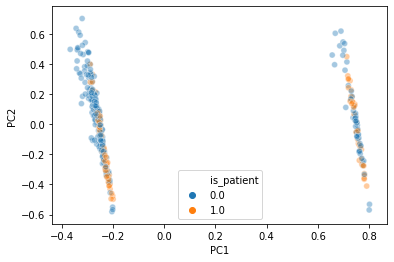

In [310]:
#PCA for Tomeklinks Under Sampled Dataset
pca_tl1 = PCA(n_components=2)
X_pca_tl1 = pca_tl1.fit_transform(X_train_tl1)
print(pca_tl1.explained_variance_ratio_.cumsum())
y_temp_tl1 = y_train_tl1
y_temp_tl1["PC1"] = X_pca_tl1[:,0]
y_temp_tl1["PC2"] = X_pca_tl1[:,1]
sns.scatterplot(data=y_temp_tl1, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_tl1["is_patient"].value_counts())

In [311]:
print(y_train_tl1.head())
y_train_tl1 = y_train_tl1.drop(["PC1", "PC2"], axis=1)
print(y_train_tl1.head())

     is_patient       PC1       PC2
67          0.0 -0.319569  0.185185
346         0.0  0.774251 -0.248358
341         1.0 -0.211980 -0.396700
293         1.0 -0.212516 -0.397253
90          1.0 -0.257593 -0.017164
     is_patient
67          0.0
346         0.0
341         1.0
293         1.0
90          1.0


<a id="sixth"></a>

In [312]:
print("\n----------------------------------------------------------------------\n")

#1.1 Naive Bayes On TomekLinks Under Sampled Training dataset
print("Naive Bayes on TomekLinks Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Naive Bayes on Random Under sampled Training datset
print("\nCross Validation of Naive Bayes on Random Under sampled Training dataset:")
crossValidation(GaussianNB(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on TomekLinks Under sampled Training dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Under sampled Training dataset:
[0.61313869 0.58394161 0.59854015 0.54744526] 

0.5857664233576642

----------------------------------------------------------------------



In [313]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On TomekLinks UnderSampled Training dataset
print("SVM Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on SVM Classifier on TomekLinks Under sampled datset
print("\nCross Validation of SVM Classifier on TomekLinks Undersample dataset:")
crossValidation(LinearSVC(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[119   6]
 [ 43   7]]

Accuracy : 0.72
Sensitivity : 0.952
Precision: 0.7345679012345679
Specificity : 0.14
F-Score : 0.8292682926829268

               precision    recall  f1-score   support

         0.0       0.73      0.95      0.83       125
         1.0       0.54      0.14      0.22        50

    accuracy                           0.72       175
   macro avg       0.64      0.55      0.53       175
weighted avg       0.68      0.72      0.66       175
 


Cross Validation of SVM Classifier on TomekLinks Undersample dataset:
[0.7080292  0.70072993 0.68613139 0.72262774] 

0.7043795620437956

----------------------------------------------------------------------



In [314]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On TomekLinks Undersampled Training dataset
print("Logistic Regression Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Logistic Regression Classifier on TomekLinks Under Sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on TomekLinks Under sample Training dataset:")
crossValidation(LogisticRegression(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of Logistic Regression Classifier on TomekLinks Under sample Training dataset:
[0.69343066 0.67153285 0.70072993 0.69343066] 

0.6897810218978103

----------------------------------------------------------------------



In [315]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On TomekLinks Under sample Training dataset
print("KNN Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on KNN Classifier on TomekLinks Under sampled Training dataset
print("\nCross Validation of KNN Classifier on TomekLinks Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[109  16]
 [ 39  11]]

Accuracy : 0.6857142857142857
Sensitivity : 0.872
Precision: 0.7364864864864865
Specificity : 0.22
F-Score : 0.7985347985347986

               precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       125
         1.0       0.41      0.22      0.29        50

    accuracy                           0.69       175
   macro avg       0.57      0.55      0.54       175
weighted avg       0.64      0.69      0.65       175
 


Cross Validation of KNN Classifier on TomekLinks Undersample Training dataset:
[0.69343066 0.67153285 0.72992701 0.70072993] 

0.698905109489051

----------------------------------------------------------------------



In [316]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On TomekLinks Under sample Training dataset
print("Random Forest Classifier on TomekLinks Undersample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Random Forest Classifier on TomekLinks under sampled Training dataset
print("\nCross Validation of Random Forest Classifier on TomekLinks Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on TomekLinks Undersample dataset:

Confusion Matrix: 
[[97 28]
 [27 23]]

Accuracy : 0.6857142857142857
Sensitivity : 0.776
Precision: 0.782258064516129
Specificity : 0.46
F-Score : 0.7791164658634537

               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       125
         1.0       0.45      0.46      0.46        50

    accuracy                           0.69       175
   macro avg       0.62      0.62      0.62       175
weighted avg       0.69      0.69      0.69       175
 


Cross Validation of Random Forest Classifier on TomekLinks Undersample Training dataset:
[0.68613139 0.70072993 0.74452555 0.69343066] 

0.7062043795620438

----------------------------------------------------------------------



In [317]:
print("\n----------------------------------------------------------------------\n")

#6.1 Voting Classifier for TomekLinks UnderSampled Training Dataset
print("Voting Classifier on TomekLinks Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Voting Classifier on TomekLinks UnderSampled Training datset
print("\nCross Validation of Voting Classifier on TomekLinks under sampled Training dataset:")
crossValidation(vclf, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on TomekLinks Under sampled Training dataset:

Confusion Matrix: 
[[121   4]
 [ 43   7]]

Accuracy : 0.7314285714285714
Sensitivity : 0.968
Precision: 0.7378048780487805
Specificity : 0.14
F-Score : 0.8373702422145328

               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84       125
         1.0       0.64      0.14      0.23        50

    accuracy                           0.73       175
   macro avg       0.69      0.55      0.53       175
weighted avg       0.71      0.73      0.66       175
 


Cross Validation of Voting Classifier on TomekLinks under sampled Training dataset:
[0.70072993 0.68613139 0.7080292  0.72262774] 

0.7043795620437957

----------------------------------------------------------------------



In [318]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on TomekLink Undersampled Dataset

dt_tl1 = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_tl1 = AdaBoostClassifier(base_estimator=dt_tl1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on TomekLink Undersampled Dataset:")
clfFitPredict(adb_clf_tl1, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on AdaBoost Classifier on TomekLink Undersampled Dataset
print("\nCross Validation of AdaBoost Classifier on TomekLink Undersampled dataset:")
crossValidation(adb_clf_tl1, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on TomekLink Undersampled Dataset:

Confusion Matrix: 
[[118   7]
 [ 39  11]]

Accuracy : 0.7371428571428571
Sensitivity : 0.944
Precision: 0.7515923566878981
Specificity : 0.22
F-Score : 0.8368794326241135

               precision    recall  f1-score   support

         0.0       0.75      0.94      0.84       125
         1.0       0.61      0.22      0.32        50

    accuracy                           0.74       175
   macro avg       0.68      0.58      0.58       175
weighted avg       0.71      0.74      0.69       175
 


Cross Validation of AdaBoost Classifier on TomekLink Undersampled dataset:
[0.69343066 0.7080292  0.70072993 0.69343066] 

0.6989051094890512

----------------------------------------------------------------------



In [319]:
#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_tl1 = SVC(probability=True, kernel='linear')
adb_clf_svc_tl1 = AdaBoostClassifier(base_estimator=svc_adb_tl1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on TomekLink Undersampled Dataset:")
clfFitPredict(adb_clf_svc_tl1, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on AdaBoostClassifier on TomekLink Undersampled dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on TomekLink Undersampled dataset:")
crossValidation(adb_clf_svc_tl1, X_tl1, y_tl1, 4)


AdaBoostClassifier with SVC as base estimator on TomekLink Undersampled Dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on TomekLink Undersampled dataset:


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.70072993 0.69343066 0.69343066 0.69343066] 

0.6952554744525549


In [320]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On TomekLink Undersampled Dataset

gbc_tl1 = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the TomekLink Undersampled dataset:")
clfFitPredict(gbc_tl1, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on GradientBoostingClassifier on TomekLink Undersampled datset
print("\nCross Validation of GradientBoostingClassifier on TomekLink Undersampled dataset:")
crossValidation(gbc_tl1, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the TomekLink Undersampled dataset:

Confusion Matrix: 
[[100  25]
 [ 27  23]]

Accuracy : 0.7028571428571428
Sensitivity : 0.8
Precision: 0.7874015748031497
Specificity : 0.46
F-Score : 0.7936507936507937

               precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       125
         1.0       0.48      0.46      0.47        50

    accuracy                           0.70       175
   macro avg       0.63      0.63      0.63       175
weighted avg       0.70      0.70      0.70       175
 


Cross Validation of GradientBoostingClassifier on TomekLink Undersampled dataset:
[0.69343066 0.68613139 0.71532847 0.73722628] 

0.7080291970802919

----------------------------------------------------------------------



In [321]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the TomekLink Undersampled Dataset

xgb_clf_tl1 = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the TomekLink Undersampled dataset:")
clfFitPredict(xgb_clf_tl1, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on XGBClassifier on TomekLink Undersampled dataset
print("\nCross Validation of XGBClassifier on TomekLink Undersampled dataset:")
crossValidation(xgb_clf_tl1, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the TomekLink Undersampled dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of XGBClassifier on TomekLink Undersampled dataset:
[0.70072993 0.69343066 0.69343066 0.69343066] 

0.6952554744525549

----------------------------------------------------------------------



/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [322]:
#Bagging Classifier On the TomeklinkUnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on TomekLinksUnderSampled dataset :")
clfFitPredict(clf_bagging, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Bagging Classifier on TomekLinksUnderSampled datset
print("\nCross Validation of Bagging Classifier on TomekLinksUnderSampled dataset :")
crossValidation(clf_bagging, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On TomekLinksUnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_tl1, X_test, y_train_tl1, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On TomekLinksUnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_tl1, y_tl1, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on TomekLinksUnderSampled dataset :

Confusion Matrix: 
[[104  21]
 [ 31  19]]

Accuracy : 0.7028571428571428
Sensitivity : 0.832
Precision: 0.7703703703703704
Specificity : 0.38
F-Score : 0.7999999999999999

               precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       125
         1.0       0.47      0.38      0.42        50

    accuracy                           0.70       175
   macro avg       0.62      0.61      0.61       175
weighted avg       0.69      0.70      0.69       175
 


Cross Validation of Bagging Classifier on TomekLinksUnderSampled dataset :
[0.73722628 0.70072993 0.68613139 0.65693431] 

0.6952554744525548

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On TomekLinksUnderSampled Dataset

Confusion Matrix: 
[[104  21]
 [ 31  19]]

Accuracy : 0.7028571428571428
Sensitivity : 0.832
Precision: 0.7703703703703704
Specificity 

In [323]:
#Perceptron On The TomekLinksUnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on TomekLinksUnderSampled dataset :")
clfFitPredict(clf_percept, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Perceptron on TomekLinksUnderSampled datset
print("\nCross Validation of Perceptron on TomekLinksUnderSampled dataset :")
crossValidation(clf_percept, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on TomekLinksUnderSampled dataset :

Confusion Matrix: 
[[38 87]
 [ 1 49]]

Accuracy : 0.49714285714285716
Sensitivity : 0.304
Precision: 0.9743589743589743
Specificity : 0.98
F-Score : 0.46341463414634143

               precision    recall  f1-score   support

         0.0       0.97      0.30      0.46       125
         1.0       0.36      0.98      0.53        50

    accuracy                           0.50       175
   macro avg       0.67      0.64      0.50       175
weighted avg       0.80      0.50      0.48       175
 


Cross Validation of Perceptron on TomekLinksUnderSampled dataset :
[0.64233577 0.65693431 0.68613139 0.7080292 ] 

0.6733576642335767

----------------------------------------------------------------------



<a id="pca6"></a>

In [324]:
#Classification With TomekLinks Under sampled PCA Training dataset

pca_tl_1 = PCA()
X_pca_tl_1 = pca_tl_1.fit_transform(X_train_tl1)
print(pca_tl_1.explained_variance_ratio_.cumsum())

pca_tl1 = PCA(n_components=6)
X_pca_train_tl1 = pd.DataFrame(pca_tl1.fit_transform(X_train_tl1))
X_pca_test_tl1 = pd.DataFrame(pca_tl1.transform(X_test))

X_pca_tl1 = pd.concat([X_pca_train_tl1, X_pca_test_tl1], axis=0)


[0.51565892 0.68697132 0.80299322 0.88726991 0.93085351 0.96453576
 0.99350083 0.99716251 0.99908119 1.        ]


In [325]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On TomekLinks Under sampled PCA Training dataset
print("Naive Bayes on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(GaussianNB(), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Naive Bayes on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of Naive Bayes on TomekLinks Under sampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On TomekLinks Under sampled PCA Training dataset
print("SVM Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(LinearSVC(), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on SVM Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of SVM Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(LinearSVC(), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On TomekLinks Under sampled PCA Training dataset
print("Logistic Regression Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Logistic Regression Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of Logistic Regression Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(LogisticRegression(), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On TomekLinks Under sampled PCA Training dataset
print("KNN Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on KNN Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of KNN Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On TomekLinks Under sampled PCA Training dataset
print("Random Forest Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Random Forest Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of Random Forest Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for TomekLinks Under sampled PCA Training dataset
print("Voting Classifier on TomekLinks Under sampled PCA Training dataset:")
clfFitPredict(vclf, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Voting Classifier on TomekLinks Under sampled PCA Training dataset
print("\nCross Validation of Voting Classifier on TomekLinks Under sampled PCA Training dataset:")
crossValidation(vclf, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on TomekLink Undersampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on TomekLink Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_tl1, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on AdaBoost Classifier on TomekLink Undersampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on TomekLink Undersampled PCA Training dataset:")
crossValidation(adb_clf_tl1, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on TomekLink Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_tl1, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on AdaBoostClassifier on TomekLink Undersampled PCA Training dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on TomekLink Undersampled PCA Training dataset:")
crossValidation(adb_clf_svc_tl1, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On TomekLink Undersampled PCA Training Dataset

print("\nGradientBoostingClassifier on the TomekLink Undersampled PCA Training dataset:")
clfFitPredict(gbc_tl1, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on GradientBoostingClassifier on TomekLink Undersampled PCA Training dataset
print("\nCross Validation of GradientBoostingClassifier on TomekLink Undersampled PCA Training dataset:")
crossValidation(gbc_tl1, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the TomekLink Undersampled PCA Training Dataset

print("\nXGBClassifier on the TomekLink Undersampled PCA Training dataset:")
clfFitPredict(xgb_clf_tl1, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on XGBClassifier on TomekLink Undersampled PCA Training dataset
print("\nCross Validation of XGBClassifier on TomekLink Undersampled PCA Training dataset:")
crossValidation(xgb_clf_tl1, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

#11 Bagging Classifier On the TomekLink UnderSampled PCA Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on TomekLink UnderSampled PCA dataset :")
clfFitPredict(clf_bagging, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Bagging Classifier on TomekLink UnderSampled PCA datset
print("\nCross Validation of Bagging Classifier on TomekLink UnderSampled PCA dataset :")
crossValidation(clf_bagging, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On TomekLink UnderSampled PCA Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On TomekLink UnderSampled PCA Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca_tl1, y_tl1, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The TomekLink UnderSampled PCA Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on TomekLink UnderSampled PCA dataset :")
clfFitPredict(clf_percept, X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test)

#Cross Validation on Perceptron on TomekLink UnderSampled PCA datset
print("\nCross Validation of Perceptron on TomekLink UnderSampled PCA dataset :")
crossValidation(clf_percept, X_pca_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on TomekLinks Under sampled PCA Training dataset:

Confusion Matrix: 
[[74 51]
 [16 34]]

Accuracy : 0.6171428571428571
Sensitivity : 0.592
Precision: 0.8222222222222222
Specificity : 0.68
F-Score : 0.6883720930232559

               precision    recall  f1-score   support

         0.0       0.82      0.59      0.69       125
         1.0       0.40      0.68      0.50        50

    accuracy                           0.62       175
   macro avg       0.61      0.64      0.60       175
weighted avg       0.70      0.62      0.64       175
 


Cross Validation of Naive Bayes on TomekLinks Under sampled PCA Training dataset:
[0.60583942 0.59124088 0.64233577 0.61313869] 

0.6131386861313869

----------------------------------------------------------------------

SVM Classifier on TomekLinks Under sampled PCA Training dataset:

Confusion Matrix: 
[[120   5]
 [ 46   4]]

Accuracy : 0.7085714285714285
Sens

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.69343066 0.70072993 0.69343066 0.69343066] 

0.6952554744525549

----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on TomekLink Undersampled PCA Training Dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on TomekLink Undersampled PCA Training dataset:


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.70072993 0.69343066 0.69343066 0.69343066] 

0.6952554744525549

----------------------------------------------------------------------


GradientBoostingClassifier on the TomekLink Undersampled PCA Training dataset:

Confusion Matrix: 
[[97 28]
 [35 15]]

Accuracy : 0.64
Sensitivity : 0.776
Precision: 0.7348484848484849
Specificity : 0.3
F-Score : 0.754863813229572

               precision    recall  f1-score   support

         0.0       0.73      0.78      0.75       125
         1.0       0.35      0.30      0.32        50

    accuracy                           0.64       175
   macro avg       0.54      0.54      0.54       175
weighted avg       0.62      0.64      0.63       175
 


Cross Validation of GradientBoostingClassifier on TomekLink Undersampled PCA Training dataset:
[0.72262774 0.67883212 0.72262774 0.64233577] 

0.6916058394160585

----------------------------------------------------------------------


XGBClassifier on the TomekLink Undersampled PCA Training dat

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.75182482 0.75182482 0.69343066 0.67883212] 

0.718978102189781

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On TomekLink UnderSampled PCA Dataset

Confusion Matrix: 
[[104  21]
 [ 31  19]]

Accuracy : 0.7028571428571428
Sensitivity : 0.832
Precision: 0.7703703703703704
Specificity : 0.38
F-Score : 0.7999999999999999

               precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       125
         1.0       0.47      0.38      0.42        50

    accuracy                           0.70       175
   macro avg       0.62      0.61      0.61       175
weighted avg       0.69      0.70      0.69       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On TomekLink UnderSampled PCA Dataset
[0.75182482 0.75182482 0.69343066 0.67883212] 

0.718978102189781

----------------------------------------------------------------------

Bagging Cla

<a id="hyper6"></a>

In [326]:
#Hyperparameter Tuning for SVC on TomekLinks UnderSampled Dataset
random_svc_tus = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_svc_tus, "RSCV_SVC_tus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


['RSCV_SVC_tus.pkl']

In [327]:
print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled Dataset")
RSCV_SVC_tus_loaded  = joblib.load("RSCV_SVC_tus.pkl")
print("\nBest Parameters :", RSCV_SVC_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_tus_loaded.predict(X_test)))


RandomizedSearchCV for SVC with TomekLinks UnderSampled Dataset

Best Parameters : {'kernel': 'rbf', 'gamma': 0.0001, 'C': 50}

Best Score : 0.6863442389758179

Accuracy Score : 0.7142857142857143


In [328]:
#Hyperparameter Tuning for SVC on TUS PCA Dataset
random_svc_tus_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_tus_pca.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_svc_tus_pca, "RSCV_SVC_tus_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_SVC_tus_pca.pkl']

In [329]:
print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_SVC_tus_pca_loaded  = joblib.load("RSCV_SVC_tus_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_tus_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_tus_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_tus_pca_loaded.predict(X_pca_test_tl1)))



RandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset

Best Parameters : {'kernel': 'rbf', 'gamma': 0.0001, 'C': 50}

Best Score : 0.6863442389758179

Accuracy Score : 0.7142857142857143


In [330]:
#Hyperparameter Tuning for Logistic Regression On TomekLinks Dataset

random_logreg_tus = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_logreg_tus, "RSCV_LR_tus.pkl")

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    5.5s finished


['RSCV_LR_tus.pkl']

In [331]:
print("\nRandomizedSearchCV for LR with RandomOverSampled Dataset")
RSCV_LR_tus_loaded  = joblib.load("RSCV_LR_tus.pkl")
print("\nBest Parameters :",RSCV_LR_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_tus_loaded.predict(X_test)))



RandomizedSearchCV for LR with RandomOverSampled Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}

Best Score : 0.7157183499288762

Accuracy Score : 0.76


In [332]:
#Hyperparameter Tuning for LR on TUS PCA Dataset
random_logreg_pca_tus = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_logreg_pca_tus, "RSCV_LR_pca_tus.pkl")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_LR_pca_tus.pkl']

In [333]:
print("\nRandomizedSearchCV for LR with TomekLink UnderSampled PCA Dataset")
RSCV_LR_pca_tus_loaded  = joblib.load("RSCV_LR_pca_tus.pkl")
print("\nBest Parameters :", RSCV_LR_pca_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_tus_loaded.predict(X_pca_test_tl1)))



RandomizedSearchCV for LR with TomekLink UnderSampled PCA Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

Best Score : 0.6918207681365576

Accuracy Score : 0.72


In [334]:
#Hyperparameter Tuning for RandomForest On TomekLink UnderSampled Dataset

random_rf_tus = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_rf_tus, "RSCV_RF_tus.pkl")

['RSCV_RF_tus.pkl']

In [335]:
print("\nRandomizedSearchCV for RF with RandomOverSampled Dataset")
RSCV_RF_tus_loaded  = joblib.load("RSCV_RF_tus.pkl")
print("\nBest Parameter :", RSCV_RF_tus_loaded .best_params_)
print("\nBest Score :", RSCV_RF_tus_loaded .best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_tus_loaded.predict(X_test)))



RandomizedSearchCV for RF with RandomOverSampled Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.6891180654338549

Accuracy Score : 0.7314285714285714


In [336]:
#Hyperparameter Tuning on RF with TUS PCA Dataset
random_rf_pca_tus = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_rf_pca_tus, "RSCV_RF_pca_tus.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.3s finished


['RSCV_RF_pca_tus.pkl']

In [337]:
print("\nRandomizedSearchCV for RF on TomekLink UnderSampled PCA Dataset")
RSCV_RF_pca_tus_loaded  = joblib.load("RSCV_RF_pca_tus.pkl")
print("\nBest Parameter :", RSCV_RF_pca_tus_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_tus_loaded.predict(X_pca_test_tl1)))



RandomizedSearchCV for RF on TomekLink UnderSampled PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 26.0, 'bootstrap': False}

Best Score : 0.7023470839260313

Accuracy Score : 0.6971428571428572


In [338]:
#Hyperparameter Tuning for GradientBoostingClassifier On TUS Dataset

clf_gbc_tus = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(clf_gbc_tus,'RSCV_GBC_tus.pkl')

['RSCV_GBC_tus.pkl']

In [339]:
print("\nRandomizedSearchCV for GBC with TomekLinks UnderSampled Dataset")
RSCV_GBC_tus_loaded  = joblib.load("RSCV_GBC_tus.pkl")
print("\nBest Score :", RSCV_GBC_tus_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_tus_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_tus_loaded.predict(X_test)))


RandomizedSearchCV for GBC with TomekLinks UnderSampled Dataset

Best Score : 0.7131578947368421

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.6, 'min_samples_leaf': 0.4, 'max_depth': 24.0, 'learning_rate': 0.05}

Accuracy Score : 0.6857142857142857


In [340]:
#Hyperparameter Tuning for GBC on TUS PCA Dataset
clf_gbc_pca_tus = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(clf_gbc_pca_tus,'RSCV_GBC_pca_tus.pkl')

['RSCV_GBC_pca_tus.pkl']

In [341]:
print("\nRandomizedSearchCV for GBC with TomekLinks UnderSampled PCA Dataset")
RSCV_GBC_pca_tus_loaded  = joblib.load("RSCV_GBC_pca_tus.pkl")
print("\nBest Score :",RSCV_GBC_pca_tus_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_tus_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_tus_loaded.predict(X_pca_test_tl1)))


RandomizedSearchCV for GBC with TomekLinks UnderSampled PCA Dataset

Best Score : 0.7211237553342816

Best Parameters : {'n_estimators': 32, 'min_samples_split': 0.5, 'min_samples_leaf': 0.2, 'max_depth': 27.0, 'learning_rate': 0.1}

Accuracy Score : 0.6971428571428572


In [342]:
#Hyperparameter for AdaBoost Classifier On TUS Dataset
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)
random_adaboost_tus = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_tus, "RSCV_ADC_tus.pkl")

['RSCV_ADC_tus.pkl']

In [343]:
print("\nRandomizedSearchCV for ADC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_tus_loaded  = joblib.load("RSCV_ADC_tus.pkl")
print("\nBest Score -", RSCV_ADC_tus_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_tus_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_tus_loaded.predict(X_test)))


RandomizedSearchCV for ADC with TomekLinks UnderSampled PCA Dataset

Best Score - 0.6863442389758179

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.7142857142857143


In [344]:
#Hyperparameter Tuning For AdaBoostClassifier on PCA TUS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_tus_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_tus_pca.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_tus_pca, "RSCV_ADC_tus_pca.pkl")


['RSCV_ADC_tus_pca.pkl']

In [345]:
print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_tus_pca_loaded  = joblib.load("RSCV_ADC_tus_pca.pkl")
print("\nBest Score -", RSCV_ADC_tus_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_tus_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_tus_pca_loaded.predict(X_pca_test_tl1)))



RandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset

Best Score - 0.6863442389758179

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.7142857142857143


In [346]:
#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_tus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_svc_tus, "RSCV_ADC_svc_tus.pkl")
#X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test
#X_train_tl1, X_test, y_train_tl1, y_test

['RSCV_ADC_svc_tus.pkl']

In [347]:
print("\nRandomizedSearchCV for ADC with SVC on TomekLinks UnderSampled Dataset")
RSCV_ADC_svc_tus_loaded  = joblib.load("RSCV_ADC_svc_tus.pkl")
print("\nBest Score :", RSCV_ADC_svc_tus_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_tus_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC on TomekLinks UnderSampled Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.6863442389758179

Accuracy Score : 0.7142857142857143


In [348]:
#Hyperparameter Tuning for AdaBoostClassifier with SVC as base estimator on TUS PCA Dataset
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_tus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_svc_pca_tus, "RSCV_ADC_svc_pca_tus.pkl")

['RSCV_ADC_svc_pca_tus.pkl']

In [349]:
print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_svc_pca_tus_loaded  = joblib.load("RSCV_ADC_svc_pca_tus.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_tus_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_tus_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_tus_loaded.predict(X_pca_test_tl1)))



RandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.6863442389758179

Accuracy Score : 0.7142857142857143


#NOT TO be run 
#Hyperparameter Tuning for SVC on TomekLinks UnderSampled Dataset
random_svc_tus = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_svc_tus, "RSCV_SVC_tus.pkl")

print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled Dataset")
RSCV_SVC_tus_loaded  = joblib.load("RSCV_SVC_tus.pkl")
print("\nBest Parameters :", RSCV_SVC_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_tus_loaded.predict(X_test)))


random_svc_tus_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_tus_pca.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_svc_tus_pca, "RSCV_SVC_tus_pca.pkl")

print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_SVC_tus_pca_loaded  = joblib.load("RSCV_SVC_tus_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_tus_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_tus_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_tus_pca_loaded.predict(X_pca_test_tl1)))


#Hyperparameter Tuning for Logistic Regression On TomekLinks Dataset

random_logreg_tus = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_logreg_tus, "RSCV_LR_tus.pkl")

print("\nRandomizedSearchCV for LR with RandomOverSampled Dataset")
RSCV_LR_tus_loaded  = joblib.load("RSCV_LR_tus.pkl")
print("\nBest Parameters :",RSCV_LR_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_tus_loaded.predict(X_test)))


random_logreg_pca_tus = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_logreg_pca_tus, "RSCV_LR_pca_tus.pkl")

print("\nRandomizedSearchCV for LR with TomekLink UnderSampled PCA Dataset")
RSCV_LR_pca_tus_loaded  = joblib.load("RSCV_LR_pca_tus.pkl")
print("\nBest Parameters :", RSCV_LR_pca_tus_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_tus_loaded.predict(X_pca_test_tl1)))


#Hyperparameter Tuning for RandomForest On TomekLink UnderSampled Dataset

random_rf_tus = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_rf_tus, "RSCV_RF_tus.pkl")

print("\nRandomizedSearchCV for RF with RandomOverSampled Dataset")
RSCV_RF_tus_loaded  = joblib.load("RSCV_RF_tus.pkl")
print("\nBest Parameter :", RSCV_RF_tus_loaded .best_params_)
print("\nBest Score :", RSCV_RF_tus_loaded .best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_tus_loaded.predict(X_test)))


random_rf_pca_tus = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_rf_pca_tus, "RSCV_RF_pca_tus.pkl")

print("\nRandomizedSearchCV for RF on TomekLink UnderSampled PCA Dataset")
RSCV_RF_pca_tus_loaded  = joblib.load("RSCV_RF_pca_tus.pkl")
print("\nBest Parameter :", RSCV_RF_pca_tus_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_tus_loaded.predict(X_pca_test_tl1)))


#Hyperparameter Tuning for GradientBoostingClassifier On TUS Dataset

clf_gbc_tus = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(clf_gbc_tus,'RSCV_GBC_tus.pkl')

print("\nRandomizedSearchCV for GBC with TomekLinks UnderSampled Dataset")
RSCV_GBC_tus_loaded  = joblib.load("RSCV_GBC_tus.pkl")
print("\nBest Score :", RSCV_GBC_tus_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_tus_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_tus_loaded.predict(X_test)))

clf_gbc_pca_tus = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(clf_gbc_pca_tus,'RSCV_GBC_pca_tus.pkl')

print("\nRandomizedSearchCV for GBC with TomekLinks UnderSampled PCA Dataset")
RSCV_GBC_pca_tus_loaded  = joblib.load("RSCV_GBC_pca_tus.pkl")
print("\nBest Score :",RSCV_GBC_pca_tus_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_tus_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_tus_loaded.predict(X_pca_test_tl1)))


#Hyperparameter for AdaBoost Classifier On TUS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_tus = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_tus, "RSCV_ADC_tus.pkl")

print("\nRandomizedSearchCV for ADC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_tus_loaded  = joblib.load("RSCV_ADC_tus.pkl")
print("\nBest Score -", RSCV_ADC_tus_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_tus_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_tus_loaded.predict(X_test)))


#Hyperparameter Tuning For AdaBoostClassifier on PCA TUS Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_tus_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_tus_pca.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_tus_pca, "RSCV_ADC_tus_pca.pkl")

print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_tus_pca_loaded  = joblib.load("RSCV_ADC_tus_pca.pkl")
print("\nBest Score -", RSCV_ADC_tus_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_tus_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_tus_pca_loaded.predict(X_pca_test_tl1)))

#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_tus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_tus.fit(X_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_svc_tus, "RSCV_ADC_svc_tus.pkl")

print("\nRandomizedSearchCV for ADC with SVC on TomekLinks UnderSampled Dataset")
RSCV_ADC_svc_tus_loaded  = joblib.load("RSCV_ADC_svc_tus.pkl")
print("\nBest Score :", RSCV_ADC_svc_tus_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_tus_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_tus_loaded.predict(X_test)))

#X_pca_train_tl1, X_pca_test_tl1, y_train_tl1, y_test
#X_train_tl1, X_test, y_train_tl1, y_test

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_tus = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_tus.fit(X_pca_train_tl1, y_train_tl1.values.ravel())
joblib.dump(random_adaboost_svc_pca_tus, "RSCV_ADC_svc_pca_tus.pkl")

print("\nRandomizedSearchCV for SVC with TomekLinks UnderSampled PCA Dataset")
RSCV_ADC_svc_pca_tus_loaded  = joblib.load("RSCV_ADC_svc_pca_tus.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_tus_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_tus_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_tus_loaded.predict(X_pca_test_tl1)))


<a id="cc"></a>

In [350]:
print("\n----------------------------------------------------------------------\n")

#ClusterCentroidsUnderSampling For Training Dataset
cc1 = ClusterCentroids(random_state=42, sampling_strategy = 'majority')
X_train_cc1, y_train_cc1 = cc1.fit_resample(X_train, y_train.values.ravel())
print("Original Distribution of Training Dataset \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After ClusterCentroid Under Sampling\n")
print(pd.Series(y_train_cc1).value_counts())
X_train_cc1 = pd.DataFrame(X_train_cc1)
y_train_cc1 = pd.DataFrame(y_train_cc1)
y_train_cc1 = y_train_cc1.rename(columns={0:"is_patient"})


X_temp_cc1 = pd.concat([X_train_cc1, y_train_cc1], axis=1)
#shuffling the training dataset
X_temp_cc1 = X_temp_cc1.sample(frac=1, random_state=1)
X_train_cc1  = X_temp_cc1.drop(["is_patient"], axis=1)
y_train_cc1  = X_temp_cc1[["is_patient"]]

X_cc1 = pd.concat([X_train_cc1, X_test])
y_cc1 = pd.concat([y_train_cc1, y_test])

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Distribution of Training Dataset 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After ClusterCentroid Under Sampling

1.0    117
0.0    117
dtype: int64

----------------------------------------------------------------------



<a id="graph7"></a>

[0.48968788 0.66782164]
0.0    117
1.0    117
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


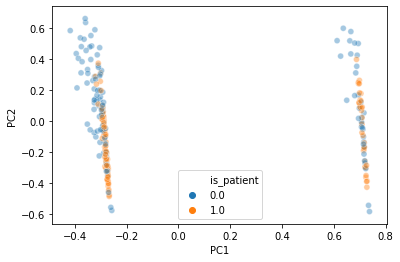

In [351]:
#PCA for ClusterCentroid Under Sampled Dataset
pca_cc1 = PCA(n_components=2)
X_pca_cc1 = pca_cc1.fit_transform(X_train_cc1)
print(pca_cc1.explained_variance_ratio_.cumsum())
y_temp_cc1 = y_train_cc1
y_temp_cc1["PC1"] = X_pca_cc1[:,0]
y_temp_cc1["PC2"] = X_pca_cc1[:,1]
sns.scatterplot(data=y_temp_cc1, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_cc1["is_patient"].value_counts())

In [352]:
print(y_train_cc1.head())
y_train_cc1 = y_train_cc1.drop(["PC1", "PC2"], axis=1)
print(y_train_cc1.head())

     is_patient       PC1       PC2
199         1.0  0.695138  0.242472
69          0.0 -0.322454  0.141662
233         1.0  0.714739 -0.190198
39          0.0 -0.319147 -0.101768
138         1.0 -0.287339  0.004185
     is_patient
199         1.0
69          0.0
233         1.0
39          0.0
138         1.0


<a id="seventh"></a>

In [353]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Cluster Centroid Under sampled Training dataset
print("Naive Bayes on Cluster Centroid Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Naive Bayes on Cluster Centroid Under sampled Training datset
print("\nCross Validation of Naive Bayes on Cluster Centroid Under sampled Training dataset:")
crossValidation(GaussianNB(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Cluster Centroid Under sampled Training dataset:

Confusion Matrix: 
[[44 81]
 [ 3 47]]

Accuracy : 0.52
Sensitivity : 0.352
Precision: 0.9361702127659575
Specificity : 0.94
F-Score : 0.5116279069767442

               precision    recall  f1-score   support

         0.0       0.94      0.35      0.51       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.52       175
   macro avg       0.65      0.65      0.52       175
weighted avg       0.77      0.52      0.52       175
 


Cross Validation of Naive Bayes on Cluster Centroid Under sampled Training dataset:
[0.72815534 0.65686275 0.59803922 0.60784314] 

0.6477251094612603

----------------------------------------------------------------------



In [354]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Cluster Centroids UnderSampled Training dataset
print("SVM Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on SVM Classifier on Cluster Centroids Under sampled Training datset
print("\nCross Validation of SVM Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(LinearSVC(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[54 71]
 [ 3 47]]

Accuracy : 0.5771428571428572
Sensitivity : 0.432
Precision: 0.9473684210526315
Specificity : 0.94
F-Score : 0.5934065934065934

               precision    recall  f1-score   support

         0.0       0.95      0.43      0.59       125
         1.0       0.40      0.94      0.56        50

    accuracy                           0.58       175
   macro avg       0.67      0.69      0.58       175
weighted avg       0.79      0.58      0.58       175
 


Cross Validation of SVM Classifier on Cluster Centroids Undersample Training dataset:
[0.73786408 0.70588235 0.66666667 0.64705882] 

0.6893679802017895

----------------------------------------------------------------------



In [355]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Cluster Centroids Undersampled Training dataset
print("Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Logistic Regression Classifier on Cluster Centroids Undersampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(LogisticRegression(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[52 73]
 [ 5 45]]

Accuracy : 0.5542857142857143
Sensitivity : 0.416
Precision: 0.9122807017543859
Specificity : 0.9
F-Score : 0.5714285714285714

               precision    recall  f1-score   support

         0.0       0.91      0.42      0.57       125
         1.0       0.38      0.90      0.54        50

    accuracy                           0.55       175
   macro avg       0.65      0.66      0.55       175
weighted avg       0.76      0.55      0.56       175
 


Cross Validation of Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:
[0.72815534 0.68627451 0.6372549  0.67647059] 

0.6820388349514563

----------------------------------------------------------------------



In [356]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On Cluster Centroids Undersample Training dataset
print("KNN Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on KNN Classifier on Cluster Centroids Undersampled Training dataset
print("\nCross Validation of KNN Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[89 36]
 [32 18]]

Accuracy : 0.6114285714285714
Sensitivity : 0.712
Precision: 0.7355371900826446
Specificity : 0.36
F-Score : 0.7235772357723577

               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       125
         1.0       0.33      0.36      0.35        50

    accuracy                           0.61       175
   macro avg       0.53      0.54      0.53       175
weighted avg       0.62      0.61      0.62       175
 


Cross Validation of KNN Classifier on Cluster Centroids Undersample Training dataset:
[0.61165049 0.55882353 0.65686275 0.60784314] 

0.6087949743003997

----------------------------------------------------------------------



In [357]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Cluster Centroids UnderSampled Training dataset
print("Random Forest Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Random Forest Classifier on Cluster Centroids under sampled Training datset
print("\nCross Validation of Random Forest Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[70 55]
 [10 40]]

Accuracy : 0.6285714285714286
Sensitivity : 0.56
Precision: 0.875
Specificity : 0.8
F-Score : 0.6829268292682927

               precision    recall  f1-score   support

         0.0       0.88      0.56      0.68       125
         1.0       0.42      0.80      0.55        50

    accuracy                           0.63       175
   macro avg       0.65      0.68      0.62       175
weighted avg       0.75      0.63      0.65       175
 


Cross Validation of Random Forest Classifier on Cluster Centroids Undersample Training dataset:
[0.82524272 0.73529412 0.65686275 0.58823529] 

0.7014087188273368

----------------------------------------------------------------------



In [358]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Cluster Centroids UnderSampled Training Dataset
print("Voting Classifier on Cluster Centroids Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Voting Classifier on Cluster Centroids UnderSampled Training datset
print("\nCross Validation of Voting Classifier on Cluster Centroids under sampled Training dataset:")
crossValidation(vclf, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Cluster Centroids Under sampled Training dataset:

Confusion Matrix: 
[[57 68]
 [ 5 45]]

Accuracy : 0.5828571428571429
Sensitivity : 0.456
Precision: 0.9193548387096774
Specificity : 0.9
F-Score : 0.6096256684491979

               precision    recall  f1-score   support

         0.0       0.92      0.46      0.61       125
         1.0       0.40      0.90      0.55        50

    accuracy                           0.58       175
   macro avg       0.66      0.68      0.58       175
weighted avg       0.77      0.58      0.59       175
 


Cross Validation of Voting Classifier on Cluster Centroids under sampled Training dataset:
[0.74757282 0.7254902  0.67647059 0.62745098] 

0.6942461450599657

----------------------------------------------------------------------



In [359]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Cluster Centroids Undersampled Dataset

dt_cc1 = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_cc1 = AdaBoostClassifier(base_estimator=dt_cc1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on Cluster Centroids Undersampled Dataset:")
clfFitPredict(adb_clf_cc1, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on AdaBoost Classifier on Cluster Centroids Undersampled Dataset
print("\nCross Validation of AdaBoost Classifier on Cluster Centroids Undersampled dataset:")
crossValidation(adb_clf_cc1, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on Cluster Centroids Undersampled Dataset:

Confusion Matrix: 
[[68 57]
 [ 8 42]]

Accuracy : 0.6285714285714286
Sensitivity : 0.544
Precision: 0.8947368421052632
Specificity : 0.84
F-Score : 0.6766169154228855

               precision    recall  f1-score   support

         0.0       0.89      0.54      0.68       125
         1.0       0.42      0.84      0.56        50

    accuracy                           0.63       175
   macro avg       0.66      0.69      0.62       175
weighted avg       0.76      0.63      0.64       175
 


Cross Validation of AdaBoost Classifier on Cluster Centroids Undersampled dataset:
[0.7961165  0.7254902  0.66666667 0.58823529] 

0.6941271654292785

----------------------------------------------------------------------



In [360]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_cc1 = SVC(probability=True, kernel='linear')
adb_clf_svc_cc1 = AdaBoostClassifier(base_estimator=svc_adb_cc1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on Cluster Centroids Undersampled Dataset:")
clfFitPredict(adb_clf_svc_cc1, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on AdaBoostClassifier on Cluster Centroids Undersampled dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Cluster Centroids Undersampled dataset:")
crossValidation(adb_clf_svc_cc1, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on Cluster Centroids Undersampled Dataset:

Confusion Matrix: 
[[45 80]
 [ 2 48]]

Accuracy : 0.5314285714285715
Sensitivity : 0.36
Precision: 0.9574468085106383
Specificity : 0.96
F-Score : 0.5232558139534883

               precision    recall  f1-score   support

         0.0       0.96      0.36      0.52       125
         1.0       0.38      0.96      0.54        50

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on Cluster Centroids Undersampled dataset:
[0.65048544 0.62745098 0.6372549  0.66666667] 

0.6454644964782029

----------------------------------------------------------------------



In [361]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Cluster Centroids Undersampled Dataset

gbc_cc1 = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the Cluster Centroids Undersampled dataset:")
clfFitPredict(gbc_cc1, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on GradientBoostingClassifier on Cluster Centroids Undersampled datset
print("\nCross Validation of GradientBoostingClassifier on Cluster Centroids Undersampled dataset:")
crossValidation(gbc_cc1, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the Cluster Centroids Undersampled dataset:

Confusion Matrix: 
[[67 58]
 [ 9 41]]

Accuracy : 0.6171428571428571
Sensitivity : 0.536
Precision: 0.881578947368421
Specificity : 0.82
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.88      0.54      0.67       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.62       175
   macro avg       0.65      0.68      0.61       175
weighted avg       0.75      0.62      0.63       175
 


Cross Validation of GradientBoostingClassifier on Cluster Centroids Undersampled dataset:
[0.77669903 0.69607843 0.65686275 0.59803922] 

0.681919855320769

----------------------------------------------------------------------



In [362]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Cluster Centroids Undersampled Dataset

xgb_clf_cc1 = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the Cluster Centroids Undersampled dataset:")
clfFitPredict(xgb_clf_cc1, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on XGBClassifier on Cluster Centroids Undersampled dataset
print("\nCross Validation of XGBClassifier on Cluster Centroids Undersampled dataset:")
crossValidation(xgb_clf_cc1, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the Cluster Centroids Undersampled dataset:

Confusion Matrix: 
[[51 74]
 [ 5 45]]

Accuracy : 0.5485714285714286
Sensitivity : 0.408
Precision: 0.9107142857142857
Specificity : 0.9
F-Score : 0.56353591160221

               precision    recall  f1-score   support

         0.0       0.91      0.41      0.56       125
         1.0       0.38      0.90      0.53        50

    accuracy                           0.55       175
   macro avg       0.64      0.65      0.55       175
weighted avg       0.76      0.55      0.55       175
 


Cross Validation of XGBClassifier on Cluster Centroids Undersampled dataset:
[0.59223301 0.58823529 0.58823529 0.59803922] 

0.5916857034075766

----------------------------------------------------------------------



In [363]:
#Bagging Classifier On the Cluster Centroids UnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on Cluster CentroidsUnderSampled dataset :")
clfFitPredict(clf_bagging, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Bagging Classifier on Cluster Centroids UnderSampled datset
print("\nCross Validation of Bagging Classifier on Cluster Centroids UnderSampled dataset :")
crossValidation(clf_bagging, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On Cluster Centroids UnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_cc1, X_test, y_train_cc1, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On Cluster Centroids UnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_cc1, y_cc1, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on Cluster CentroidsUnderSampled dataset :

Confusion Matrix: 
[[77 48]
 [15 35]]

Accuracy : 0.64
Sensitivity : 0.616
Precision: 0.8369565217391305
Specificity : 0.7
F-Score : 0.7096774193548386

               precision    recall  f1-score   support

         0.0       0.84      0.62      0.71       125
         1.0       0.42      0.70      0.53        50

    accuracy                           0.64       175
   macro avg       0.63      0.66      0.62       175
weighted avg       0.72      0.64      0.66       175
 


Cross Validation of Bagging Classifier on Cluster Centroids UnderSampled dataset :
[0.77669903 0.71568627 0.64705882 0.62745098] 

0.6917237768893966

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On Cluster Centroids UnderSampled Dataset

Confusion Matrix: 
[[77 48]
 [15 35]]

Accuracy : 0.64
Sensitivity : 0.616
Precision: 0.8369565217391305
Specificity : 0.7
F-Score 

In [364]:
#Perceptron On The Cluster Centroids UnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on Cluster Centroids UnderSampled dataset :")
clfFitPredict(clf_percept, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Perceptron on Cluster Centroids UnderSampled datset
print("\nCross Validation of Perceptron on Cluster Centroids UnderSampled dataset :")
crossValidation(clf_percept, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on Cluster Centroids UnderSampled dataset :

Confusion Matrix: 
[[35 90]
 [ 2 48]]

Accuracy : 0.4742857142857143
Sensitivity : 0.28
Precision: 0.9459459459459459
Specificity : 0.96
F-Score : 0.4320987654320988

               precision    recall  f1-score   support

         0.0       0.95      0.28      0.43       125
         1.0       0.35      0.96      0.51        50

    accuracy                           0.47       175
   macro avg       0.65      0.62      0.47       175
weighted avg       0.78      0.47      0.45       175
 


Cross Validation of Perceptron on Cluster Centroids UnderSampled dataset :
[0.62135922 0.71568627 0.6372549  0.68627451] 

0.6651437273938701

----------------------------------------------------------------------



<a id="pca7"></a>

In [365]:
#Classification With Cluster Centroids Under Sampling PCA Training Dataset

pca_cc_1 = PCA()
X_pca_cc_1 = pca_cc_1.fit_transform(X_train_cc1)
print(pca_cc_1.explained_variance_ratio_.cumsum())


pca_cc1 = PCA(n_components=6)
X_pca_train_cc1 = pd.DataFrame(pca_cc1.fit_transform(X_train_cc1))
X_pca_test_cc1 = pd.DataFrame(pca_cc1.transform(X_test))

X_pca_cc1 = pd.concat([X_pca_train_cc1, X_pca_test_cc1], axis=0)

[0.48968788 0.66782164 0.79537781 0.87413913 0.92220788 0.96152161
 0.99254253 0.99685271 0.99897522 1.        ]


In [366]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Cluster Centroids Under Sampling PCA Training Dataset
print("Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(GaussianNB(), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(GaussianNB(), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Cluster Centroids Under Sampling PCA Training Dataset
print("SVM Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(LinearSVC(), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on SVM Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of SVM Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(LinearSVC(), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Cluster Centroids Under Sampling PCA Training Dataset
print("Logistic Regression Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Logistic Regression Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of Logistic Regression Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(LogisticRegression(), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


#4.1 KNN Classifier On Cluster Centroids Under Sampling PCA Training Dataset
print("KNN Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on KNN Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of KNN Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Cluster Centroids Under Sampling PCA Training Dataset
print("Random Forest Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Random Forest Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of Random Forest Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Cluster Centroids Under Sampling PCA Training Dataset
print("Voting Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
clfFitPredict(vclf, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Voting Classifier on Cluster Centroids Under Sampling PCA Training Dataset
print("\nCross Validation of Voting Classifier on Cluster Centroids Under Sampling PCA Training Dataset:")
crossValidation(vclf, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on Cluster Centroids Undersampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on Cluster Centroids Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_cc1, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on AdaBoost Classifier on Cluster Centroids Undersampled PCA Training Dataset
print("\nCross Validation of AdaBoost Classifier on Cluster Centroids Undersampled PCA Training dataset:")
crossValidation(adb_clf_cc1, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on Cluster Centroids Undersampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_cc1, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on AdaBoostClassifier on Cluster Centroids Undersampled PCA Training dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on Cluster Centroids Undersampled PCA Training dataset:")
crossValidation(adb_clf_svc_cc1, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On Cluster Centroids Undersampled PCA Training Dataset

print("\nGradientBoostingClassifier on the Cluster Centroids Undersampled PCA Training dataset:")
clfFitPredict(gbc_cc1, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on GradientBoostingClassifier on Cluster Centroids Undersampled PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on Cluster Centroids Undersampled PCA Training dataset:")
crossValidation(gbc_cc1, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the Cluster Centroids Undersampled PCA Training Dataset

print("\nXGBClassifier on the Cluster Centroids Undersampled PCA Training dataset:")
clfFitPredict(xgb_clf_cc1, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on XGBClassifier on Cluster Centroids Undersampled PCA Training dataset
print("\nCross Validation of XGBClassifier on Cluster Centroids Undersampled PCA Training dataset:")
crossValidation(xgb_clf_cc1, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

#Bagging Classifier On the Cluster Centroids UnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on Cluster Centroids UnderSampled dataset :")
clfFitPredict(clf_bagging, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Bagging Classifier on Cluster Centroids UnderSampled datset
print("\nCross Validation of Bagging Classifier on Cluster Centroids UnderSampled dataset :")
crossValidation(clf_bagging, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On Cluster Centroids UnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On Cluster Centroids UnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca_cc1, y_cc1, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The Cluster Centroids UnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on Cluster Centroids UnderSampled dataset :")
clfFitPredict(clf_percept, X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test)

#Cross Validation on Perceptron on Cluster Centroids UnderSampled datset
print("\nCross Validation of Perceptron on Cluster Centroids UnderSampled dataset :")
crossValidation(clf_percept, X_pca_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset:

Confusion Matrix: 
[[45 80]
 [ 9 41]]

Accuracy : 0.49142857142857144
Sensitivity : 0.36
Precision: 0.8333333333333334
Specificity : 0.82
F-Score : 0.5027932960893855

               precision    recall  f1-score   support

         0.0       0.83      0.36      0.50       125
         1.0       0.34      0.82      0.48        50

    accuracy                           0.49       175
   macro avg       0.59      0.59      0.49       175
weighted avg       0.69      0.49      0.50       175
 


Cross Validation of Naive Bayes on Cluster Centroids Under Sampling PCA Training Dataset:
[0.75728155 0.73529412 0.54901961 0.54901961] 

0.647653721682848

----------------------------------------------------------------------

SVM Classifier on Cluster Centroids Under Sampling PCA Training Dataset:

Confusion Matrix: 
[[53 72]
 [ 3 47]]

Accuracy : 0.57

[0.81553398 0.68627451 0.62745098 0.62745098] 

0.6891776127926899

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On Cluster Centroids UnderSampled Dataset

Confusion Matrix: 
[[74 51]
 [17 33]]

Accuracy : 0.6114285714285714
Sensitivity : 0.592
Precision: 0.8131868131868132
Specificity : 0.66
F-Score : 0.6851851851851852

               precision    recall  f1-score   support

         0.0       0.81      0.59      0.69       125
         1.0       0.39      0.66      0.49        50

    accuracy                           0.61       175
   macro avg       0.60      0.63      0.59       175
weighted avg       0.69      0.61      0.63       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On Cluster Centroids UnderSampled Dataset
[0.81553398 0.68627451 0.62745098 0.62745098] 

0.6891776127926899

----------------------------------------------------------------------

Baggi

<a id="hyper7"></a>

In [367]:
#Hyperparameter Tuning for SVC on Cluster Centroids UnderSampled Dataset
random_svc_cc = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_svc_cc, "RSCV_SVC_cc.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


['RSCV_SVC_cc.pkl']

In [368]:
print("\nRandomizedSearchCV for SVC with Cluster Centroids UnderSampled Dataset")
RSCV_SVC_cc_loaded  = joblib.load("RSCV_SVC_cc.pkl")
print("\nBest Parameters :", RSCV_SVC_cc_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_cc_loaded.predict(X_test)))


RandomizedSearchCV for SVC with Cluster Centroids UnderSampled Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 100}

Best Score : 0.7690217391304348

Accuracy Score : 0.5542857142857143


In [369]:
#Hyperparameter Tuning for SVC with Cluster Centroids UnderSampled Dataset
random_svc_cc_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_cc_pca.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_svc_cc_pca, "RSCV_SVC_cc_pca.pkl")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


['RSCV_SVC_cc_pca.pkl']

In [370]:
print("\nRandomizedSearchCV for SVC with Cluster Centroids UnderSampled PCA Dataset")
RSCV_SVC_cc_pca_loaded  = joblib.load("RSCV_SVC_cc_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_cc_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_cc_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_cc_pca_loaded.predict(X_pca_test_cc1)))


RandomizedSearchCV for SVC with Cluster Centroids UnderSampled PCA Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score : 0.7858695652173913

Accuracy Score : 0.56


In [371]:
#Hyperparameter Tuning for Logistic Regression On Cluster Centroids Dataset
random_logreg_cc = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_logreg_cc, "RSCV_LR_cc.pkl")


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    4.8s finished
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['RSCV_LR_cc.pkl']

In [372]:
print("\nRandomizedSearchCV for LR with Cluster Centroids UnderSampled Dataset")
RSCV_LR_cc_loaded  = joblib.load("RSCV_LR_cc.pkl")
print("\nBest Parameters :",RSCV_LR_cc_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_cc_loaded.predict(X_test)))



RandomizedSearchCV for LR with Cluster Centroids UnderSampled Dataset

Best Parameters : {'solver': 'saga', 'penalty': 'l2', 'C': 100}

Best Score : 0.7858695652173913

Accuracy Score : 0.5771428571428572


In [373]:
#Hyperparameter Tuning for LR on Cluster Centroids Dataset
random_logreg_pca_cc = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_cc.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_logreg_pca_cc, "RSCV_LR_pca_cc.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['RSCV_LR_pca_cc.pkl']

In [374]:
print("\nRandomizedSearchCV for LR with Cluster Centroids UnderSampled PCA Dataset")
RSCV_LR_pca_cc_loaded  = joblib.load("RSCV_LR_pca_cc.pkl")
print("\nBest Parameters :", RSCV_LR_pca_cc_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_cc_loaded.predict(X_pca_test_cc1)))



RandomizedSearchCV for LR with Cluster Centroids UnderSampled PCA Dataset

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.7733695652173913

Accuracy Score : 0.5657142857142857


In [375]:
#Hyperparameter Tuning for RandomForest On Cluster Centroid UnderSampled Dataset

random_rf_cc = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_rf_cc, "RSCV_RF_cc.pkl")

['RSCV_RF_cc.pkl']

In [376]:
print("\nRandomizedSearchCV for RF with Cluster Centroids UnderSampled Dataset")
RSCV_RF_cc_loaded  = joblib.load("RSCV_RF_cc.pkl")
print("\nBest Parameter :", RSCV_RF_cc_loaded .best_params_)
print("\nBest Score :", RSCV_RF_cc_loaded .best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_cc_loaded.predict(X_test)))


RandomizedSearchCV for RF with Cluster Centroids UnderSampled Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.30000000000000004, 'max_features': 'auto', 'max_depth': 22.0, 'bootstrap': True}

Best Score : 0.7646739130434782

Accuracy Score : 0.6514285714285715


In [377]:
#Hyperparameter Tuning with RF on CC Dataset
random_rf_pca_cc = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_cc.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_rf_pca_cc, "RSCV_RF_pca_cc.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.0s finished


['RSCV_RF_pca_cc.pkl']

In [378]:
print("\nRandomizedSearchCV for RF on Cluster Centroids UnderSampled PCA Dataset")
RSCV_RF_pca_cc_loaded  = joblib.load("RSCV_RF_pca_cc.pkl")
print("\nBest Parameter :", RSCV_RF_pca_cc_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_cc_loaded.predict(X_pca_test_cc1)))



RandomizedSearchCV for RF on Cluster Centroids UnderSampled PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 26.0, 'bootstrap': False}

Best Score : 0.7340579710144928

Accuracy Score : 0.5942857142857143


In [379]:
#Hyperparameter Tuning for GradientBoostingClassifier On Cluster Centroids Dataset

clf_gbc_cc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(clf_gbc_cc,'RSCV_GBC_cc.pkl')

['RSCV_GBC_cc.pkl']

In [380]:
print("\nRandomizedSearchCV for GBC with Cluster Centroids UnderSampled Dataset")
RSCV_GBC_cc_loaded  = joblib.load("RSCV_GBC_cc.pkl")
print("\nBest Score :", RSCV_GBC_cc_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_cc_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_cc_loaded.predict(X_test)))



RandomizedSearchCV for GBC with Cluster Centroids UnderSampled Dataset

Best Score : 0.7860507246376811

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 0.6, 'min_samples_leaf': 0.2, 'max_depth': 30.0, 'learning_rate': 0.25}

Accuracy Score : 0.5942857142857143


In [381]:
#Hyperparameter Tuning for GBC on CC Dataset
clf_gbc_pca_cc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_cc.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(clf_gbc_pca_cc,'RSCV_GBC_pca_cc.pkl')

['RSCV_GBC_pca_cc.pkl']

In [382]:
print("\nRandomizedSearchCV for GBC with Cluster Centroids UnderSampled PCA Dataset")
RSCV_GBC_pca_cc_loaded  = joblib.load("RSCV_GBC_pca_cc.pkl")
print("\nBest Score :",RSCV_GBC_pca_cc_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_cc_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_cc_loaded.predict(X_pca_test_cc1)))



RandomizedSearchCV for GBC with Cluster Centroids UnderSampled PCA Dataset

Best Score : 0.7471014492753623

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1, 'max_depth': 22.0, 'learning_rate': 0.005}

Accuracy Score : 0.5371428571428571


In [383]:
#Hyperparameter for AdaBoost Classifier On CC Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_cc = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_adaboost_cc, "RSCV_ADC_cc.pkl")


['RSCV_ADC_cc.pkl']

In [384]:
print("\nRandomizedSearchCV for ADC with Cluster Centroid UnderSampled PCA Dataset")
RSCV_ADC_cc_loaded  = joblib.load("RSCV_ADC_cc.pkl")
print("\nBest Score -", RSCV_ADC_cc_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_cc_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_cc_loaded.predict(X_test)))


RandomizedSearchCV for ADC with Cluster Centroid UnderSampled PCA Dataset

Best Score - 0.5661231884057971

Best Parameters - {'n_estimators': 500, 'learning_rate': 1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.6742857142857143


In [385]:
#Hyperparameter Tuning For AdaBoostClassifier on PCA CC Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_cc_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_cc_pca.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_adaboost_cc_pca, "RSCV_ADC_cc_pca.pkl")


['RSCV_ADC_cc_pca.pkl']

In [386]:
print("\nRandomizedSearchCV for SVC with Cluster Centroids UnderSampled PCA Dataset")
RSCV_ADC_cc_pca_loaded  = joblib.load("RSCV_ADC_cc_pca.pkl")
print("\nBest Score -", RSCV_ADC_cc_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_cc_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_cc_pca_loaded.predict(X_pca_test_cc1)))


RandomizedSearchCV for SVC with Cluster Centroids UnderSampled PCA Dataset

Best Score - 0.5911231884057973

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.6457142857142857


In [387]:
#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_cc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_adaboost_svc_cc, "RSCV_ADC_svc_cc.pkl")


['RSCV_ADC_svc_cc.pkl']

In [388]:
print("\nRandomizedSearchCV for ADC with SVC on Cluster Centroids UnderSampled Dataset")
RSCV_ADC_svc_cc_loaded  = joblib.load("RSCV_ADC_svc_cc.pkl")
print("\nBest Score :", RSCV_ADC_svc_cc_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_cc_loaded.predict(X_test)))



RandomizedSearchCV for ADC with SVC on Cluster Centroids UnderSampled Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5327898550724639

Accuracy Score : 0.3942857142857143


In [389]:
#Hyperparameter Tuning with ADC with SVC on CC PCA Dataset
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_cc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_cc.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_adaboost_svc_pca_cc, "RSCV_ADC_svc_pca_cc.pkl")


/home/srix/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


['RSCV_ADC_svc_pca_cc.pkl']

In [390]:

print("\nRandomizedSearchCV for SVC with Cluster Centroid UnderSampled PCA Dataset")
RSCV_ADC_svc_pca_cc_loaded  = joblib.load("RSCV_ADC_svc_pca_cc.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_cc_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_cc_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_cc_loaded.predict(X_pca_test_cc1)))


RandomizedSearchCV for SVC with Cluster Centroid UnderSampled PCA Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5327898550724639

Accuracy Score : 0.38857142857142857


#Hyperparameter Tuning for SVC on Cluster Centroids UnderSampled Dataset
random_svc_cc = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_svc_cc, "RSCV_SVC_cc.pkl")

print("\nRandomizedSearchCV for SVC with Cluster Centroids UnderSampled Dataset")
RSCV_SVC_cc_loaded  = joblib.load("RSCV_SVC_cc.pkl")
print("\nBest Parameters :", RSCV_SVC_cc_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_cc_loaded.predict(X_test)))

random_svc_cc_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_cc_pca.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_svc_cc_pca, "RSCV_SVC_cc_pca.pkl")

print("\nRandomizedSearchCV for SVC with Cluster Centroids UnderSampled PCA Dataset")
RSCV_SVC_cc_pca_loaded  = joblib.load("RSCV_SVC_cc_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_cc_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_cc_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_cc_pca_loaded.predict(X_pca_test_cc1)))


#Hyperparameter Tuning for Logistic Regression On Cluster Centroids Dataset

random_logreg_cc = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_logreg_cc, "RSCV_LR_cc.pkl")

print("\nRandomizedSearchCV for LR with Cluster Centroids UnderSampled Dataset")
RSCV_LR_cc_loaded  = joblib.load("RSCV_LR_cc.pkl")
print("\nBest Parameters :",RSCV_LR_cc_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_cc_loaded.predict(X_test)))

random_logreg_pca_cc = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_cc.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_logreg_pca_cc, "RSCV_LR_pca_cc.pkl")

print("\nRandomizedSearchCV for LR with Cluster Centroids UnderSampled PCA Dataset")
RSCV_LR_pca_cc_loaded  = joblib.load("RSCV_LR_pca_cc.pkl")
print("\nBest Parameters :", RSCV_LR_pca_cc_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_cc_loaded.predict(X_pca_test_cc1)))


#Hyperparameter Tuning for RandomForest On Cluster Centroid UnderSampled Dataset

random_rf_cc = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_rf_cc, "RSCV_RF_cc.pkl")

print("\nRandomizedSearchCV for RF with Cluster Centroids UnderSampled Dataset")
RSCV_RF_cc_loaded  = joblib.load("RSCV_RF_cc.pkl")
print("\nBest Parameter :", RSCV_RF_cc_loaded .best_params_)
print("\nBest Score :", RSCV_RF_cc_loaded .best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_cc_loaded.predict(X_test)))

random_rf_pca_cc = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_cc.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_rf_pca_cc, "RSCV_RF_pca_cc.pkl")

print("\nRandomizedSearchCV for RF on Cluster Centroids UnderSampled PCA Dataset")
RSCV_RF_pca_cc_loaded  = joblib.load("RSCV_RF_pca_cc.pkl")
print("\nBest Parameter :", RSCV_RF_pca_cc_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_cc_loaded.predict(X_pca_test_cc1)))


#Hyperparameter Tuning for GradientBoostingClassifier On Cluster Centroids Dataset

clf_gbc_cc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(clf_gbc_cc,'RSCV_GBC_cc.pkl')

print("\nRandomizedSearchCV for GBC with Cluster Centroids UnderSampled Dataset")
RSCV_GBC_cc_loaded  = joblib.load("RSCV_GBC_cc.pkl")
print("\nBest Score :", RSCV_GBC_cc_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_cc_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_cc_loaded.predict(X_test)))

clf_gbc_pca_cc = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_cc.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(clf_gbc_pca_cc,'RSCV_GBC_pca_cc.pkl')

print("\nRandomizedSearchCV for GBC with Cluster Centroids UnderSampled PCA Dataset")
RSCV_GBC_pca_cc_loaded  = joblib.load("RSCV_GBC_pca_cc.pkl")
print("\nBest Score :",RSCV_GBC_pca_cc_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_cc_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_cc_loaded.predict(X_pca_test_cc1)))


#Hyperparameter for AdaBoost Classifier On CC Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_cc = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_adaboost_cc, "RSCV_ADC_cc.pkl")

print("\nRandomizedSearchCV for ADC with Cluster Centroid UnderSampled PCA Dataset")
RSCV_ADC_cc_loaded  = joblib.load("RSCV_ADC_cc.pkl")
print("\nBest Score -", RSCV_ADC_cc_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_cc_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_cc_loaded.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on PCA CC Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_cc_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_cc_pca.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_adaboost_cc_pca, "RSCV_ADC_cc_pca.pkl")

print("\nRandomizedSearchCV for SVC with Cluster Centroids UnderSampled PCA Dataset")
RSCV_ADC_cc_pca_loaded  = joblib.load("RSCV_ADC_cc_pca.pkl")
print("\nBest Score -", RSCV_ADC_cc_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_cc_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_cc_pca_loaded.predict(X_pca_test_cc1)))

#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_cc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_cc.fit(X_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_adaboost_svc_cc, "RSCV_ADC_svc_cc.pkl")

print("\nRandomizedSearchCV for ADC with SVC on Cluster Centroids UnderSampled Dataset")
RSCV_ADC_svc_cc_loaded  = joblib.load("RSCV_ADC_svc_cc.pkl")
print("\nBest Score :", RSCV_ADC_svc_cc_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_cc_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_cc_loaded.predict(X_test)))

#X_train_cc1, X_test, y_train_cc1, y_test
#X_pca_train_cc1, X_pca_test_cc1, y_train_cc1, y_test

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_cc = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_cc.fit(X_pca_train_cc1, y_train_cc1.values.ravel())
joblib.dump(random_adaboost_svc_pca_cc, "RSCV_ADC_svc_pca_cc.pkl")

print("\nRandomizedSearchCV for SVC with Cluster Centroid UnderSampled PCA Dataset")
RSCV_ADC_svc_pca_cc_loaded  = joblib.load("RSCV_ADC_svc_pca_cc.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_cc_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_cc_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_cc_loaded.predict(X_pca_test_cc1)))

<a id="smote"></a>

In [391]:
print("\n----------------------------------------------------------------------\n")

#SMOTE Over Sampling for Training Dataset
sm1 = SMOTE(random_state=42)
X_train_sm1, y_train_sm1 = sm1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTE Over Sampling\n")
print(pd.Series(y_train_sm1).value_counts())
X_train_sm1 = pd.DataFrame(X_train_sm1)
y_train_sm1 = pd.DataFrame(y_train_sm1)
y_train_sm1 = y_train_sm1.rename(columns = {0:'is_patient'})


X_temp_sm1 = pd.concat([X_train_sm1, y_train_sm1], axis=1)
#shuffling the training dataset
X_temp_sm1 = X_temp_sm1.sample(frac=1, random_state=1)
X_train_sm1  = X_temp_sm1.drop(["is_patient"], axis=1)
y_train_sm1  = X_temp_sm1[["is_patient"]]

X_sm1 = pd.concat([X_train_sm1, X_test], axis=0)
y_sm1 = pd.concat([y_train_sm1, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTE Over Sampling

0.0    291
1.0    291
dtype: int64

----------------------------------------------------------------------



<a id="graph8"></a>

[0.57289228 0.7420241 ]
0.0    291
1.0    291
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


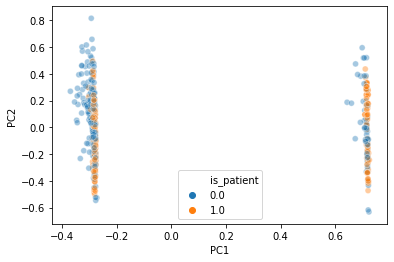

In [392]:
#PCA for SMOTE Over Sampled Dataset
pca_sm1 = PCA(n_components=2)
X_pca_sm1 = pca_sm1.fit_transform(X_train_sm1)
print(pca_sm1.explained_variance_ratio_.cumsum())
y_temp_sm1 = y_train_sm1
y_temp_sm1["PC1"] = X_pca_sm1[:,0]
y_temp_sm1["PC2"] = X_pca_sm1[:,1]
sns.scatterplot(data=y_temp_sm1, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_sm1["is_patient"].value_counts())

In [393]:
print(y_train_sm1.head())
y_train_sm1 = y_train_sm1.drop(["PC1", "PC2"], axis=1)
print(y_train_sm1.head())

     is_patient       PC1       PC2
457         1.0 -0.278275 -0.355462
225         1.0  0.712903  0.088737
162         0.0 -0.290528  0.658835
195         0.0 -0.294793  0.041554
267         0.0 -0.283704  0.070613
     is_patient
457         1.0
225         1.0
162         0.0
195         0.0
267         0.0


<a id="eighth"></a>

In [394]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTE Oversampled Training dataset
print("Naive Bayes on SMOTE Oversampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Naive Bayes on SMOTE Over sampled Training datset
print("\nCross Validation of Naive Bayes on SMOTE Over sampled Training dataset:")
crossValidation(GaussianNB(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTE Oversampled Training dataset:

Confusion Matrix: 
[[56 69]
 [ 6 44]]

Accuracy : 0.5714285714285714
Sensitivity : 0.448
Precision: 0.9032258064516129
Specificity : 0.88
F-Score : 0.5989304812834224

               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60       125
         1.0       0.39      0.88      0.54        50

    accuracy                           0.57       175
   macro avg       0.65      0.66      0.57       175
weighted avg       0.76      0.57      0.58       175
 


Cross Validation of Naive Bayes on SMOTE Over sampled Training dataset:
[0.67368421 0.65608466 0.68253968 0.67195767] 

0.6710665552770817

----------------------------------------------------------------------



In [395]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTE OverSampled Training dataset
print("SVM Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(LinearSVC(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on SVM Classifier on SMOTE Oversampled Training datset
print("\nCross Validation of SVM Classifier on SMOTE Oversample Training dataset:")
crossValidation(LinearSVC(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of SVM Classifier on SMOTE Oversample Training dataset:
[0.71578947 0.67195767 0.68253968 0.70899471] 

0.6948203842940686

----------------------------------------------------------------------



In [396]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTE Oversampled Training dataset
print("Logistic Regression Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTE Oversampled Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTE Oversample Training dataset:")
crossValidation(LogisticRegression(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Logistic Regression Classifier on SMOTE Oversample Training dataset:
[0.68947368 0.66666667 0.60846561 0.7037037 ] 

0.6670774157616263

----------------------------------------------------------------------



In [397]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTE Oversample Training dataset
print("KNN Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on KNN Classifier on SMOTE Oversampled Training dataset
print("\nCross Validation of KNN Classifier on SMOTE Oversample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[102  23]
 [ 32  18]]

Accuracy : 0.6857142857142857
Sensitivity : 0.816
Precision: 0.7611940298507462
Specificity : 0.36
F-Score : 0.7876447876447876

               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       125
         1.0       0.44      0.36      0.40        50

    accuracy                           0.69       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.67      0.69      0.68       175
 


Cross Validation of KNN Classifier on SMOTE Oversample Training dataset:
[0.73684211 0.74603175 0.77777778 0.69312169] 

0.7384433305485937

----------------------------------------------------------------------



In [398]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTE OverSampled Training dataset
print("Random Forest Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Random Forest Classifier on SMOTE Over sampled Training datset
print("\nCross Validation of Random Forest Classifier on SMOTE Oversample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[75 50]
 [15 35]]

Accuracy : 0.6285714285714286
Sensitivity : 0.6
Precision: 0.8333333333333334
Specificity : 0.7
F-Score : 0.6976744186046512

               precision    recall  f1-score   support

         0.0       0.83      0.60      0.70       125
         1.0       0.41      0.70      0.52        50

    accuracy                           0.63       175
   macro avg       0.62      0.65      0.61       175
weighted avg       0.71      0.63      0.65       175
 


Cross Validation of Random Forest Classifier on SMOTE Oversample Training dataset:
[0.75789474 0.69312169 0.6984127  0.66666667] 

0.7040239487607908

----------------------------------------------------------------------



In [399]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTE OverSampled Training Dataset
print("Voting Classifier on SMOTE Over sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Voting Classifier on SMOTE OverSampled Training dataset
print("\nCross Validation of Voting Classifier on SMOTE Over sampled Training dataset:")
crossValidation(vclf, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on SMOTE Over sampled Training dataset:

Confusion Matrix: 
[[72 53]
 [10 40]]

Accuracy : 0.64
Sensitivity : 0.576
Precision: 0.8780487804878049
Specificity : 0.8
F-Score : 0.6956521739130435

               precision    recall  f1-score   support

         0.0       0.88      0.58      0.70       125
         1.0       0.43      0.80      0.56        50

    accuracy                           0.64       175
   macro avg       0.65      0.69      0.63       175
weighted avg       0.75      0.64      0.66       175
 


Cross Validation of Voting Classifier on SMOTE Over sampled Training dataset:
[0.73157895 0.69312169 0.68253968 0.71957672] 

0.7067042606516291

----------------------------------------------------------------------



In [400]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTE OverSampled Dataset

dt_sm1 = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_sm1 = AdaBoostClassifier(base_estimator=dt_sm1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTE OverSampled Dataset:")
clfFitPredict(adb_clf_sm1, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on AdaBoost Classifier on SMOTE OverSampled Dataset
print("\nCross Validation of AdaBoost Classifier on SMOTE OverSampled dataset:")
crossValidation(adb_clf_sm1, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on SMOTE OverSampled Dataset:

Confusion Matrix: 
[[71 54]
 [11 39]]

Accuracy : 0.6285714285714286
Sensitivity : 0.568
Precision: 0.8658536585365854
Specificity : 0.78
F-Score : 0.6859903381642511

               precision    recall  f1-score   support

         0.0       0.87      0.57      0.69       125
         1.0       0.42      0.78      0.55        50

    accuracy                           0.63       175
   macro avg       0.64      0.67      0.62       175
weighted avg       0.74      0.63      0.65       175
 


Cross Validation of AdaBoost Classifier on SMOTE OverSampled dataset:
[0.71578947 0.68783069 0.66137566 0.68253968] 

0.6868838763575607

----------------------------------------------------------------------



In [401]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_sm1 = SVC(probability=True, kernel='linear')
adb_clf_svc_sm1 = AdaBoostClassifier(base_estimator=svc_adb_sm1, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on SMOTE OverSampled Dataset:")
clfFitPredict(adb_clf_svc_sm1, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on AdaBoostClassifier on SMOTE OverSampled dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTE OverSampled dataset:")
crossValidation(adb_clf_svc_sm1, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on SMOTE OverSampled Dataset:

Confusion Matrix: 
[[83 42]
 [15 35]]

Accuracy : 0.6742857142857143
Sensitivity : 0.664
Precision: 0.8469387755102041
Specificity : 0.7
F-Score : 0.7443946188340808

               precision    recall  f1-score   support

         0.0       0.85      0.66      0.74       125
         1.0       0.45      0.70      0.55        50

    accuracy                           0.67       175
   macro avg       0.65      0.68      0.65       175
weighted avg       0.73      0.67      0.69       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on SMOTE OverSampled dataset:
[0.65263158 0.62962963 0.62962963 0.6984127 ] 

0.6525758841548315

----------------------------------------------------------------------



In [402]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTE OverSampled Dataset

gbc_sm1 = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the SMOTE OverSampled dataset:")
clfFitPredict(gbc_sm1, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTE OverSampled datset
print("\nCross Validation of GradientBoostingClassifier on SMOTE OverSampled dataset:")
crossValidation(gbc_sm1, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


GradientBoostingClassifier on the SMOTE OverSampled dataset:

Confusion Matrix: 
[[82 43]
 [22 28]]

Accuracy : 0.6285714285714286
Sensitivity : 0.656
Precision: 0.7884615384615384
Specificity : 0.56
F-Score : 0.7161572052401747

               precision    recall  f1-score   support

         0.0       0.79      0.66      0.72       125
         1.0       0.39      0.56      0.46        50

    accuracy                           0.63       175
   macro avg       0.59      0.61      0.59       175
weighted avg       0.68      0.63      0.64       175
 


Cross Validation of GradientBoostingClassifier on SMOTE OverSampled dataset:
[0.76315789 0.71957672 0.71957672 0.67724868] 

0.7198900027847396

----------------------------------------------------------------------



In [403]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTE OverSampled Dataset

xgb_clf_sm1 = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the SMOTE OverSampled dataset:")
clfFitPredict(xgb_clf_sm1, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on XGBClassifier on SMOTE OverSampled dataset
print("\nCross Validation of XGBClassifier on SMOTE OverSampled dataset:")
crossValidation(xgb_clf_sm1, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the SMOTE OverSampled dataset:

Confusion Matrix: 
[[76 49]
 [14 36]]

Accuracy : 0.64
Sensitivity : 0.608
Precision: 0.8444444444444444
Specificity : 0.72
F-Score : 0.7069767441860465

               precision    recall  f1-score   support

         0.0       0.84      0.61      0.71       125
         1.0       0.42      0.72      0.53        50

    accuracy                           0.64       175
   macro avg       0.63      0.66      0.62       175
weighted avg       0.72      0.64      0.66       175
 


Cross Validation of XGBClassifier on SMOTE OverSampled dataset:
[0.54736842 0.55026455 0.55026455 0.55026455] 

0.5495405179615706

----------------------------------------------------------------------



In [404]:
#Bagging Classifier On the SMOTE OverSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on SMOTE OverSampled dataset :")
clfFitPredict(clf_bagging, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Bagging Classifier on SMOTE OverSampled datset
print("\nCross Validation of Bagging Classifier on SMOTE OverSampled dataset :")
crossValidation(clf_bagging, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On SMOTE OverSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_sm1, X_test, y_train_sm1, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On SMOTE OverSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_sm1, y_sm1, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on SMOTE OverSampled dataset :

Confusion Matrix: 
[[96 29]
 [29 21]]

Accuracy : 0.6685714285714286
Sensitivity : 0.768
Precision: 0.768
Specificity : 0.42
F-Score : 0.768

               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       125
         1.0       0.42      0.42      0.42        50

    accuracy                           0.67       175
   macro avg       0.59      0.59      0.59       175
weighted avg       0.67      0.67      0.67       175
 


Cross Validation of Bagging Classifier on SMOTE OverSampled dataset :
[0.79473684 0.83068783 0.77248677 0.69312169] 

0.7727582846003899

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On SMOTE OverSampled Dataset

Confusion Matrix: 
[[96 29]
 [29 21]]

Accuracy : 0.6685714285714286
Sensitivity : 0.768
Precision: 0.768
Specificity : 0.42
F-Score : 0.768

               precision    recall  f1

In [405]:
#Perceptron On The SMOTE OverSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on SMOTE OverSampled dataset :")
clfFitPredict(clf_percept, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Perceptron on SMOTE OverSampled datset
print("\nCross Validation of Perceptron on SMOTE OverSampled dataset :")
crossValidation(clf_percept, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on SMOTE OverSampled dataset :

Confusion Matrix: 
[[94 31]
 [27 23]]

Accuracy : 0.6685714285714286
Sensitivity : 0.752
Precision: 0.7768595041322314
Specificity : 0.46
F-Score : 0.7642276422764228

               precision    recall  f1-score   support

         0.0       0.78      0.75      0.76       125
         1.0       0.43      0.46      0.44        50

    accuracy                           0.67       175
   macro avg       0.60      0.61      0.60       175
weighted avg       0.68      0.67      0.67       175
 


Cross Validation of Perceptron on SMOTE OverSampled dataset :
[0.65263158 0.67724868 0.6031746  0.67724868] 

0.6525758841548315

----------------------------------------------------------------------



<a id="pca8"></a>

In [406]:
#Classification With PCA on SMOTE Dataset

pca_sm_1 = PCA()
X_pca_sm_1 = pca_sm_1.fit_transform(X_train_sm1)
print(pca_sm_1.explained_variance_ratio_)
print(pca_sm_1.explained_variance_ratio_.cumsum())

pca_sm1 = PCA(n_components=5)
X_pca_train_sm1 = pd.DataFrame(pca_sm1.fit_transform(X_train_sm1))
X_pca_test_sm1 = pd.DataFrame(pca_sm1.transform(X_test))

X_pca_sm1 = pd.concat([X_pca_train_sm1, X_pca_test_sm1], axis=0)

[0.57289228 0.16913182 0.09344083 0.079012   0.03618626 0.02434364
 0.02034568 0.00268106 0.00133452 0.00063192]
[0.57289228 0.7420241  0.83546493 0.91447693 0.95066318 0.97500682
 0.9953525  0.99803356 0.99936808 1.        ]


In [407]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTE OverSampled PCA Training Dataset
print("Naive Bayes on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(GaussianNB(), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Naive Bayes on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of Naive Bayes on SMOTE OverSampled PCA Training Dataset:")
crossValidation(GaussianNB(), X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTE OverSampled PCA Training Dataset
print("SVM Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(LinearSVC(), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on SVM Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of SVM Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(LinearSVC(), X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTE OverSampled PCA Training Dataset
print("Logistic Regression Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of Logistic Regression Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(LogisticRegression(), X_pca_sm1, y_sm1, 4)


print("\n----------------------------------------------------------------------\n")


#4.1 KNN Classifier On SMOTE OverSampled PCA Training Dataset
print("KNN Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on KNN Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of KNN Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTE OverSampled PCA Training Dataset
print("Random Forest Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Random Forest Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of Random Forest Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTE OverSampled PCA Training Dataset
print("Voting Classifier on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(vclf, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Voting Classifier on SMOTE OverSampled PCA Training Dataset
print("\nCross Validation of Voting Classifier on SMOTE OverSampled PCA Training Dataset:")
crossValidation(vclf, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTE OverSampled PCA Training Dataset

print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(adb_clf_sm1, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on AdaBoost Classifier on SMOTE OverSampled PCA Dataset
print("\nCross Validation of AdaBoost Classifier on SMOTE OverSampled PCA Training dataset:")
crossValidation(adb_clf_sm1, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

print("\nAdaBoostClassifier with SVC as base estimator on SMOTE OverSampled PCA Training Dataset:")
clfFitPredict(adb_clf_svc_sm1, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on AdaBoostClassifier on SMOTE OverSampled PCA Training dataset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTE OverSampled PCA Training dataset:")
crossValidation(adb_clf_svc_sm1, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTE OverSampled PCA Training Dataset
print("\nGradientBoostingClassifier on the SMOTE OverSampled PCA Training dataset:")
clfFitPredict(gbc_sm1, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTE OverSampled PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTE OverSampled PCA Training dataset:")
crossValidation(gbc_sm1, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTE OverSampled PCA Training Dataset

print("\nXGBClassifier on the SMOTE OverSampled PCA Training dataset:")
clfFitPredict(xgb_clf_sm1, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on XGBClassifier on SMOTE OverSampled PCA Training dataset
print("\nCross Validation of XGBClassifier on SMOTE OverSampled PCA Training dataset:")
crossValidation(xgb_clf_sm1, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")
#Bagging Classifier On the SMOTE OverSampled PCA Training Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on SMOTE OverSampled PCA dataset :")
clfFitPredict(clf_bagging, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Bagging Classifier on SMOTE OverSampled PCA datset
print("\nCross Validation of Bagging Classifier on SMOTE OverSampled PCA Training dataset :")
crossValidation(clf_bagging, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On SMOTE OverSampled PCA Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On SMOTE OverSampled PCA Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca_sm1, y_sm1, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The SMOTE OverSampled PCA Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on SMOTE OverSampled PCA dataset :")
clfFitPredict(clf_percept, X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test)

#Cross Validation on Perceptron on SMOTE OverSampled PCA dataset
print("\nCross Validation of Perceptron on SMOTE OverSampled PCA dataset :")
crossValidation(clf_percept, X_pca_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTE OverSampled PCA Training Dataset:

Confusion Matrix: 
[[59 66]
 [18 32]]

Accuracy : 0.52
Sensitivity : 0.472
Precision: 0.7662337662337663
Specificity : 0.64
F-Score : 0.5841584158415841

               precision    recall  f1-score   support

         0.0       0.77      0.47      0.58       125
         1.0       0.33      0.64      0.43        50

    accuracy                           0.52       175
   macro avg       0.55      0.56      0.51       175
weighted avg       0.64      0.52      0.54       175
 


Cross Validation of Naive Bayes on SMOTE OverSampled PCA Training Dataset:
[0.64210526 0.62962963 0.63492063 0.59259259] 

0.6248120300751879

----------------------------------------------------------------------

SVM Classifier on SMOTE OverSampled PCA Training Dataset:

Confusion Matrix: 
[[70 55]
 [ 8 42]]

Accuracy : 0.64
Sensitivity : 0.56
Precision: 0.8974358974358975
Specific

[0.75263158 0.75132275 0.74074074 0.66137566] 

0.7265176830966305

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On SMOTE OverSampled PCA Dataset

Confusion Matrix: 
[[93 32]
 [32 18]]

Accuracy : 0.6342857142857142
Sensitivity : 0.744
Precision: 0.744
Specificity : 0.36
F-Score : 0.744

               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74       125
         1.0       0.36      0.36      0.36        50

    accuracy                           0.63       175
   macro avg       0.55      0.55      0.55       175
weighted avg       0.63      0.63      0.63       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On SMOTE OverSampled PCA Dataset
[0.75263158 0.75132275 0.74074074 0.66137566] 

0.7265176830966305

----------------------------------------------------------------------

Bagging Classifier with Perceptron as base estima

<a id="hyper8"></a>

In [408]:
#Hyperparameter Tuning for SVC on SMOTE OverSampled Dataset
random_svc_sm = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_svc_sm, "RSCV_SVC_sm.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


['RSCV_SVC_sm.pkl']

In [409]:
print("\nRandomizedSearchCV for SVC with SMOTE OverSampled Dataset")
RSCV_SVC_sm_loaded  = joblib.load("RSCV_SVC_sm.pkl")
print("\nBest Parameters :", RSCV_SVC_sm_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_sm_loaded.predict(X_test)))



RandomizedSearchCV for SVC with SMOTE OverSampled Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 100}

Best Score : 0.6907656341320865

Accuracy Score : 0.5828571428571429


In [410]:
#Hyperparameter Tuning for SVC on SMOTE OverSampled PCA Dataset
random_svc_sm_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_sm_pca.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_svc_sm_pca, "RSCV_SVC_sm_pca.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


['RSCV_SVC_sm_pca.pkl']

In [411]:
print("\nRandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset")
RSCV_SVC_sm_pca_loaded  = joblib.load("RSCV_SVC_sm_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_sm_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_sm_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_sm_pca_loaded.predict(X_pca_test_sm1)))



RandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score : 0.6992986557568674

Accuracy Score : 0.6114285714285714


In [412]:
#Hyperparameter Tuning for Logistic Regression On SMOTE OverSampled

random_logreg_sm = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_logreg_sm, "RSCV_LR_sm.pkl")


Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    7.4s finished


['RSCV_LR_sm.pkl']

In [413]:
print("\nRandomizedSearchCV for LR with SMOTE OverSampled Dataset")
RSCV_LR_sm_loaded  = joblib.load("RSCV_LR_sm.pkl")
print("\nBest Parameters :",RSCV_LR_sm_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_sm_loaded.predict(X_test)))


RandomizedSearchCV for LR with SMOTE OverSampled Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l1', 'C': 500}

Best Score : 0.7269433080070135

Accuracy Score : 0.5942857142857143


In [414]:
#Hyperparameter Tuning for LR with SMOTE PCA Dataset
random_logreg_pca_sm = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_sm.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_logreg_pca_sm, "RSCV_LR_pca_sm.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


['RSCV_LR_pca_sm.pkl']

In [415]:
print("\nRandomizedSearchCV for LR with SMOTE OverSampled PCA Dataset")
RSCV_LR_pca_sm_loaded  = joblib.load("RSCV_LR_pca_sm.pkl")
print("\nBest Parameters :", RSCV_LR_pca_sm_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_sm_loaded.predict(X_pca_test_sm1)))



RandomizedSearchCV for LR with SMOTE OverSampled PCA Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l1', 'C': 1500}

Best Score : 0.7044126241963763

Accuracy Score : 0.6457142857142857


In [416]:
#Hyperparameter Tuning for RandomForest On SMOTE OverSampled Dataset

random_rf_sm = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_rf_sm, "RSCV_RF_sm.pkl")

['RSCV_RF_sm.pkl']

In [417]:
print("\nRandomizedSearchCV for RF with SMOTE OverSampled Dataset")
RSCV_RF_sm_loaded  = joblib.load("RSCV_RF_sm.pkl")
print("\nBest Parameter :", RSCV_RF_sm_loaded .best_params_)
print("\nBest Score :", RSCV_RF_sm_loaded .best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_sm_loaded.predict(X_test)))


RandomizedSearchCV for RF with SMOTE OverSampled Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.732115721800117

Accuracy Score : 0.6285714285714286


In [418]:
#Hyperparameter Tuning for RF on SMOTE PCA Dataset
random_rf_pca_sm = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_sm.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_rf_pca_sm, "RSCV_RF_pca_sm.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.9s finished


['RSCV_RF_pca_sm.pkl']

In [419]:
print("\nRandomizedSearchCV for RF on SMOTE OverSampled PCA Dataset")
RSCV_RF_pca_sm_loaded  = joblib.load("RSCV_RF_pca_sm.pkl")
print("\nBest Parameter :", RSCV_RF_pca_sm_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_sm_loaded.predict(X_pca_test_sm1)))




RandomizedSearchCV for RF on SMOTE OverSampled PCA Dataset

Best Parameter : {'n_estimators': 1000, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 12.0, 'bootstrap': False}

Best Score : 0.6821449444769142

Accuracy Score : 0.5714285714285714


In [420]:
#Hyperparameter Tuning for GradientBoostingClassifier On SMOTE OverSampled Dataset
clf_gbc_sm = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(clf_gbc_sm,'RSCV_GBC_sm.pkl')

['RSCV_GBC_sm.pkl']

In [421]:
print("\nRandomizedSearchCV for GBC with SMOTE OverSampled Dataset")
RSCV_GBC_sm_loaded  = joblib.load("RSCV_GBC_sm.pkl")
print("\nBest Score :", RSCV_GBC_sm_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_sm_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_sm_loaded.predict(X_test)))


RandomizedSearchCV for GBC with SMOTE OverSampled Dataset

Best Score : 0.7629456458211573

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 0.6, 'min_samples_leaf': 0.2, 'max_depth': 30.0, 'learning_rate': 0.25}

Accuracy Score : 0.6285714285714286


In [422]:
#Hyperparameter Tuning for GradientBoostingClassifier On SMOTE OverSampled PCA Dataset
clf_gbc_pca_sm = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_sm.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(clf_gbc_pca_sm,'RSCV_GBC_pca_sm.pkl')


['RSCV_GBC_pca_sm.pkl']

In [423]:
print("\nRandomizedSearchCV for GBC with SMOTE OverSampled PCA Dataset")
RSCV_GBC_pca_sm_loaded  = joblib.load("RSCV_GBC_pca_sm.pkl")
print("\nBest Score :",RSCV_GBC_pca_sm_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_sm_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_sm_loaded.predict(X_pca_test_sm1)))


RandomizedSearchCV for GBC with SMOTE OverSampled PCA Dataset

Best Score : 0.740561075394506

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.5885714285714285


In [424]:
#Hyperparameter for AdaBoost Classifier On SMOTE OverSampled Dataset
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_sm = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_adaboost_sm, "RSCV_ADC_sm.pkl")


['RSCV_ADC_sm.pkl']

In [425]:
print("\nRandomizedSearchCV for ADC with SMOTE OverSampled PCA Dataset")
RSCV_ADC_sm_loaded  = joblib.load("RSCV_ADC_sm.pkl")
print("\nBest Score -", RSCV_ADC_sm_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_sm_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_sm_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SMOTE OverSampled PCA Dataset

Best Score - 0.6224430157802454

Best Parameters - {'n_estimators': 32, 'learning_rate': 0.25, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.6342857142857142


In [426]:
#Hyperparameter Tuning For AdaBoostClassifier on PCA SMOTE OverSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_sm_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_sm_pca.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_adaboost_sm_pca, "RSCV_ADC_sm_pca.pkl")

['RSCV_ADC_sm_pca.pkl']

In [427]:
print("\nRandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset")
RSCV_ADC_sm_pca_loaded  = joblib.load("RSCV_ADC_sm_pca.pkl")
print("\nBest Score -", RSCV_ADC_sm_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_sm_pca_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_ADC_sm_pca_loaded.predict(X_pca_test_sm1)))



RandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset

Best Score - 0.6396843950905903

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

Accuracy Score - 0.5428571428571428


In [428]:
#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 
svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_sm = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_adaboost_svc_sm, "RSCV_ADC_svc_sm.pkl")

['RSCV_ADC_svc_sm.pkl']

In [429]:
print("\nRandomizedSearchCV for ADC with SVC on SMOTE OverSampled Dataset")
RSCV_ADC_svc_sm_loaded  = joblib.load("RSCV_ADC_svc_sm.pkl")
print("\nBest Score :", RSCV_ADC_svc_sm_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_sm_loaded.predict(X_test)))



RandomizedSearchCV for ADC with SVC on SMOTE OverSampled Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.6258912916423144

Accuracy Score : 0.6228571428571429


In [430]:
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_sm = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_sm.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_adaboost_svc_pca_sm, "RSCV_ADC_svc_pca_sm.pkl")

['RSCV_ADC_svc_pca_sm.pkl']

In [431]:
print("\nRandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset")
RSCV_ADC_svc_pca_sm_loaded  = joblib.load("RSCV_ADC_svc_pca_sm.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_sm_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_sm_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_sm_loaded.predict(X_pca_test_sm1)))


RandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.6224430157802454

Accuracy Score : 0.5885714285714285


#Hyperparameter Tuning for SVC on SMOTE OverSampled Dataset
random_svc_sm = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_svc_sm, "RSCV_SVC_sm.pkl")

print("\nRandomizedSearchCV for SVC with SMOTE OverSampled Dataset")
RSCV_SVC_sm_loaded  = joblib.load("RSCV_SVC_sm.pkl")
print("\nBest Parameters :", RSCV_SVC_sm_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_sm_loaded.predict(X_test)))

random_svc_sm_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_sm_pca.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_svc_sm_pca, "RSCV_SVC_sm_pca.pkl")

print("\nRandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset")
RSCV_SVC_sm_pca_loaded  = joblib.load("RSCV_SVC_sm_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_sm_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_sm_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_sm_pca_loaded.predict(X_pca_test_sm1)))

#Hyperparameter Tuning for Logistic Regression On SMOTE OverSampled

random_logreg_sm = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_logreg_sm, "RSCV_LR_sm.pkl")

print("\nRandomizedSearchCV for LR with SMOTE OverSampled Dataset")
RSCV_LR_sm_loaded  = joblib.load("RSCV_LR_sm.pkl")
print("\nBest Parameters :",RSCV_LR_sm_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_sm_loaded.predict(X_test)))

random_logreg_pca_sm = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_sm.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_logreg_pca_sm, "RSCV_LR_pca_sm.pkl")

print("\nRandomizedSearchCV for LR with SMOTE OverSampled PCA Dataset")
RSCV_LR_pca_sm_loaded  = joblib.load("RSCV_LR_pca_sm.pkl")
print("\nBest Parameters :", RSCV_LR_pca_sm_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_sm_loaded.predict(X_pca_test_sm1)))


#Hyperparameter Tuning for RandomForest On SMOTE OverSampled Dataset

random_rf_sm = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_rf_sm, "RSCV_RF_sm.pkl")

print("\nRandomizedSearchCV for RF with SMOTE OverSampled Dataset")
RSCV_RF_sm_loaded  = joblib.load("RSCV_RF_sm.pkl")
print("\nBest Parameter :", RSCV_RF_sm_loaded .best_params_)
print("\nBest Score :", RSCV_RF_sm_loaded .best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_sm_loaded.predict(X_test)))

random_rf_pca_sm = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_sm.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_rf_pca_sm, "RSCV_RF_pca_sm.pkl")

print("\nRandomizedSearchCV for RF on SMOTE OverSampled PCA Dataset")
RSCV_RF_pca_sm_loaded  = joblib.load("RSCV_RF_pca_sm.pkl")
print("\nBest Parameter :", RSCV_RF_pca_sm_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_sm_loaded.predict(X_pca_test_sm1)))


#Hyperparameter Tuning for GradientBoostingClassifier On SMOTE OverSampled Dataset

clf_gbc_sm = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(clf_gbc_sm,'RSCV_GBC_sm.pkl')

print("\nRandomizedSearchCV for GBC with SMOTE OverSampled Dataset")
RSCV_GBC_sm_loaded  = joblib.load("RSCV_GBC_sm.pkl")
print("\nBest Score :", RSCV_GBC_sm_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_sm_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_sm_loaded.predict(X_test)))

#X_train_sm1, X_test, y_train_sm1, y_test
#X_pca_train_sm1, X_pca_test_sm1, y_train_sm1, y_test

clf_gbc_pca_sm = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_sm.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(clf_gbc_pca_sm,'RSCV_GBC_pca_sm.pkl')

print("\nRandomizedSearchCV for GBC with SMOTE OverSampled PCA Dataset")
RSCV_GBC_pca_sm_loaded  = joblib.load("RSCV_GBC_pca_sm.pkl")
print("\nBest Score :",RSCV_GBC_pca_sm_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_sm_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_sm_loaded.predict(X_pca_test_sm1)))


#Hyperparameter for AdaBoost Classifier On SMOTE OverSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_sm = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_adaboost_sm, "RSCV_ADC_sm.pkl")

print("\nRandomizedSearchCV for ADC with SMOTE OverSampled PCA Dataset")
RSCV_ADC_sm_loaded  = joblib.load("RSCV_ADC_sm.pkl")
print("\nBest Score -", RSCV_ADC_sm_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_sm_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_sm_loaded.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on PCA SMOTE OverSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_sm_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_sm_pca.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_adaboost_sm_pca, "RSCV_ADC_sm_pca.pkl")

print("\nRandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset")
RSCV_ADC_sm_pca_loaded  = joblib.load("RSCV_ADC_sm_pca.pkl")
print("\nBest Score -", RSCV_ADC_sm_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_sm_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_sm_pca_loaded.predict(X_pca_test_sm1)))

#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_sm = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_sm.fit(X_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_adaboost_svc_sm, "RSCV_ADC_svc_sm.pkl")

print("\nRandomizedSearchCV for ADC with SVC on SMOTE OverSampled Dataset")
RSCV_ADC_svc_sm_loaded  = joblib.load("RSCV_ADC_svc_sm.pkl")
print("\nBest Score :", RSCV_ADC_svc_sm_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_sm_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_sm_loaded.predict(X_test)))

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_sm = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_sm.fit(X_pca_train_sm1, y_train_sm1.values.ravel())
joblib.dump(random_adaboost_svc_pca_sm, "RSCV_ADC_svc_pca_sm.pkl")

print("\nRandomizedSearchCV for SVC with SMOTE OverSampled PCA Dataset")
RSCV_ADC_svc_pca_sm_loaded  = joblib.load("RSCV_ADC_svc_pca_sm.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_sm_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_sm_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_sm_loaded.predict(X_pca_test_sm1)))

<a id="enn"></a>

In [432]:
#Edited Nearest Neighbor Under Sampling 
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTE Over Sampling\n")
print(pd.Series(y_train_enn).value_counts())
X_train_enn = pd.DataFrame(X_train_enn)
y_train_enn = pd.DataFrame(y_train_enn)
y_train_enn = y_train_enn.rename(columns = {0:'is_patient'})


X_temp_enn = pd.concat([X_train_enn, y_train_enn], axis=1)
#shuffling the training dataset
X_temp_enn = X_temp_enn.sample(frac=1, random_state=1)
X_train_enn  = X_temp_enn.drop(["is_patient"], axis=1)
y_train_enn  = X_temp_enn[["is_patient"]]


X_enn = pd.concat([X_train_enn, X_test], axis=0)
y_enn = pd.concat([y_train_enn, y_test], axis=0)

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTE Over Sampling

1.0    117
0.0    114
dtype: int64


<a id="graph9"></a>

[0.46449406 0.1855652 ]
[0.46449406 0.65005927]
1.0    117
0.0    114
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


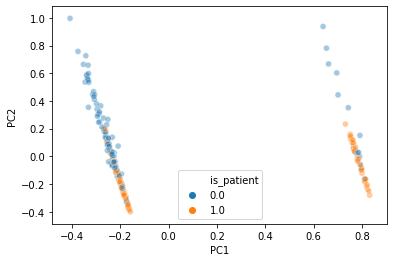

In [433]:
#PCA for ENN Under Sampled Dataset
pca_enn = PCA(n_components=2)
X_pca_enn = pca_enn.fit_transform(X_train_enn)
print(pca_enn.explained_variance_ratio_)
print(pca_enn.explained_variance_ratio_.cumsum())
y_temp_enn = y_train_enn
y_temp_enn["PC1"] = X_pca_enn[:,0]
y_temp_enn["PC2"] = X_pca_enn[:,1]
sns.scatterplot(data=y_temp_enn, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_enn["is_patient"].value_counts())

In [434]:
print(y_train_enn.head())

y_train_enn = y_train_enn.drop(["PC1", "PC2"], axis=1)
print(y_train_enn.head())

     is_patient       PC1       PC2
78          0.0 -0.237062 -0.052460
150         1.0  0.812853 -0.176968
171         1.0 -0.209677 -0.137952
228         1.0 -0.217630 -0.091505
190         1.0 -0.182964 -0.263602
     is_patient
78          0.0
150         1.0
171         1.0
228         1.0
190         1.0


In [435]:
print(y_train_enn.head())

     is_patient
78          0.0
150         1.0
171         1.0
228         1.0
190         1.0


<a id="ninth"></a>

In [436]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On ENN Undersampled Training dataset
print("Naive Bayes on ENN Undersampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Naive Bayes on ENN Undersampled Training datset
print("\nCross Validation of Naive Bayes on ENN Under sampled Training dataset:")
crossValidation(GaussianNB(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on ENN Undersampled Training dataset:

Confusion Matrix: 
[[45 80]
 [ 3 47]]

Accuracy : 0.5257142857142857
Sensitivity : 0.36
Precision: 0.9375
Specificity : 0.94
F-Score : 0.5202312138728323

               precision    recall  f1-score   support

         0.0       0.94      0.36      0.52       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.65      0.65      0.53       175
weighted avg       0.78      0.53      0.52       175
 


Cross Validation of Naive Bayes on ENN Under sampled Training dataset:
[0.85294118 0.74509804 0.59405941 0.61386139] 

0.7014900019413707

----------------------------------------------------------------------



In [437]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On ENN UnderSampled Training dataset
print("SVM Classifier on ENN Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on SVM Classifier on ENN Undersampled Training datset
print("\nCross Validation of SVM Classifier on ENN Undersample Training dataset:")
crossValidation(LinearSVC(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[55 70]
 [ 4 46]]

Accuracy : 0.5771428571428572
Sensitivity : 0.44
Precision: 0.9322033898305084
Specificity : 0.92
F-Score : 0.5978260869565217

               precision    recall  f1-score   support

         0.0       0.93      0.44      0.60       125
         1.0       0.40      0.92      0.55        50

    accuracy                           0.58       175
   macro avg       0.66      0.68      0.58       175
weighted avg       0.78      0.58      0.59       175
 


Cross Validation of SVM Classifier on ENN Undersample Training dataset:
[0.81372549 0.81372549 0.66336634 0.66336634] 

0.738545913414871

----------------------------------------------------------------------



In [438]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On ENN Undersampled Training dataset
print("Logistic Regression Classifier on ENN Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Logistic Regression Classifier on ENN Undersampled Training datset
print("\nCross Validation of Logistic Regression Classifier on ENN Undersample Training dataset:")
crossValidation(LogisticRegression(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[57 68]
 [ 4 46]]

Accuracy : 0.5885714285714285
Sensitivity : 0.456
Precision: 0.9344262295081968
Specificity : 0.92
F-Score : 0.6129032258064516

               precision    recall  f1-score   support

         0.0       0.93      0.46      0.61       125
         1.0       0.40      0.92      0.56        50

    accuracy                           0.59       175
   macro avg       0.67      0.69      0.59       175
weighted avg       0.78      0.59      0.60       175
 


Cross Validation of Logistic Regression Classifier on ENN Undersample Training dataset:
[0.75490196 0.76470588 0.61386139 0.67326733] 

0.7016841390021356

----------------------------------------------------------------------



In [439]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On ENN Undersample Training dataset
print("KNN Classifier on ENN undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on KNN Classifier on ENN Undersampled Training dataset
print("\nCross Validation of KNN Classifier on ENN Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on ENN undersample Training dataset:

Confusion Matrix: 
[[71 54]
 [17 33]]

Accuracy : 0.5942857142857143
Sensitivity : 0.568
Precision: 0.8068181818181818
Specificity : 0.66
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.81      0.57      0.67       125
         1.0       0.38      0.66      0.48        50

    accuracy                           0.59       175
   macro avg       0.59      0.61      0.57       175
weighted avg       0.68      0.59      0.61       175
 


Cross Validation of KNN Classifier on ENN Undersample Training dataset:
[0.74509804 0.70588235 0.6039604  0.67326733] 

0.6820520287322851

----------------------------------------------------------------------



In [440]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On ENN Under Sampled Training dataset
print("Random Forest Classifier on ENN Undersample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Random Forest Classifier on ENN Under sampled Training datset
print("\nCross Validation of Random Forest Classifier on ENN Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[61 64]
 [ 5 45]]

Accuracy : 0.6057142857142858
Sensitivity : 0.488
Precision: 0.9242424242424242
Specificity : 0.9
F-Score : 0.6387434554973821

               precision    recall  f1-score   support

         0.0       0.92      0.49      0.64       125
         1.0       0.41      0.90      0.57        50

    accuracy                           0.61       175
   macro avg       0.67      0.69      0.60       175
weighted avg       0.78      0.61      0.62       175
 


Cross Validation of Random Forest Classifier on ENN Undersample Training dataset:
[0.83333333 0.80392157 0.69306931 0.6039604 ] 

0.7335711512327704

----------------------------------------------------------------------



In [441]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for ENN UnderSampled Training Dataset
print("Voting Classifier on ENN Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Voting Classifier on ENN UnderSampled Training datset
print("\nCross Validation of Voting Classifier on ENN Under sampled Training dataset:")
crossValidation(vclf, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on ENN Under sampled Training dataset:

Confusion Matrix: 
[[60 65]
 [ 5 45]]

Accuracy : 0.6
Sensitivity : 0.48
Precision: 0.9230769230769231
Specificity : 0.9
F-Score : 0.631578947368421

               precision    recall  f1-score   support

         0.0       0.92      0.48      0.63       125
         1.0       0.41      0.90      0.56        50

    accuracy                           0.60       175
   macro avg       0.67      0.69      0.60       175
weighted avg       0.78      0.60      0.61       175
 


Cross Validation of Voting Classifier on ENN Under sampled Training dataset:
[0.81372549 0.80392157 0.69306931 0.65346535] 

0.7410454280722191

----------------------------------------------------------------------



print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On ENN Undersampled Training dataset
print("Naive Bayes on ENN Undersampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Naive Bayes on ENN Undersampled Training datset
print("\nCross Validation of Naive Bayes on ENN Under sampled Training dataset:")
crossValidation(GaussianNB(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On ENN UnderSampled Training dataset
print("SVM Classifier on ENN Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on SVM Classifier on ENN Undersampled Training datset
print("\nCross Validation of SVM Classifier on ENN Undersample Training dataset:")
crossValidation(LinearSVC(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On ENN Undersampled Training dataset
print("Logistic Regression Classifier on ENN Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Logistic Regression Classifier on ENN Undersampled Training datset
print("\nCross Validation of Logistic Regression Classifier on ENN Undersample Training dataset:")
crossValidation(LogisticRegression(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On ENN Undersample Training dataset
print("KNN Classifier on ENN undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on KNN Classifier on ENN Undersampled Training dataset
print("\nCross Validation of KNN Classifier on ENN Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On ENN Under Sampled Training dataset
print("Random Forest Classifier on ENN Undersample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Random Forest Classifier on ENN Under sampled Training datset
print("\nCross Validation of Random Forest Classifier on ENN Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for ENN UnderSampled Training Dataset
print("Voting Classifier on ENN Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Voting Classifier on ENN UnderSampled Training datset
print("\nCross Validation of Voting Classifier on ENN Under sampled Training dataset:")
crossValidation(vclf, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on ENN UnderSampled Training datset

dt_enn = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_enn = AdaBoostClassifier(base_estimator=dt_enn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on ENN UnderSampled Training datset:")
clfFitPredict(adb_clf_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on AdaBoost Classifier on ENN UnderSampled Training datset
print("\nCross Validation of AdaBoost Classifier on ENN UnderSampled Training datset:")
crossValidation(adb_clf_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_enn = SVC(probability=True, kernel='linear')
adb_clf_svc_enn = AdaBoostClassifier(base_estimator=svc_adb_enn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on ENN UnderSampled Training datset:")
clfFitPredict(adb_clf_svc_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on AdaBoostClassifier on ENN UnderSampled Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on ENN UnderSampled Training datset:")
crossValidation(adb_clf_svc_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On ENN UnderSampled Training datset

gbc_enn = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the ENN UnderSampled Training datset:")
clfFitPredict(gbc_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on GradientBoostingClassifier on ENN UnderSampled Training datset
print("\nCross Validation of GradientBoostingClassifier on ENN UnderSampled Training datset:")
crossValidation(gbc_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the ENN UnderSampled Training datset

xgb_clf_enn = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the ENN OverSampled dataset:")
clfFitPredict(xgb_clf_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on XGBClassifier on ENN UnderSampled Training datset
print("\nCross Validation of XGBClassifier on ENN UnderSampled Training datset:")
crossValidation(xgb_clf_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

In [442]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on ENN UnderSampled Training datset

dt_enn = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_enn = AdaBoostClassifier(base_estimator=dt_enn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on ENN UnderSampled Training datset:")
clfFitPredict(adb_clf_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on AdaBoost Classifier on ENN UnderSampled Training datset
print("\nCross Validation of AdaBoost Classifier on ENN UnderSampled Training datset:")
crossValidation(adb_clf_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on ENN UnderSampled Training datset:

Confusion Matrix: 
[[60 65]
 [ 3 47]]

Accuracy : 0.6114285714285714
Sensitivity : 0.48
Precision: 0.9523809523809523
Specificity : 0.94
F-Score : 0.6382978723404255

               precision    recall  f1-score   support

         0.0       0.95      0.48      0.64       125
         1.0       0.42      0.94      0.58        50

    accuracy                           0.61       175
   macro avg       0.69      0.71      0.61       175
weighted avg       0.80      0.61      0.62       175
 


Cross Validation of AdaBoost Classifier on ENN UnderSampled Training datset:
[0.84313725 0.75490196 0.72277228 0.6039604 ] 

0.7311929722384004

----------------------------------------------------------------------



In [443]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_enn = SVC(probability=True, kernel='linear')
adb_clf_svc_enn = AdaBoostClassifier(base_estimator=svc_adb_enn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on ENN UnderSampled Training datset:")
clfFitPredict(adb_clf_svc_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on AdaBoostClassifier on ENN UnderSampled Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on ENN UnderSampled Training datset:")
crossValidation(adb_clf_svc_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on ENN UnderSampled Training datset:

Confusion Matrix: 
[[62 63]
 [ 4 46]]

Accuracy : 0.6171428571428571
Sensitivity : 0.496
Precision: 0.9393939393939394
Specificity : 0.92
F-Score : 0.6492146596858639

               precision    recall  f1-score   support

         0.0       0.94      0.50      0.65       125
         1.0       0.42      0.92      0.58        50

    accuracy                           0.62       175
   macro avg       0.68      0.71      0.61       175
weighted avg       0.79      0.62      0.63       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on ENN UnderSampled Training datset:
[0.76470588 0.71568627 0.63366337 0.68316832] 

0.6993059600077656

----------------------------------------------------------------------



In [444]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On ENN UnderSampled Training datset

gbc_enn = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the ENN UnderSampled Training datset:")
clfFitPredict(gbc_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on GradientBoostingClassifier on ENN UnderSampled Training datset
print("\nCross Validation of GradientBoostingClassifier on ENN UnderSampled Training datset:")
crossValidation(gbc_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------


GradientBoostingClassifier on the ENN UnderSampled Training datset:

Confusion Matrix: 
[[60 65]
 [ 8 42]]

Accuracy : 0.5828571428571429
Sensitivity : 0.48
Precision: 0.8823529411764706
Specificity : 0.84
F-Score : 0.6217616580310881

               precision    recall  f1-score   support

         0.0       0.88      0.48      0.62       125
         1.0       0.39      0.84      0.54        50

    accuracy                           0.58       175
   macro avg       0.64      0.66      0.58       175
weighted avg       0.74      0.58      0.60       175
 


Cross Validation of GradientBoostingClassifier on ENN UnderSampled Training datset:
[0.81372549 0.78431373 0.67326733 0.59405941] 

0.7163414870898855

----------------------------------------------------------------------



In [445]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the ENN UnderSampled Training datset

xgb_clf_enn = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the ENN UnderSampled dataset:")
clfFitPredict(xgb_clf_enn, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on XGBClassifier on ENN UnderSampled Training datset
print("\nCross Validation of XGBClassifier on ENN UnderSampled Training datset:")
crossValidation(xgb_clf_enn, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the ENN UnderSampled dataset:

Confusion Matrix: 
[[ 17 108]
 [  1  49]]

Accuracy : 0.37714285714285717
Sensitivity : 0.136
Precision: 0.9444444444444444
Specificity : 0.98
F-Score : 0.2377622377622378

               precision    recall  f1-score   support

         0.0       0.94      0.14      0.24       125
         1.0       0.31      0.98      0.47        50

    accuracy                           0.38       175
   macro avg       0.63      0.56      0.36       175
weighted avg       0.76      0.38      0.31       175
 


Cross Validation of XGBClassifier on ENN UnderSampled Training datset:
[0.58823529 0.58823529 0.59405941 0.58415842] 

0.5886721025043681

----------------------------------------------------------------------



#Bagging Classifier On the ENN OverSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on ENN OverSampled dataset :")
clfFitPredict(clf_bagging, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Bagging Classifier on ENN OverSampled datset
print("\nCross Validation of Bagging Classifier on ENN OverSampled dataset :")
crossValidation(clf_bagging, X_enn, y_enn, 4)
#X_train_enn, X_test, y_train_enn, y_test
#X_enn, y_enn
print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On ENN OverSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_enn, X_test, y_train_enn, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On ENN OverSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_enn, y_enn, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The ENN OverSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on ENN OverSampled dataset :")
clfFitPredict(clf_percept, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Perceptron on ENN OverSampled datset
print("\nCross Validation of Perceptron on ENN OverSampled dataset :")
crossValidation(clf_percept, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

In [446]:
#Bagging Classifier On the ENN UnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on ENN UnderSampled dataset :")
clfFitPredict(clf_bagging, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Bagging Classifier on ENN UnderSampled datset
print("\nCross Validation of Bagging Classifier on ENN UnderSampled dataset :")
crossValidation(clf_bagging, X_enn, y_enn, 4)
#X_train_enn, X_test, y_train_enn, y_test
#X_enn, y_enn
print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On ENN UnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_enn, X_test, y_train_enn, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On ENN UnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_enn, y_enn, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on ENN UnderSampled dataset :

Confusion Matrix: 
[[68 57]
 [10 40]]

Accuracy : 0.6171428571428571
Sensitivity : 0.544
Precision: 0.8717948717948718
Specificity : 0.8
F-Score : 0.6699507389162562

               precision    recall  f1-score   support

         0.0       0.87      0.54      0.67       125
         1.0       0.41      0.80      0.54        50

    accuracy                           0.62       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.74      0.62      0.63       175
 


Cross Validation of Bagging Classifier on ENN UnderSampled dataset :
[0.73529412 0.79411765 0.66336634 0.67326733] 

0.7165113570180548

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On ENN UnderSampled Dataset

Confusion Matrix: 
[[68 57]
 [10 40]]

Accuracy : 0.6171428571428571
Sensitivity : 0.544
Precision: 0.8717948717948718
Specificity : 0.8
F-Score : 0.669950738

In [447]:
#Perceptron On The ENN UnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on ENN UnderSampled dataset :")
clfFitPredict(clf_percept, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Perceptron on ENN UnderSampled datset
print("\nCross Validation of Perceptron on ENN UnderSampled dataset :")
crossValidation(clf_percept, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on ENN UnderSampled dataset :

Confusion Matrix: 
[[30 95]
 [ 1 49]]

Accuracy : 0.4514285714285714
Sensitivity : 0.24
Precision: 0.967741935483871
Specificity : 0.98
F-Score : 0.38461538461538464

               precision    recall  f1-score   support

         0.0       0.97      0.24      0.38       125
         1.0       0.34      0.98      0.51        50

    accuracy                           0.45       175
   macro avg       0.65      0.61      0.44       175
weighted avg       0.79      0.45      0.42       175
 


Cross Validation of Perceptron on ENN UnderSampled dataset :
[0.81372549 0.58823529 0.63366337 0.55445545] 

0.6475198990487284

----------------------------------------------------------------------



<a id="pca9"></a>

In [448]:
#Classification With PCA with ENN Dataset

pca_enn_1 = PCA()
X_pca_enn_1 = pca_enn_1.fit_transform(X_train_enn)
print(pca_enn_1.explained_variance_ratio_)
print(pca_enn_1.explained_variance_ratio_.cumsum())

pca_enn1 = PCA(n_components=6)
X_pca_train_enn1 = pd.DataFrame(pca_enn1.fit_transform(X_train_enn))
X_pca_test_enn1 = pd.DataFrame(pca_enn1.transform(X_test))

X_pca_enn = pd.concat([X_pca_train_enn1, X_pca_test_enn1], axis=0)
#print(type(X_pca_train_enn1), type(X_pca_test_enn1))

[0.46449406 0.1855652  0.13173475 0.08290068 0.05001515 0.04598093
 0.03327105 0.00285449 0.0018379  0.00134578]
[0.46449406 0.65005927 0.78179401 0.86469469 0.91470984 0.96069077
 0.99396183 0.99681631 0.99865422 1.        ]


In [449]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On ENN Undersampled PCA Training dataset
print("Naive Bayes on ENN Undersampled PCA Training  dataset:")
clfFitPredict(GaussianNB(), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Naive Bayes on ENN Undersampled PCA Training datset
print("\nCross Validation of Naive Bayes on ENN Under sampled PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On ENN UnderSampled PCA Trained dataset
print("SVM Classifier on ENN Undersample PCA Trained dataset:")
clfFitPredict(LinearSVC(), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on SVM Classifier on ENN Undersampled PCA Trained datset
print("\nCross Validation of SVM Classifier on ENN Undersample PCA Trained dataset:")
crossValidation(LinearSVC(), X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On ENN Undersampled PCA Trained dataset
print("Logistic Regression Classifier on ENN Undersample PCA Trained dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Logistic Regression Classifier on ENN Undersampled PCA Trained dataset
print("\nCross Validation of Logistic Regression Classifier on ENN Undersample PCA Trained dataset:")
crossValidation(LogisticRegression(), X_pca_enn, y_enn, 4)


print("\n----------------------------------------------------------------------\n")


#4.1 KNN Classifier On ENN Undersample PCA Trained dataset
print("KNN Classifier on ENN undersample PCA Trained dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on KNN Classifier on ENN Undersampled Training dataset
print("\nCross Validation of KNN Classifier on ENN Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On ENN Under Sampled PCA Trained dataset
print("Random Forest Classifier on ENN Undersample PCA Trained dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Random Forest Classifier on ENN Under sampled Training datset
print("\nCross Validation of Random Forest Classifier on ENN Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for ENN UnderSampled PCA Trained Dataset
print("Voting Classifier on ENN UnderSampled PCA Trained dataset:")
clfFitPredict(vclf, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Voting Classifier on ENN UnderSampled PCA Trained datset
print("\nCross Validation of Voting Classifier on ENN UnderSampled PCA Trained dataset:")
crossValidation(vclf, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on ENN UnderSampled PCA Training datset
print("\nAdaBoostClassifier with Decision Tree as base estimator on ENN UnderSampled PCATraining datset:")
clfFitPredict(adb_clf_enn, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on AdaBoost Classifier on ENN UnderSampled PCA Training datset
print("\nCross Validation of AdaBoost Classifier on ENN UnderSampled PCA Training datset:")
crossValidation(adb_clf_enn, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 
print("\nAdaBoostClassifier with SVC as base estimator on ENN UnderSampled PCA Training datset:")
clfFitPredict(adb_clf_svc_enn, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on AdaBoostClassifier on ENN UnderSampled PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on ENN UnderSampled PCA Training datset:")
crossValidation(adb_clf_svc_enn, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On ENN UnderSampled PCA Training datset
print("\nGradientBoostingClassifier on the ENN UnderSampled PCA Training datset:")
clfFitPredict(gbc_enn, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on GradientBoostingClassifier on ENN UnderSampled PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on ENN UnderSampled PCA Training datset:")
crossValidation(gbc_enn, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the ENN UnderSampled PCA Training datset

print("\nXGBClassifier on the ENN UnderSampled PCA dataset:")
clfFitPredict(xgb_clf_enn, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on XGBClassifier on ENN UnderSampled PCA Training datset
print("\nCross Validation of XGBClassifier on ENN UnderSampled PCA Training datset:")
crossValidation(xgb_clf_enn, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

#Bagging Classifier On the ENN UnderSampled PCA Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on ENN UnderSampled PCA dataset :")
clfFitPredict(clf_bagging, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Bagging Classifier on ENN UnderSampled PCA datset
print("\nCross Validation of Bagging Classifier on ENN UnderSampled PCA dataset :")
crossValidation(clf_bagging, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On ENN UnderSampled PCA Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On ENN UnderSampled PCA Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca_enn, y_enn, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The ENN UnderSampled PCA Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on ENN UnderSampled PCA dataset :")
clfFitPredict(clf_percept, X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test)

#Cross Validation on Perceptron on ENN UnderSampled datset
print("\nCross Validation of Perceptron on ENN UnderSampled PCA dataset :")
crossValidation(clf_percept, X_pca_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on ENN Undersampled PCA Training  dataset:

Confusion Matrix: 
[[44 81]
 [ 6 44]]

Accuracy : 0.5028571428571429
Sensitivity : 0.352
Precision: 0.88
Specificity : 0.88
F-Score : 0.5028571428571428

               precision    recall  f1-score   support

         0.0       0.88      0.35      0.50       125
         1.0       0.35      0.88      0.50        50

    accuracy                           0.50       175
   macro avg       0.62      0.62      0.50       175
weighted avg       0.73      0.50      0.50       175
 


Cross Validation of Naive Bayes on ENN Under sampled PCA Training dataset:
[0.75490196 0.7254902  0.57425743 0.59405941] 

0.6621772471364784

----------------------------------------------------------------------

SVM Classifier on ENN Undersample PCA Trained dataset:

Confusion Matrix: 
[[53 72]
 [ 3 47]]

Accuracy : 0.5714285714285714
Sensitivity : 0.424
Precision: 0.9464285714285

[0.80392157 0.76470588 0.75247525 0.62376238] 

0.7362162686856921

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On ENN UnderSampled PCA Dataset

Confusion Matrix: 
[[64 61]
 [10 40]]

Accuracy : 0.5942857142857143
Sensitivity : 0.512
Precision: 0.8648648648648649
Specificity : 0.8
F-Score : 0.6432160804020101

               precision    recall  f1-score   support

         0.0       0.86      0.51      0.64       125
         1.0       0.40      0.80      0.53        50

    accuracy                           0.59       175
   macro avg       0.63      0.66      0.59       175
weighted avg       0.73      0.59      0.61       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On ENN UnderSampled PCA Dataset
[0.80392157 0.76470588 0.75247525 0.62376238] 

0.7362162686856921

----------------------------------------------------------------------

Bagging Classifier with Pe

<a id="hyper9"></a>

In [450]:
#Hyperparameter Tuning for SVC on ENN UnderSampled Dataset
random_svc_enn = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_svc_enn, "RSCV_SVC_enn.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


['RSCV_SVC_enn.pkl']

In [451]:
print("\nRandomizedSearchCV for SVC with ENN UnderSampled Dataset")
RSCV_SVC_enn_loaded  = joblib.load("RSCV_SVC_enn.pkl")
print("\nBest Parameters :", RSCV_SVC_enn_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_enn_loaded.predict(X_test)))


RandomizedSearchCV for SVC with ENN UnderSampled Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 100}

Best Score : 0.861413043478261

Accuracy Score : 0.6


In [452]:
random_svc_enn_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_enn_pca.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_svc_enn_pca, "RSCV_SVC_enn_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


['RSCV_SVC_enn_pca.pkl']

In [453]:
print("\nRandomizedSearchCV for SVC with ENN UnderSampled PCA Dataset")
RSCV_SVC_enn_pca_loaded  = joblib.load("RSCV_SVC_enn_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_enn_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_enn_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_enn_pca_loaded.predict(X_pca_test_enn1)))


RandomizedSearchCV for SVC with ENN UnderSampled PCA Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 100}

Best Score : 0.8614130434782608

Accuracy Score : 0.5828571428571429


In [454]:
#Hyperparameter Tuning for Logistic Regression On ENN UnderSampled

random_logreg_enn = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_logreg_enn, "RSCV_LR_enn.pkl")

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    4.9s finished


['RSCV_LR_enn.pkl']

In [455]:
print("\nRandomizedSearchCV for LR with ENN UnderSampled Dataset")
RSCV_LR_enn_loaded  = joblib.load("RSCV_LR_enn.pkl")
print("\nBest Parameters :",RSCV_LR_enn_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_enn_loaded.predict(X_test)))


RandomizedSearchCV for LR with ENN UnderSampled Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 50}

Best Score : 0.870108695652174

Accuracy Score : 0.6114285714285714


In [456]:
random_logreg_pca_enn = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_enn.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_logreg_pca_enn, "RSCV_LR_pca_enn.pkl")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['RSCV_LR_pca_enn.pkl']

In [457]:
print("\nRandomizedSearchCV for LR with ENN UnderSampled PCA Dataset")
RSCV_LR_pca_enn_loaded  = joblib.load("RSCV_LR_pca_enn.pkl")
print("\nBest Parameters :", RSCV_LR_pca_enn_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_enn_loaded.predict(X_pca_test_enn1)))



RandomizedSearchCV for LR with ENN UnderSampled PCA Dataset

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.861413043478261

Accuracy Score : 0.6228571428571429


In [458]:
#Hyperparameter Tuning for RandomForest On ENN UnderSampled Dataset

random_rf_enn = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_rf_enn, "RSCV_RF_enn.pkl")

['RSCV_RF_enn.pkl']

In [459]:
print("\nRandomizedSearchCV for RF with ENN UnderSampled Dataset")
RSCV_RF_enn_loaded  = joblib.load("RSCV_RF_enn.pkl")
print("\nBest Parameter :", RSCV_RF_enn_loaded.best_params_)
print("\nBest Score :", RSCV_RF_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_enn_loaded.predict(X_test)))


RandomizedSearchCV for RF with ENN UnderSampled Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 26.0, 'bootstrap': False}

Best Score : 0.8311594202898551

Accuracy Score : 0.6228571428571429


In [460]:
random_rf_pca_enn = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_enn.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_rf_pca_enn, "RSCV_RF_pca_enn.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.1s finished


['RSCV_RF_pca_enn.pkl']

In [461]:
print("\nRandomizedSearchCV for RF on ENN UnderSampled PCA Dataset")
RSCV_RF_pca_enn_loaded  = joblib.load("RSCV_RF_pca_enn.pkl")
print("\nBest Parameter :", RSCV_RF_pca_enn_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_enn_loaded.predict(X_pca_test_enn1)))


RandomizedSearchCV for RF on ENN UnderSampled PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.8050724637681158

Accuracy Score : 0.5828571428571429


In [462]:
#Hyperparameter Tuning for GradientBoostingClassifier On ENN UnderSampled Dataset

clf_gbc_enn = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(clf_gbc_enn,'RSCV_GBC_enn.pkl')

['RSCV_GBC_enn.pkl']

In [463]:
print("\nRandomizedSearchCV for GBC with ENN UnderSampled Dataset")
RSCV_GBC_enn_loaded  = joblib.load("RSCV_GBC_enn.pkl")
print("\nBest Score :", RSCV_GBC_enn_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_enn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_enn_loaded.predict(X_test)))


RandomizedSearchCV for GBC with ENN UnderSampled Dataset

Best Score : 0.844021739130435

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1, 'max_depth': 22.0, 'learning_rate': 0.005}

Accuracy Score : 0.6114285714285714


In [464]:
clf_gbc_pca_enn = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_enn.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(clf_gbc_pca_enn,'RSCV_GBC_pca_enn.pkl')


['RSCV_GBC_pca_enn.pkl']

In [465]:
print("\nRandomizedSearchCV for GBC with ENN UnderSampled PCA Dataset")
RSCV_GBC_pca_enn_loaded  = joblib.load("RSCV_GBC_pca_enn.pkl")
print("\nBest Score :",RSCV_GBC_pca_enn_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_enn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_enn_loaded.predict(X_pca_test_enn1)))


RandomizedSearchCV for GBC with ENN UnderSampled PCA Dataset

Best Score : 0.8402173913043478

Best Parameters : {'n_estimators': 1500, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1, 'max_depth': 22.0, 'learning_rate': 0.005}

Accuracy Score : 0.6057142857142858


In [466]:
#Hyperparameter for AdaBoost Classifier On ENN UnderSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_enn = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_adaboost_enn, "RSCV_ADC_enn.pkl")


['RSCV_ADC_enn.pkl']

In [467]:
print("\nRandomizedSearchCV for ADC with ENN UnderSampled PCA Dataset")
RSCV_ADC_enn_loaded  = joblib.load("RSCV_ADC_enn.pkl")
print("\nBest Score -", RSCV_ADC_enn_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_enn_loaded.best_params_)
print("\nAccuracy Score -", accuracy_score(y_test, RSCV_ADC_enn_loaded.predict(X_test)))


RandomizedSearchCV for ADC with ENN UnderSampled PCA Dataset

Best Score - 0.7195652173913043

Best Parameters - {'n_estimators': 64, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

Accuracy Score - 0.2857142857142857


In [468]:
#Hyperparameter Tuning For AdaBoostClassifier on PCA ENN UnderSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_enn_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_enn_pca.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_adaboost_enn_pca, "RSCV_ADC_enn_pca.pkl")

['RSCV_ADC_enn_pca.pkl']

In [469]:
print("\nRandomizedSearchCV for SVC with ENN UnderSampled PCA Dataset")
RSCV_ADC_enn_pca_loaded  = joblib.load("RSCV_ADC_enn_pca.pkl")
print("\nBest Score -", RSCV_ADC_enn_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_enn_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_enn_pca_loaded.predict(X_pca_test_enn1)))



RandomizedSearchCV for SVC with ENN UnderSampled PCA Dataset

Best Score - 0.7717391304347826

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.2857142857142857


In [470]:
#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_enn = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_adaboost_svc_enn, "RSCV_ADC_svc_enn.pkl")

['RSCV_ADC_svc_enn.pkl']

In [471]:
print("\nRandomizedSearchCV for ADC with SVC on ENN UnderSampled Dataset")
RSCV_ADC_svc_enn_loaded  = joblib.load("RSCV_ADC_svc_enn.pkl")
print("\nBest Score :", RSCV_ADC_svc_enn_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_enn_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC on ENN UnderSampled Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5065217391304347

Accuracy Score : 0.2857142857142857


In [472]:
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_enn = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_enn.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_adaboost_svc_pca_enn, "RSCV_ADC_svc_pca_enn.pkl")

['RSCV_ADC_svc_pca_enn.pkl']

In [473]:
print("\nRandomizedSearchCV for Adaboost with SVC with ENN UnderSampled PCA Dataset")
RSCV_ADC_svc_pca_enn_loaded  = joblib.load("RSCV_ADC_svc_pca_enn.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_enn_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_enn_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_enn_loaded.predict(X_pca_test_enn1)))


RandomizedSearchCV for Adaboost with SVC with ENN UnderSampled PCA Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5065217391304347

Accuracy Score : 0.2857142857142857


#Hyperparameter Tuning for SVC on ENN UnderSampled Dataset
random_svc_enn = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_svc_enn, "RSCV_SVC_enn.pkl")

print("\nRandomizedSearchCV for SVC with ENN UnderSampled Dataset")
RSCV_SVC_enn_loaded  = joblib.load("RSCV_SVC_enn.pkl")
print("\nBest Parameters :", RSCV_SVC_enn_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_enn_loaded.predict(X_test)))

random_svc_enn_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_enn_pca.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_svc_enn_pca, "RSCV_SVC_enn_pca.pkl")

print("\nRandomizedSearchCV for SVC with ENN UnderSampled PCA Dataset")
RSCV_SVC_enn_pca_loaded  = joblib.load("RSCV_SVC_enn_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_enn_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_enn_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_enn_pca_loaded.predict(X_pca_test_enn1)))

#Hyperparameter Tuning for Logistic Regression On ENN UnderSampled

random_logreg_enn = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_logreg_enn, "RSCV_LR_enn.pkl")

print("\nRandomizedSearchCV for LR with ENN UnderSampled Dataset")
RSCV_LR_enn_loaded  = joblib.load("RSCV_LR_enn.pkl")
print("\nBest Parameters :",RSCV_LR_enn_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_enn_loaded.predict(X_test)))

random_logreg_pca_enn = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_enn.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_logreg_pca_enn, "RSCV_LR_pca_enn.pkl")

print("\nRandomizedSearchCV for LR with ENN UnderSampled PCA Dataset")
RSCV_LR_pca_enn_loaded  = joblib.load("RSCV_LR_pca_enn.pkl")
print("\nBest Parameters :", RSCV_LR_pca_enn_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_enn_loaded.predict(X_pca_test_enn1)))


#Hyperparameter Tuning for RandomForest On ENN UnderSampled Dataset

random_rf_enn = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_rf_enn, "RSCV_RF_enn.pkl")

print("\nRandomizedSearchCV for RF with ENN UnderSampled Dataset")
RSCV_RF_enn_loaded  = joblib.load("RSCV_RF_enn.pkl")
print("\nBest Parameter :", RSCV_RF_enn_loaded.best_params_)
print("\nBest Score :", RSCV_RF_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_enn_loaded.predict(X_test)))

random_rf_pca_enn = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_enn.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_rf_pca_enn, "RSCV_RF_pca_enn.pkl")

print("\nRandomizedSearchCV for RF on ENN UnderSampled PCA Dataset")
RSCV_RF_pca_enn_loaded  = joblib.load("RSCV_RF_pca_enn.pkl")
print("\nBest Parameter :", RSCV_RF_pca_enn_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_enn_loaded.predict(X_pca_test_enn1)))


#Hyperparameter Tuning for GradientBoostingClassifier On ENN UnderSampled Dataset

clf_gbc_enn = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(clf_gbc_enn,'RSCV_GBC_enn.pkl')

print("\nRandomizedSearchCV for GBC with ENN UnderSampled Dataset")
RSCV_GBC_enn_loaded  = joblib.load("RSCV_GBC_enn.pkl")
print("\nBest Score :", RSCV_GBC_enn_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_enn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_enn_loaded.predict(X_test)))

clf_gbc_pca_enn = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_enn.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(clf_gbc_pca_enn,'RSCV_GBC_pca_enn.pkl')

print("\nRandomizedSearchCV for GBC with ENN UnderSampled PCA Dataset")
RSCV_GBC_pca_enn_loaded  = joblib.load("RSCV_GBC_pca_enn.pkl")
print("\nBest Score :",RSCV_GBC_pca_enn_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_enn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_enn_loaded.predict(X_pca_test_enn1)))


#Hyperparameter for AdaBoost Classifier On ENN UnderSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_enn = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_adaboost_enn, "RSCV_ADC_enn.pkl")

print("\nRandomizedSearchCV for ADC with ENN UnderSampled PCA Dataset")
RSCV_ADC_enn_loaded  = joblib.load("RSCV_ADC_enn.pkl")
print("\nBest Score -", RSCV_ADC_enn_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_enn_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_enn_loaded.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on PCA ENN UnderSampled Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_enn_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_enn_pca.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_adaboost_enn_pca, "RSCV_ADC_enn_pca.pkl")

print("\nRandomizedSearchCV for SVC with ENN UnderSampled PCA Dataset")
RSCV_ADC_enn_pca_loaded  = joblib.load("RSCV_ADC_enn_pca.pkl")
print("\nBest Score -", RSCV_ADC_enn_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_enn_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_enn_pca_loaded.predict(X_pca_test_enn1)))

#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_enn = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_enn.fit(X_train_enn, y_train_enn.values.ravel())
joblib.dump(random_adaboost_svc_enn, "RSCV_ADC_svc_enn.pkl")

print("\nRandomizedSearchCV for ADC with SVC on ENN UnderSampled Dataset")
RSCV_ADC_svc_enn_loaded  = joblib.load("RSCV_ADC_svc_enn.pkl")
print("\nBest Score :", RSCV_ADC_svc_enn_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_enn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_enn_loaded.predict(X_test)))

#X_train_enn, X_test, y_train_enn, y_test
#X_pca_train_enn1, X_pca_test_enn1, y_train_enn, y_test

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_enn = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_enn.fit(X_pca_train_enn1, y_train_enn.values.ravel())
joblib.dump(random_adaboost_svc_pca_enn, "RSCV_ADC_svc_pca_enn.pkl")

print("\nRandomizedSearchCV for SVC with ENN UnderSampled PCA Dataset")
RSCV_ADC_svc_pca_enn_loaded  = joblib.load("RSCV_ADC_svc_pca_enn.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_enn_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_enn_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_enn_loaded.predict(X_pca_test_enn1)))

<a id="smoteenn"></a>

In [474]:
#OverSampling + UnderSampling
#SMOTEENN 
 
smoteEnn = SMOTEENN(random_state=0)
X_train_smoteEnn, y_train_smoteEnn = smoteEnn.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTEENN Combination Sampling\n")
print(pd.Series(y_train_smoteEnn).value_counts())
X_train_smoteEnn = pd.DataFrame(X_train_smoteEnn)
y_train_smoteEnn = pd.DataFrame(y_train_smoteEnn)
y_train_smoteEnn = y_train_smoteEnn.rename(columns = {0:'is_patient'})


X_temp_smoteEnn = pd.concat([X_train_smoteEnn, y_train_smoteEnn], axis=1)
#shuffling the training dataset
X_temp_smoteEnn = X_temp_smoteEnn.sample(frac=1, random_state=1)
X_train_smoteEnn  = X_temp_smoteEnn.drop(["is_patient"], axis=1)
y_train_smoteEnn  = X_temp_smoteEnn[["is_patient"]]


X_smoteEnn = pd.concat([X_train_smoteEnn, X_test], axis=0)
y_smoteEnn = pd.concat([y_train_smoteEnn, y_test], axis=0)

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTEENN Combination Sampling

1.0    182
0.0    110
dtype: int64


<a id="graph10"></a>

[0.51873889 0.18483937]
[0.51873889 0.70357826]
1.0    182
0.0    110
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


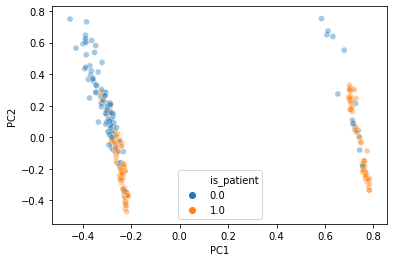

In [535]:
#PCA for SMOTEENN Combination Sampling Dataset
pca_smoteenn = PCA(n_components=2)
X_pca_smoteenn = pca_smoteenn.fit_transform(X_train_smoteEnn)
print(pca_smoteenn.explained_variance_ratio_)
print(pca_smoteenn.explained_variance_ratio_.cumsum())
y_temp_smoteenn = y_train_smoteEnn
y_temp_smoteenn["PC1"] = X_pca_smoteenn[:,0]
y_temp_smoteenn["PC2"] = X_pca_smoteenn[:,1]
sns.scatterplot(data=y_temp_smoteenn, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_smoteenn["is_patient"].value_counts())

In [559]:
print(y_train_smoteEnn.head())
y_train_smoteEnn = y_train_smoteEnn.drop(['PC1', 'PC2'], axis=1)
print(y_train_smoteEnn.head())

     is_patient       PC1       PC2
132         1.0 -0.232828 -0.333678
267         1.0 -0.281533 -0.018705
266         1.0  0.735765  0.033367
62          0.0  0.653135  0.274181
110         1.0 -0.225814 -0.453469
     is_patient
132         1.0
267         1.0
266         1.0
62          0.0
110         1.0


<a id="tenth"></a>

In [475]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTEENN Combined Training dataset
print("Naive Bayes on SMOTEENN Combined Training dataset:")
clfFitPredict(GaussianNB(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Naive Bayes on SMOTEENN Combined Training datset
print("\nCross Validation of Naive Bayes on SMOTEENN Combined Training dataset:")
crossValidation(GaussianNB(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[46 79]
 [ 3 47]]

Accuracy : 0.5314285714285715
Sensitivity : 0.368
Precision: 0.9387755102040817
Specificity : 0.94
F-Score : 0.5287356321839081

               precision    recall  f1-score   support

         0.0       0.94      0.37      0.53       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.66      0.65      0.53       175
weighted avg       0.78      0.53      0.53       175
 


Cross Validation of Naive Bayes on SMOTEENN Combined Training dataset:
[0.87179487 0.82051282 0.65811966 0.67241379] 

0.7557102858826997

----------------------------------------------------------------------



In [476]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTEENN Combined Training dataset
print("SVM Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(LinearSVC(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on SVM Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of SVM Classifier on SMOTEENN Combined Training dataset:")
crossValidation(LinearSVC(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[51 74]
 [ 2 48]]

Accuracy : 0.5657142857142857
Sensitivity : 0.408
Precision: 0.9622641509433962
Specificity : 0.96
F-Score : 0.5730337078651685

               precision    recall  f1-score   support

         0.0       0.96      0.41      0.57       125
         1.0       0.39      0.96      0.56        50

    accuracy                           0.57       175
   macro avg       0.68      0.68      0.57       175
weighted avg       0.80      0.57      0.57       175
 


Cross Validation of SVM Classifier on SMOTEENN Combined Training dataset:
[0.85470085 0.82905983 0.75213675 0.72413793] 

0.7900088417329797

----------------------------------------------------------------------



In [477]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTEENN Combined Training dataset
print("Logistic Regression Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(LogisticRegression(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTEENN Combined Training dataset:")
crossValidation(LogisticRegression(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[51 74]
 [ 3 47]]

Accuracy : 0.56
Sensitivity : 0.408
Precision: 0.9444444444444444
Specificity : 0.94
F-Score : 0.5698324022346368

               precision    recall  f1-score   support

         0.0       0.94      0.41      0.57       125
         1.0       0.39      0.94      0.55        50

    accuracy                           0.56       175
   macro avg       0.67      0.67      0.56       175
weighted avg       0.79      0.56      0.56       175
 


Cross Validation of Logistic Regression Classifier on SMOTEENN Combined Training dataset:
[0.8034188  0.84615385 0.76923077 0.72413793] 

0.7857353374594753

----------------------------------------------------------------------



In [478]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTEENN Combined Training dataset
print("KNN Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on KNN Classifier on SMOTEENN Combined Training dataset
print("\nCross Validation of KNN Classifier on SMOTEENN Combined Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------

KNN Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[70 55]
 [18 32]]

Accuracy : 0.5828571428571429
Sensitivity : 0.56
Precision: 0.7954545454545454
Specificity : 0.64
F-Score : 0.6572769953051644

               precision    recall  f1-score   support

         0.0       0.80      0.56      0.66       125
         1.0       0.37      0.64      0.47        50

    accuracy                           0.58       175
   macro avg       0.58      0.60      0.56       175
weighted avg       0.67      0.58      0.60       175
 


Cross Validation of KNN Classifier on SMOTEENN Combined Training dataset:
[0.91452991 0.8974359  0.76923077 0.60344828] 

0.7961612142646626

----------------------------------------------------------------------



In [479]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTEENN Combined Training dataset
print("Random Forest Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Random Forest Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Random Forest Classifier on SMOTEENN Combined Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[61 64]
 [ 5 45]]

Accuracy : 0.6057142857142858
Sensitivity : 0.488
Precision: 0.9242424242424242
Specificity : 0.9
F-Score : 0.6387434554973821

               precision    recall  f1-score   support

         0.0       0.92      0.49      0.64       125
         1.0       0.41      0.90      0.57        50

    accuracy                           0.61       175
   macro avg       0.67      0.69      0.60       175
weighted avg       0.78      0.61      0.62       175
 


Cross Validation of Random Forest Classifier on SMOTEENN Combined Training dataset:
[0.87179487 0.82905983 0.74358974 0.63793103] 

0.7705938697318009

----------------------------------------------------------------------



In [480]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTEENN Combined Training Dataset
print("Voting Classifier on SMOTEENN Combined Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Voting Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Voting Classifier on SMOTEENN Combined Training dataset:")
crossValidation(vclf, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------

Voting Classifier on SMOTEENN Combined Training dataset:

Confusion Matrix: 
[[56 69]
 [ 4 46]]

Accuracy : 0.5828571428571429
Sensitivity : 0.448
Precision: 0.9333333333333333
Specificity : 0.92
F-Score : 0.6054054054054054

               precision    recall  f1-score   support

         0.0       0.93      0.45      0.61       125
         1.0       0.40      0.92      0.56        50

    accuracy                           0.58       175
   macro avg       0.67      0.68      0.58       175
weighted avg       0.78      0.58      0.59       175
 


Cross Validation of Voting Classifier on SMOTEENN Combined Training dataset:
[0.87179487 0.85470085 0.77777778 0.71551724] 

0.8049476864132037

----------------------------------------------------------------------



In [481]:
print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTEENN Combined Training datset

dt_smoteEnn = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_smoteEnn = AdaBoostClassifier(base_estimator=dt_smoteEnn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTEENN Combined Training datset:")
clfFitPredict(adb_clf_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoost Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTEENN Combined Training datset:")
crossValidation(adb_clf_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------


AdaBoostClassifier with Decision Tree as base estimator on SMOTEENN Combined Training datset:

Confusion Matrix: 
[[50 75]
 [ 5 45]]

Accuracy : 0.5428571428571428
Sensitivity : 0.4
Precision: 0.9090909090909091
Specificity : 0.9
F-Score : 0.5555555555555556

               precision    recall  f1-score   support

         0.0       0.91      0.40      0.56       125
         1.0       0.38      0.90      0.53        50

    accuracy                           0.54       175
   macro avg       0.64      0.65      0.54       175
weighted avg       0.76      0.54      0.55       175
 


Cross Validation of AdaBoost Classifier on SMOTEENN Combined Training datset:
[0.88034188 0.83760684 0.72649573 0.6637931 ] 

0.7770593869731801

----------------------------------------------------------------------



In [482]:
print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_smoteEnn = SVC(probability=True, kernel='linear')
adb_clf_svc_smoteEnn = AdaBoostClassifier(base_estimator=svc_adb_smoteEnn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on SMOTEENN Combined Training datset:")
clfFitPredict(adb_clf_svc_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoostClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTEENN Combined Training datset:")
crossValidation(adb_clf_svc_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on SMOTEENN Combined Training datset:

Confusion Matrix: 
[[36 89]
 [ 1 49]]

Accuracy : 0.4857142857142857
Sensitivity : 0.288
Precision: 0.972972972972973
Specificity : 0.98
F-Score : 0.4444444444444444

               precision    recall  f1-score   support

         0.0       0.97      0.29      0.44       125
         1.0       0.36      0.98      0.52        50

    accuracy                           0.49       175
   macro avg       0.66      0.63      0.48       175
weighted avg       0.80      0.49      0.47       175
 


Cross Validation of AdaBoostClassifier with SVM as base estimator on SMOTEENN Combined Training datset:
[0.81196581 0.81196581 0.71794872 0.73275862] 

0.7686597406424993

----------------------------------------------------------------------



In [483]:
print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTEENN Combined Training datset

gbc_smoteEnn = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the SMOTEENN Combined Training datset:")
clfFitPredict(gbc_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTEENN Combined Training datset:")
crossValidation(gbc_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")



----------------------------------------------------------------------


GradientBoostingClassifier on the SMOTEENN Combined Training datset:

Confusion Matrix: 
[[59 66]
 [ 8 42]]

Accuracy : 0.5771428571428572
Sensitivity : 0.472
Precision: 0.8805970149253731
Specificity : 0.84
F-Score : 0.6145833333333333

               precision    recall  f1-score   support

         0.0       0.88      0.47      0.61       125
         1.0       0.39      0.84      0.53        50

    accuracy                           0.58       175
   macro avg       0.63      0.66      0.57       175
weighted avg       0.74      0.58      0.59       175
 


Cross Validation of GradientBoostingClassifier on SMOTEENN Combined Training datset:
[0.86324786 0.81196581 0.76923077 0.64655172] 

0.7727490421455939

----------------------------------------------------------------------



In [484]:
print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTEENN Combined Training datset

xgb_clf_smoteEnn = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the ENN OverSampled dataset:")
clfFitPredict(xgb_clf_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on XGBClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of XGBClassifier on SMOTEENN Combined Training datset:")
crossValidation(xgb_clf_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------


XGBClassifier on the ENN OverSampled dataset:

Confusion Matrix: 
[[  0 125]
 [  0  50]]

Accuracy : 0.2857142857142857
Sensitivity : 0.0
Precision: nan
Specificity : 1.0
F-Score : nan

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       125
         1.0       0.29      1.00      0.44        50

    accuracy                           0.29       175
   macro avg       0.14      0.50      0.22       175
weighted avg       0.08      0.29      0.13       175
 


Cross Validation of XGBClassifier on SMOTEENN Combined Training datset:
[0.76068376 0.67521368 0.63247863 0.61206897] 

0.6701112584733273

----------------------------------------------------------------------



/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Bagging Classifier On the SMOTEENN UnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on SMOTEENN dataset :")
clfFitPredict(clf_bagging, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Bagging Classifier on SMOTEENN datset
print("\nCross Validation of Bagging Classifier on SMOTEENN dataset :")
crossValidation(clf_bagging, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")
#X_train_smoteEnn, X_test, y_train_smoteEnn, y_test
#X_smoteEnn, y_smoteEnn
base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On SMOTEENN Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On SMOTEENN Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_smoteEnn, y_smoteEnn, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The SMOTEENN Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on SMOTEENN dataset :")
clfFitPredict(clf_percept, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Perceptron on SMOTEENN datset
print("\nCross Validation of Perceptron on SMOTEENN dataset :")
crossValidation(clf_percept, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

In [485]:
#Bagging Classifier On the SMOTEENN UnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on SMOTEENN dataset :")
clfFitPredict(clf_bagging, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Bagging Classifier on SMOTEENN datset
print("\nCross Validation of Bagging Classifier on SMOTEENN dataset :")
crossValidation(clf_bagging, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")
#X_train_smoteEnn, X_test, y_train_smoteEnn, y_test
#X_smoteEnn, y_smoteEnn
base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On SMOTEENN Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On SMOTEENN Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_smoteEnn, y_smoteEnn, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on SMOTEENN dataset :

Confusion Matrix: 
[[69 56]
 [15 35]]

Accuracy : 0.5942857142857143
Sensitivity : 0.552
Precision: 0.8214285714285714
Specificity : 0.7
F-Score : 0.6602870813397129

               precision    recall  f1-score   support

         0.0       0.82      0.55      0.66       125
         1.0       0.38      0.70      0.50        50

    accuracy                           0.59       175
   macro avg       0.60      0.63      0.58       175
weighted avg       0.70      0.59      0.61       175
 


Cross Validation of Bagging Classifier on SMOTEENN dataset :
[0.84615385 0.81196581 0.79487179 0.60344828] 

0.7641099322133804

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On SMOTEENN Dataset

Confusion Matrix: 
[[69 56]
 [15 35]]

Accuracy : 0.5942857142857143
Sensitivity : 0.552
Precision: 0.8214285714285714
Specificity : 0.7
F-Score : 0.6602870813397129

               

In [486]:
#Perceptron On The SMOTEENN Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on SMOTEENN dataset :")
clfFitPredict(clf_percept, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Perceptron on SMOTEENN datset
print("\nCross Validation of Perceptron on SMOTEENN dataset :")
crossValidation(clf_percept, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on SMOTEENN dataset :

Confusion Matrix: 
[[65 60]
 [ 8 42]]

Accuracy : 0.6114285714285714
Sensitivity : 0.52
Precision: 0.8904109589041096
Specificity : 0.84
F-Score : 0.6565656565656566

               precision    recall  f1-score   support

         0.0       0.89      0.52      0.66       125
         1.0       0.41      0.84      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.68      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of Perceptron on SMOTEENN dataset :
[0.74358974 0.78632479 0.55555556 0.71551724] 

0.7002468317123489

----------------------------------------------------------------------



print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTEENN Combined Training dataset
print("Naive Bayes on SMOTEENN Combined Training dataset:")
clfFitPredict(GaussianNB(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Naive Bayes on SMOTEENN Combined Training datset
print("\nCross Validation of Naive Bayes on SMOTEENN Combined Training dataset:")
crossValidation(GaussianNB(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTEENN Combined Training dataset
print("SVM Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(LinearSVC(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on SVM Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of SVM Classifier on SMOTEENN Combined Training dataset:")
crossValidation(LinearSVC(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTEENN Combined Training dataset
print("Logistic Regression Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(LogisticRegression(), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTEENN Combined Training dataset:")
crossValidation(LogisticRegression(), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTEENN Combined Training dataset
print("KNN Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on KNN Classifier on SMOTEENN Combined Training dataset
print("\nCross Validation of KNN Classifier on SMOTEENN Combined Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTEENN Combined Training dataset
print("Random Forest Classifier on SMOTEENN Combined Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Random Forest Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Random Forest Classifier on SMOTEENN Combined Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTEENN Combined Training Dataset
print("Voting Classifier on SMOTEENN Combined Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on Voting Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of Voting Classifier on SMOTEENN Combined Training dataset:")
crossValidation(vclf, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTEENN Combined Training datset

dt_smoteEnn = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_smoteEnn = AdaBoostClassifier(base_estimator=dt_smoteEnn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTEENN Combined Training datset:")
clfFitPredict(adb_clf_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoost Classifier on SMOTEENN Combined Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTEENN Combined Training datset:")
crossValidation(adb_clf_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_smoteEnn = SVC(probability=True, kernel='linear')
adb_clf_svc_smoteEnn = AdaBoostClassifier(base_estimator=svc_adb_smoteEnn, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on SMOTEENN Combined Training datset:")
clfFitPredict(adb_clf_svc_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoostClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTEENN Combined Training datset:")
crossValidation(adb_clf_svc_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTEENN Combined Training datset

gbc_smoteEnn = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the SMOTEENN Combined Training datset:")
clfFitPredict(gbc_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTEENN Combined Training datset:")
crossValidation(gbc_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTEENN Combined Training datset

xgb_clf_smoteEnn = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the ENN OverSampled dataset:")
clfFitPredict(xgb_clf_smoteEnn, X_train_smoteEnn, X_test, y_train_smoteEnn, y_test)

#Cross Validation on XGBClassifier on SMOTEENN Combined Training datset
print("\nCross Validation of XGBClassifier on SMOTEENN Combined Training datset:")
crossValidation(xgb_clf_smoteEnn, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#Bagging Classifier On the UnderSampled Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on UnderSampled dataset :")
clfFitPredict(clf_bagging, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Bagging Classifier on UnderSampled datset
print("\nCross Validation of Bagging Classifier on UnderSampled dataset :")
crossValidation(clf_bagging, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On UnderSampled Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_under, X_test, y_train_under, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On UnderSampled Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_under, y_under, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The UnderSampled Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on UnderSampled dataset :")
clfFitPredict(clf_percept, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Perceptron on UnderSampled datset
print("\nCross Validation of Perceptron on UnderSampled dataset :")
crossValidation(clf_percept, X_under, y_under, 4)

print("\n----------------------------------------------------------------------\n")

<a id="pca10"></a>

In [487]:
#Classification With PCA with SMOTEENN Dataset

pca_smoteEnn_1 = PCA()
X_pca_smoteEnn_1 = pca_smoteEnn_1.fit_transform(X_train_smoteEnn)
print(pca_smoteEnn_1.explained_variance_ratio_)
print(pca_smoteEnn_1.explained_variance_ratio_.cumsum())

pca_smoteEnn1 = PCA(n_components=6)
X_pca_train_smoteEnn1 = pd.DataFrame(pca_smoteEnn1.fit_transform(X_train_smoteEnn))
X_pca_test_smoteEnn1 = pd.DataFrame(pca_smoteEnn1.transform(X_test))

X_pca_smoteEnn = pd.concat([X_pca_train_smoteEnn1, X_pca_test_smoteEnn1], axis=0)
#print(type(X_pca_train_enn1), type(X_pca_test_enn1))

[0.51873889 0.18483937 0.11508746 0.07150545 0.04128101 0.03626424
 0.02746602 0.00229828 0.00145974 0.00105953]
[0.51873889 0.70357826 0.81866573 0.89017118 0.93145219 0.96771643
 0.99518245 0.99748073 0.99894047 1.        ]


In [488]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTEENN PCA Training dataset
print("Naive Bayes on SMOTEENN PCA Training  dataset:")
clfFitPredict(GaussianNB(), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Naive Bayes on SMOTEENN PCA Training datset
print("\nCross Validation of Naive Bayes on SMOTEENN PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTEENN PCA Trained dataset
print("SVM Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(LinearSVC(), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on SVM Classifier on SMOTEENN PCA Trained datset
print("\nCross Validation of SVM Classifier on SMOTEENN PCA Trained dataset:")
crossValidation(LinearSVC(), X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTEENN PCA Trained dataset
print("Logistic Regression Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTEENN PCA Trained dataset
print("\nCross Validation of Logistic Regression Classifier on SMOTEENN PCA Trained dataset:")
crossValidation(LogisticRegression(), X_pca_smoteEnn, y_smoteEnn, 4)


print("\n----------------------------------------------------------------------\n")


#4.1 KNN Classifier On SMOTEENN PCA Trained dataset
print("KNN Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on KNN Classifier on SMOTEENN Training dataset
print("\nCross Validation of KNN Classifier on SMOTEENN Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTEENN PCA Trained dataset
print("Random Forest Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Random Forest Classifier on SMOTEENN Training datset
print("\nCross Validation of Random Forest Classifier on SMOTEENN Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTEENN PCA Trained Dataset
print("Voting Classifier on SMOTEENN PCA Trained dataset:")
clfFitPredict(vclf, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Voting Classifier on SMOTEENN PCA Trained datset
print("\nCross Validation of Voting Classifier on SMOTEENN PCA Trained dataset:")
crossValidation(vclf, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTEENN PCA Training datset
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTEENN PCATraining datset:")
clfFitPredict(adb_clf_smoteEnn, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

# Cross Validation on AdaBoost Classifier on SMOTEENN PCA Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTEENN PCA Training datset:")
crossValidation(adb_clf_smoteEnn, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 
print("\nAdaBoostClassifier with SVC as base estimator on SMOTEENN PCA Training datset:")
clfFitPredict(adb_clf_svc_smoteEnn, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on AdaBoostClassifier on SMOTEENN PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTEENN PCA Training datset:")
crossValidation(adb_clf_svc_smoteEnn, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTEENN PCA Training datset
print("\nGradientBoostingClassifier on the SMOTEENN PCA Training datset:")
clfFitPredict(gbc_smoteEnn, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTEENN PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTEENN PCA Training datset:")
crossValidation(gbc_smoteEnn, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTEENN PCA Training datset

print("\nXGBClassifier on the SMOTEENN PCA dataset:")
clfFitPredict(xgb_clf_smoteEnn, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on XGBClassifier on SMOTEENN PCA Training datset
print("\nCross Validation of XGBClassifier on SMOTEENN PCA Training datset:")
crossValidation(xgb_clf_smoteEnn, X_pca_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")
#Bagging Classifier On the SMOTEENN  PCA Training Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on SMOTEENN PCA Training dataset :")
clfFitPredict(clf_bagging, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Bagging Classifier on SMOTEENN  PCA Training dataset
print("\nCross Validation of Bagging Classifier on SMOTEENN  PCA Training dataset :")
crossValidation(clf_bagging, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")
#X_train_smoteEnn, X_test, y_train_smoteEnn, y_test
#X_smoteEnn, y_smoteEnn
base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On SMOTEENN  PCA Training Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On SMOTEENN  PCA Training Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_smoteEnn, y_smoteEnn, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The SMOTEENN  PCA Training Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on SMOTEENN  PCA Training dataset :")
clfFitPredict(clf_percept, X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test)

#Cross Validation on Perceptron on SMOTEENN  PCA Training dataset
print("\nCross Validation of Perceptron on SMOTEENN  PCA Training dataset :")
crossValidation(clf_percept, X_smoteEnn, y_smoteEnn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTEENN PCA Training  dataset:

Confusion Matrix: 
[[49 76]
 [ 9 41]]

Accuracy : 0.5142857142857142
Sensitivity : 0.392
Precision: 0.8448275862068966
Specificity : 0.82
F-Score : 0.53551912568306

               precision    recall  f1-score   support

         0.0       0.84      0.39      0.54       125
         1.0       0.35      0.82      0.49        50

    accuracy                           0.51       175
   macro avg       0.60      0.61      0.51       175
weighted avg       0.70      0.51      0.52       175
 


Cross Validation of Naive Bayes on SMOTEENN PCA Training dataset:
[0.74358974 0.79487179 0.66666667 0.5862069 ] 

0.6978337754199823

----------------------------------------------------------------------

SVM Classifier on SMOTEENN PCA Trained dataset:

Confusion Matrix: 
[[50 75]
 [ 1 49]]

Accuracy : 0.5657142857142857
Sensitivity : 0.4
Precision: 0.9803921568627451
Specificit

/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.84615385 0.81196581 0.79487179 0.60344828] 

0.7641099322133804

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On SMOTEENN  PCA Training Dataset

Confusion Matrix: 
[[76 49]
 [17 33]]

Accuracy : 0.6228571428571429
Sensitivity : 0.608
Precision: 0.8172043010752689
Specificity : 0.66
F-Score : 0.6972477064220183

               precision    recall  f1-score   support

         0.0       0.82      0.61      0.70       125
         1.0       0.40      0.66      0.50        50

    accuracy                           0.62       175
   macro avg       0.61      0.63      0.60       175
weighted avg       0.70      0.62      0.64       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On SMOTEENN  PCA Training Dataset
[0.84615385 0.81196581 0.79487179 0.60344828] 

0.7641099322133804

----------------------------------------------------------------------

Bagging Classifier wi

<a id="hyper10"></a>

In [489]:
#Hyperparameter Tuning for SVC on SMOTEENN Combination Dataset
random_svc_smoteEnn = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_svc_smoteEnn, "RSCV_SVC_smoteEnn.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


['RSCV_SVC_smoteEnn.pkl']

In [490]:
print("\nRandomizedSearchCV for SVC with SMOTEENN Combination Dataset")
RSCV_SVC_smoteEnn_loaded  = joblib.load("RSCV_SVC_smoteEnn.pkl")
print("\nBest Parameters :", RSCV_SVC_smoteEnn_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_smoteEnn_loaded.predict(X_test)))



RandomizedSearchCV for SVC with SMOTEENN Combination Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score : 0.883448275862069

Accuracy Score : 0.5885714285714285


In [491]:
random_svc_smoteEnn_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_smoteEnn_pca.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_svc_smoteEnn_pca, "RSCV_SVC_smoteEnn_pca.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_SVC_smoteEnn_pca.pkl']

In [492]:
print("\nRandomizedSearchCV for SVC with SMOTEENN Combination PCA Dataset")
RSCV_SVC_smoteEnn_pca_loaded  = joblib.load("RSCV_SVC_smoteEnn_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_smoteEnn_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_smoteEnn_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_smoteEnn_pca_loaded.predict(X_pca_test_smoteEnn1)))



RandomizedSearchCV for SVC with SMOTEENN Combination PCA Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score : 0.8936781609195401

Accuracy Score : 0.5942857142857143


In [493]:
#Hyperparameter Tuning for Logistic Regression On SMOTEENN Combination

random_logreg_smoteEnn = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_logreg_smoteEnn, "RSCV_LR_smoteEnn.pkl")

/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    4.8s finished


['RSCV_LR_smoteEnn.pkl']

In [494]:
print("\nRandomizedSearchCV for LR with SMOTEENN Dataset")
RSCV_LR_smoteEnn_loaded  = joblib.load("RSCV_LR_smoteEnn.pkl")
print("\nBest Parameters :",RSCV_LR_smoteEnn_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_smoteEnn_loaded.predict(X_test)))



RandomizedSearchCV for LR with SMOTEENN Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l1', 'C': 500}

Best Score : 0.900574712643678

Accuracy Score : 0.5771428571428572


In [495]:
random_logreg_pca_smoteEnn = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_smoteEnn.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_logreg_pca_smoteEnn, "RSCV_LR_pca_smoteEnn.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_LR_pca_smoteEnn.pkl']

In [496]:
print("\nRandomizedSearchCV for LR with SMOTEENN PCA Dataset")
RSCV_LR_pca_smoteEnn_loaded  = joblib.load("RSCV_LR_pca_enn.pkl")
print("\nBest Parameters :", RSCV_LR_pca_smoteEnn_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_smoteEnn_loaded.predict(X_pca_test_smoteEnn1)))



RandomizedSearchCV for LR with SMOTEENN PCA Dataset

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.861413043478261

Accuracy Score : 0.6914285714285714


In [560]:
#Hyperparameter Tuning for RandomForest On SMOTEENN Dataset

random_rf_smoteEnn = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_rf_smoteEnn, "RSCV_RF_smoteEnn.pkl")

['RSCV_RF_smoteEnn.pkl']

In [498]:
print("\nRandomizedSearchCV for RF with SMOTEENN Dataset")
RSCV_RF_smoteEnn_loaded  = joblib.load("RSCV_RF_smoteEnn.pkl")
print("\nBest Parameter :", RSCV_RF_smoteEnn_loaded.best_params_)
print("\nBest Score :", RSCV_RF_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_smoteEnn_loaded.predict(X_test)))



RandomizedSearchCV for RF with SMOTEENN Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 26.0, 'bootstrap': False}

Best Score : 0.866551724137931

Accuracy Score : 0.5942857142857143


In [499]:
random_rf_pca_smoteEnn = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_smoteEnn.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_rf_pca_smoteEnn, "RSCV_RF_pca_smoteEnn.pkl")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.3s finished


['RSCV_RF_pca_smoteEnn.pkl']

In [500]:
print("\nRandomizedSearchCV for RF on SMOTEENN PCA Dataset")
RSCV_RF_pca_smoteEnn_loaded  = joblib.load("RSCV_RF_pca_smoteEnn.pkl")
print("\nBest Parameter :", RSCV_RF_pca_smoteEnn_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_smoteEnn_loaded.predict(X_pca_test_smoteEnn1)))



RandomizedSearchCV for RF on SMOTEENN PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.8632183908045977

Accuracy Score : 0.6114285714285714


In [501]:
#Hyperparameter Tuning for GradientBoostingClassifier On SMOTEENN Dataset

clf_gbc_smoteEnn = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(clf_gbc_smoteEnn,'RSCV_GBC_smoteEnn.pkl')

['RSCV_GBC_smoteEnn.pkl']

In [502]:
print("\nRandomizedSearchCV for GBC with SMOTEENN Dataset")
RSCV_GBC_smoteEnn_loaded  = joblib.load("RSCV_GBC_smoteEnn.pkl")
print("\nBest Score :", RSCV_GBC_smoteEnn_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_smoteEnn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_smoteEnn_loaded.predict(X_test)))


RandomizedSearchCV for GBC with SMOTEENN Dataset

Best Score : 0.8937931034482759

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.5885714285714285


In [503]:
clf_gbc_pca_smoteEnn = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_smoteEnn.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(clf_gbc_pca_smoteEnn,'RSCV_GBC_pca_smoteEnn.pkl')

['RSCV_GBC_pca_smoteEnn.pkl']

In [504]:
print("\nRandomizedSearchCV for GBC with SMOTEENN PCA Dataset")
RSCV_GBC_pca_smoteEnn_loaded  = joblib.load("RSCV_GBC_pca_smoteEnn.pkl")
print("\nBest Score :",RSCV_GBC_pca_smoteEnn_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_smoteEnn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_smoteEnn_loaded.predict(X_pca_test_smoteEnn1)))



RandomizedSearchCV for GBC with SMOTEENN PCA Dataset

Best Score : 0.9210344827586207

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.6457142857142857


In [505]:
#Hyperparameter for AdaBoost Classifier On SMOTEENN Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_smoteEnn = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_adaboost_smoteEnn, "RSCV_ADC_smoteEnn.pkl")

['RSCV_ADC_smoteEnn.pkl']

In [506]:
print("\nRandomizedSearchCV for ADC with SMOTEENN PCA Dataset")
RSCV_ADC_smoteEnn_loaded  = joblib.load("RSCV_ADC_smoteEnn.pkl")
print("\nBest Score -", RSCV_ADC_smoteEnn_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_smoteEnn_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_smoteEnn_loaded.predict(X_test)))



RandomizedSearchCV for ADC with SMOTEENN PCA Dataset

Best Score - 0.6598850574712645

Best Parameters - {'n_estimators': 16, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

 Accuracy Score - 0.5828571428571429


In [507]:
#Hyperparameter Tuning For AdaBoostClassifier on SMOTEENN PCA Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_smoteEnn_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_smoteEnn_pca.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_adaboost_smoteEnn_pca, "RSCV_ADC_smoteEnn_pca.pkl")

['RSCV_ADC_smoteEnn_pca.pkl']

In [508]:
print("\nRandomizedSearchCV for ADC with SMOTEENN PCA Dataset")
RSCV_ADC_smoteEnn_pca_loaded  = joblib.load("RSCV_ADC_smoteEnn_pca.pkl")
print("\nBest Score -", RSCV_ADC_smoteEnn_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_smoteEnn_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_smoteEnn_pca_loaded.predict(X_pca_test_smoteEnn1)))


RandomizedSearchCV for ADC with SMOTEENN PCA Dataset

Best Score - 0.6565517241379311

Best Parameters - {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

 Accuracy Score - 0.6457142857142857


In [509]:
#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 
svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_smoteEnn = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_adaboost_svc_smoteEnn, "RSCV_ADC_svc_smoteEnn.pkl")

['RSCV_ADC_svc_smoteEnn.pkl']

In [510]:
print("\nRandomizedSearchCV for ADC with SVC on SMOTEENN Dataset")
RSCV_ADC_svc_smoteEnn_loaded  = joblib.load("RSCV_ADC_svc_smoteEnn.pkl")
print("\nBest Score :", RSCV_ADC_svc_smoteEnn_loaded.best_score_)
print("\nBest Parameter :", RSCV_ADC_svc_smoteEnn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_smoteEnn_loaded.predict(X_test)))



RandomizedSearchCV for ADC with SVC on SMOTEENN Dataset

Best Score : 0.6232183908045977

Best Parameter : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Accuracy Score : 0.2857142857142857


In [511]:
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_smoteEnn = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_smoteEnn.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_adaboost_svc_pca_smoteEnn, "RSCV_ADC_svc_pca_smoteEnn.pkl")


['RSCV_ADC_svc_pca_smoteEnn.pkl']

In [512]:
print("\nRandomizedSearchCV for Adaboost with SVC with SMOTEENN PCA Dataset")
RSCV_ADC_svc_pca_smoteEnn_loaded  = joblib.load("RSCV_ADC_svc_pca_smoteEnn.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_smoteEnn_loaded.best_score_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_smoteEnn_loaded.best_params_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_smoteEnn_loaded.predict(X_pca_test_enn1)))


RandomizedSearchCV for Adaboost with SVC with SMOTEENN PCA Dataset

Best Score : 0.6232183908045977

Best Parameter : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Accuracy Score : 0.2857142857142857


#Hyperparameter Tuning for SVC on SMOTEENN Combination Dataset
random_svc_smoteEnn = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_svc_smoteEnn, "RSCV_SVC_smoteEnn.pkl")

print("\nRandomizedSearchCV for SVC with SMOTEENN Combination Dataset")
RSCV_SVC_smoteEnn_loaded  = joblib.load("RSCV_SVC_smoteEnn.pkl")
print("\nBest Parameters :", RSCV_SVC_smoteEnn_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_smoteEnn_loaded.predict(X_test)))

random_svc_smoteEnn_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_smoteEnn_pca.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_svc_smoteEnn_pca, "RSCV_SVC_smoteEnn_pca.pkl")

print("\nRandomizedSearchCV for SVC with SMOTEENN Combination PCA Dataset")
RSCV_SVC_smoteEnn_pca_loaded  = joblib.load("RSCV_SVC_smoteEnn_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_smoteEnn_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_smoteEnn_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_smoteEnn_pca_loaded.predict(X_pca_test_smoteEnn1)))

#Hyperparameter Tuning for Logistic Regression On SMOTEENN Combination

random_logreg_smoteEnn = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_logreg_smoteEnn, "RSCV_LR_smoteEnn.pkl")

print("\nRandomizedSearchCV for LR with SMOTEENN Dataset")
RSCV_LR_smoteEnn_loaded  = joblib.load("RSCV_LR_smoteEnn.pkl")
print("\nBest Parameters :",RSCV_LR_smoteEnn_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_smoteEnn_loaded.predict(X_test)))

random_logreg_pca_smoteEnn = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_smoteEnn.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_logreg_pca_smoteEnn, "RSCV_LR_pca_smoteEnn.pkl")

print("\nRandomizedSearchCV for LR with SMOTEENN PCA Dataset")
RSCV_LR_pca_smoteEnn_loaded  = joblib.load("RSCV_LR_pca_enn.pkl")
print("\nBest Parameters :", RSCV_LR_pca_smoteEnn_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_smoteEnn_loaded.predict(X_pca_test_smoteEnn1)))


#Hyperparameter Tuning for RandomForest On SMOTEENN Dataset

random_rf_smoteEnn = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_rf_smoteEnn, "RSCV_RF_smoteEnn.pkl")

print("\nRandomizedSearchCV for RF with SMOTEENN Dataset")
RSCV_RF_smoteEnn_loaded  = joblib.load("RSCV_RF_smoteEnn.pkl")
print("\nBest Parameter :", RSCV_RF_smoteEnn_loaded.best_params_)
print("\nBest Score :", RSCV_RF_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_smoteEnn_loaded.predict(X_test)))

random_rf_pca_smoteEnn = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_smoteEnn.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_rf_pca_smoteEnn, "RSCV_RF_pca_smoteEnn.pkl")

print("\nRandomizedSearchCV for RF on SMOTEENN PCA Dataset")
RSCV_RF_pca_smoteEnn_loaded  = joblib.load("RSCV_RF_pca_smoteEnn.pkl")
print("\nBest Parameter :", RSCV_RF_pca_smoteEnn_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_smoteEnn_loaded.predict(X_pca_test_smoteEnn1)))


#Hyperparameter Tuning for GradientBoostingClassifier On SMOTEENN Dataset

clf_gbc_smoteEnn = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(clf_gbc_smoteEnn,'RSCV_GBC_smoteEnn.pkl')

print("\nRandomizedSearchCV for GBC with SMOTEENN Dataset")
RSCV_GBC_smoteENN_loaded  = joblib.load("RSCV_GBC_smoteEnn.pkl")
print("\nBest Score :", RSCV_GBC_smoteEnn_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_smoteEnn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_smoteEnn_loaded.predict(X_test)))

clf_gbc_pca_smoteEnn = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_smoteEnn.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(clf_gbc_pca_smoteEnn,'RSCV_GBC_pca_smoteEnn.pkl')

print("\nRandomizedSearchCV for GBC with SMOTEENN PCA Dataset")
RSCV_GBC_pca_smoteEnn_loaded  = joblib.load("RSCV_GBC_pca_smoteEnn.pkl")
print("\nBest Score :",RSCV_GBC_pca_smoteEnn_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_smoteEnn_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_smoteEnn_loaded.predict(X_pca_test_smoteEnn1)))


#Hyperparameter for AdaBoost Classifier On SMOTEENN Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_smoteEnn = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_adaboost_smoteEnn, "RSCV_ADC_smoteEnn.pkl")

print("\nRandomizedSearchCV for ADC with SMOTEENN PCA Dataset")
RSCV_ADC_smoteEnn_loaded  = joblib.load("RSCV_ADC_smoteEnn.pkl")
print("\nBest Score -", RSCV_ADC_smoteEnn_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_smoteEnn_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_smoteEnn_loaded.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on SMOTEENN PCA Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_smoteEnn_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_smoteEnn_pca.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_adaboost_smoteEnn_pca, "RSCV_ADC_smoteEnn_pca.pkl")

print("\nRandomizedSearchCV for ADC with SMOTEENN PCA Dataset")
RSCV_ADC_smoteEnn_pca_loaded  = joblib.load("RSCV_ADC_smoteEnn_pca.pkl")
print("\nBest Score -", RSCV_ADC_smoteEnn_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_smoteEnn_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_smoteEnn_pca_loaded.predict(X_pca_test_smoteEnn1)))

#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_smoteEnn = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_smoteEnn.fit(X_train_smoteEnn, y_train_smoteEnn.values.ravel())
joblib.dump(random_adaboost_svc_smoteEnn, "RSCV_ADC_svc_smoteEnn.pkl")

print("\nRandomizedSearchCV for ADC with SVC on SMOTEENN Dataset")
RSCV_ADC_svc_smoteEnn_loaded  = joblib.load("RSCV_ADC_svc_smoteEnn.pkl")
print("\nBest Score :", RSCV_ADC_svc_smoteEnn_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_smoteEnn_loaded.predict(X_test)))

#X_pca_train_smoteEnn1, X_pca_test_smoteEnn1, y_train_smoteEnn, y_test
#X_train_smoteEnn, X_test, y_train_smoteEnn, y_test

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_smoteEnn = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_smoteEnn.fit(X_pca_train_smoteEnn1, y_train_smoteEnn.values.ravel())
joblib.dump(random_adaboost_svc_pca_smoteEnn, "RSCV_ADC_svc_pca_smoteEnn.pkl")

print("\nRandomizedSearchCV for SVC with SMOTEENN PCA Dataset")
RSCV_ADC_svc_pca_smoteEnn_loaded  = joblib.load("RSCV_ADC_svc_pca_smoteEnn.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_smoteEnn_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_smoteEnn_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_smoteEnn_loaded.predict(X_pca_test_enn1)))

<a id="smotetomek"></a>

In [513]:
#OverSampling + UnderSampling
#SMOTETomek
 
smoteTomek = SMOTETomek(random_state=0)
X_train_smoteTomek, y_train_smoteTomek = smoteTomek.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTETomek Combination Sampling\n")
print(pd.Series(y_train_smoteTomek).value_counts())
X_train_smoteTomek = pd.DataFrame(X_train_smoteTomek)
y_train_smoteTomek = pd.DataFrame(y_train_smoteTomek)
y_train_smoteTomek = y_train_smoteTomek.rename(columns = {0:'is_patient'})


X_temp_smoteTomek = pd.concat([X_train_smoteTomek, y_train_smoteTomek], axis=1)
#shuffling the training dataset
X_temp_smoteTomek = X_temp_smoteTomek.sample(frac=1, random_state=1)
X_train_smoteTomek  = X_temp_smoteTomek.drop(["is_patient"], axis=1)
y_train_smoteTomek  = X_temp_smoteTomek[["is_patient"]]


X_smoteTomek = pd.concat([X_train_smoteTomek, X_test], axis=0)
y_smoteTomek = pd.concat([y_train_smoteTomek, y_test], axis=0)

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTETomek Combination Sampling

0.0    273
1.0    273
dtype: int64


<a id="graph11"></a>

[0.55921241 0.17885053]
[0.55921241 0.73806294]
0.0    273
1.0    273
Name: is_patient, dtype: int64


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


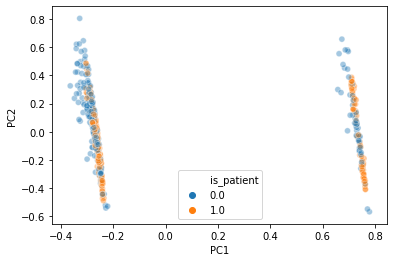

In [536]:
#PCA for SMOTETomek Combination Sampling Dataset
pca_smoteTomek = PCA(n_components=2)
X_pca_smoteTomek = pca_smoteTomek.fit_transform(X_train_smoteTomek)
print(pca_smoteTomek.explained_variance_ratio_)
print(pca_smoteTomek.explained_variance_ratio_.cumsum())
y_temp_smoteTomek = y_train_smoteTomek
y_temp_smoteTomek["PC1"] = X_pca_smoteTomek[:,0]
y_temp_smoteTomek["PC2"] = X_pca_smoteTomek[:,1]
sns.scatterplot(data=y_temp_smoteTomek, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
print(y_temp_smoteTomek["is_patient"].value_counts())

In [542]:
print(y_train_smoteTomek.head())
y_train_smoteTomek = y_train_smoteTomek.drop(['PC1', 'PC2'], axis=1)
print(y_train_smoteTomek.head())

     is_patient       PC1       PC2
207         1.0  0.718499  0.149035
90          1.0 -0.265133  0.084205
255         0.0 -0.271702  0.012900
453         1.0  0.750203 -0.275672
484         1.0 -0.257684 -0.192017
     is_patient
207         1.0
90          1.0
255         0.0
453         1.0
484         1.0


<a id="eleventh"></a>

In [514]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTETomek Combined Training dataset
print("Naive Bayes on SMOTETomek Combined Training dataset:")
clfFitPredict(GaussianNB(), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Naive Bayes on SMOTETomek Combined Training datset
print("\nCross Validation of Naive Bayes on SMOTETomek Combined Training dataset:")
crossValidation(GaussianNB(), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTETomek Combined Training dataset:

Confusion Matrix: 
[[52 73]
 [ 5 45]]

Accuracy : 0.5542857142857143
Sensitivity : 0.416
Precision: 0.9122807017543859
Specificity : 0.9
F-Score : 0.5714285714285714

               precision    recall  f1-score   support

         0.0       0.91      0.42      0.57       125
         1.0       0.38      0.90      0.54        50

    accuracy                           0.55       175
   macro avg       0.65      0.66      0.55       175
weighted avg       0.76      0.55      0.56       175
 


Cross Validation of Naive Bayes on SMOTETomek Combined Training dataset:
[0.69060773 0.69444444 0.63888889 0.65      ] 

0.6684852670349908

----------------------------------------------------------------------



In [515]:
#2.1 SVM Classifier On SMOTETomek Combined Training dataset
print("SVM Classifier on SMOTETomek Combined Training dataset:")
clfFitPredict(LinearSVC(), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on SVM Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of SVM Classifier on SMOTETomek Combined Training dataset:")
crossValidation(LinearSVC(), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

SVM Classifier on SMOTETomek Combined Training dataset:

Confusion Matrix: 
[[70 55]
 [11 39]]

Accuracy : 0.6228571428571429
Sensitivity : 0.56
Precision: 0.8641975308641975
Specificity : 0.78
F-Score : 0.6796116504854369

               precision    recall  f1-score   support

         0.0       0.86      0.56      0.68       125
         1.0       0.41      0.78      0.54        50

    accuracy                           0.62       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.74      0.62      0.64       175
 


Cross Validation of SVM Classifier on SMOTETomek Combined Training dataset:
[0.71270718 0.69444444 0.67222222 0.67777778] 

0.6892879066912216

----------------------------------------------------------------------



In [516]:
#3.1 Logistic Regression Classifier On SMOTETomek Combined Training dataset
print("Logistic Regression Classifier on SMOTETomek Combined Training dataset:")
clfFitPredict(LogisticRegression(), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTETomek Combined Training dataset:")
crossValidation(LogisticRegression(), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

Logistic Regression Classifier on SMOTETomek Combined Training dataset:

Confusion Matrix: 
[[80 45]
 [11 39]]

Accuracy : 0.68
Sensitivity : 0.64
Precision: 0.8791208791208791
Specificity : 0.78
F-Score : 0.7407407407407407

               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74       125
         1.0       0.46      0.78      0.58        50

    accuracy                           0.68       175
   macro avg       0.67      0.71      0.66       175
weighted avg       0.76      0.68      0.70       175
 


Cross Validation of Logistic Regression Classifier on SMOTETomek Combined Training dataset:
[0.71823204 0.63333333 0.62777778 0.70555556] 

0.6712246777163905

----------------------------------------------------------------------



In [517]:
#4.1 KNN Classifier On SMOTETomek Combined Training dataset
print("KNN Classifier on SMOTETomek Combined Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on KNN Classifier on SMOTETomek Combined Training dataset
print("\nCross Validation of KNN Classifier on SMOTETomek Combined Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

KNN Classifier on SMOTETomek Combined Training dataset:

Confusion Matrix: 
[[97 28]
 [30 20]]

Accuracy : 0.6685714285714286
Sensitivity : 0.776
Precision: 0.7637795275590551
Specificity : 0.4
F-Score : 0.7698412698412698

               precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       125
         1.0       0.42      0.40      0.41        50

    accuracy                           0.67       175
   macro avg       0.59      0.59      0.59       175
weighted avg       0.66      0.67      0.67       175
 


Cross Validation of KNN Classifier on SMOTETomek Combined Training dataset:
[0.77348066 0.75       0.79444444 0.71666667] 

0.7586479435236342

----------------------------------------------------------------------



In [518]:
#5.1 Random Forest Classifier On SMOTETomek Combined Training dataset
print("Random Forest Classifier on SMOTETomek Combined Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Random Forest Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of Random Forest Classifier on SMOTETomek Combined Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

Random Forest Classifier on SMOTETomek Combined Training dataset:

Confusion Matrix: 
[[77 48]
 [12 38]]

Accuracy : 0.6571428571428571
Sensitivity : 0.616
Precision: 0.8651685393258427
Specificity : 0.76
F-Score : 0.719626168224299

               precision    recall  f1-score   support

         0.0       0.87      0.62      0.72       125
         1.0       0.44      0.76      0.56        50

    accuracy                           0.66       175
   macro avg       0.65      0.69      0.64       175
weighted avg       0.74      0.66      0.67       175
 


Cross Validation of Random Forest Classifier on SMOTETomek Combined Training dataset:
[0.73480663 0.73888889 0.68888889 0.68333333] 

0.7114794352363414

----------------------------------------------------------------------



In [519]:
#6 Voting Classifier for SMOTETomek Combined Training Dataset
print("Voting Classifier on SMOTETomek Combined Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Voting Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of Voting Classifier on SMOTETomek Combined Training dataset:")
crossValidation(vclf, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

Voting Classifier on SMOTETomek Combined Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Voting Classifier on SMOTETomek Combined Training dataset:
[0.72928177 0.70555556 0.69444444 0.67777778] 

0.7017648864333947

----------------------------------------------------------------------



In [520]:
#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTEENN Combined Training datset

dt_smoteTomek = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf_smoteTomek = AdaBoostClassifier(base_estimator=dt_smoteTomek, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTETomek Combined Training datset:")
clfFitPredict(adb_clf_smoteTomek, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on AdaBoost Classifier on SMOTETomek Combined Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTETomek Combined Training datset:")
crossValidation(adb_clf_smoteTomek, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 

svc_adb_smoteTomek = SVC(probability=True, kernel='linear')
adb_clf_svc_smoteTomek = AdaBoostClassifier(base_estimator=svc_adb_smoteTomek, n_estimators=100, learning_rate=0.025)
print("\nAdaBoostClassifier with SVC as base estimator on SMOTETomek Combined Training datset:")
clfFitPredict(adb_clf_svc_smoteTomek, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on AdaBoostClassifier on SMOTETomek Combined Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTETomek Combined Training datset:")
crossValidation(adb_clf_svc_smoteTomek, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")


AdaBoostClassifier with Decision Tree as base estimator on SMOTETomek Combined Training datset:

Confusion Matrix: 
[[77 48]
 [17 33]]

Accuracy : 0.6285714285714286
Sensitivity : 0.616
Precision: 0.8191489361702128
Specificity : 0.66
F-Score : 0.7031963470319635

               precision    recall  f1-score   support

         0.0       0.82      0.62      0.70       125
         1.0       0.41      0.66      0.50        50

    accuracy                           0.63       175
   macro avg       0.61      0.64      0.60       175
weighted avg       0.70      0.63      0.65       175
 


Cross Validation of AdaBoost Classifier on SMOTETomek Combined Training datset:
[0.74033149 0.70555556 0.67777778 0.68333333] 

0.7017495395948434

----------------------------------------------------------------------


AdaBoostClassifier with SVC as base estimator on SMOTETomek Combined Training datset:

Confusion Matrix: 
[[85 40]
 [16 34]]

Accuracy : 0.68
Sensitivity : 0.68
Precision: 0.84158415

In [521]:
#9 GradientBoostingClassifier On SMOTETomek Combined Training datset

gbc_smoteTomek = GradientBoostingClassifier(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=0)
print("\nGradientBoostingClassifier on the SMOTETomek Combined Training datset:")
clfFitPredict(gbc_smoteTomek, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTETomek Combined Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTETomek Combined Training datset:")
crossValidation(gbc_smoteTomek, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")


GradientBoostingClassifier on the SMOTETomek Combined Training datset:

Confusion Matrix: 
[[80 45]
 [20 30]]

Accuracy : 0.6285714285714286
Sensitivity : 0.64
Precision: 0.8
Specificity : 0.6
F-Score : 0.7111111111111111

               precision    recall  f1-score   support

         0.0       0.80      0.64      0.71       125
         1.0       0.40      0.60      0.48        50

    accuracy                           0.63       175
   macro avg       0.60      0.62      0.60       175
weighted avg       0.69      0.63      0.65       175
 


Cross Validation of GradientBoostingClassifier on SMOTETomek Combined Training datset:
[0.74585635 0.75555556 0.72777778 0.67222222] 

0.7253529772866789

----------------------------------------------------------------------



In [522]:
#10 XGBClassifier on the SMOTETomek Combined Training datset

xgb_clf_smoteTomek = XGBClassifier(objective='binary:logistic', booster='gblinear', n_estimators=10, seed=1)
print("\nXGBClassifier on the SMOTETomek dataset:")
clfFitPredict(xgb_clf_smoteTomek, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on XGBClassifier on SMOTETomek Combined Training datset
print("\nCross Validation of XGBClassifier on SMOTETomek Combined Training datset:")
crossValidation(xgb_clf_smoteTomek, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")


XGBClassifier on the SMOTETomek dataset:

Confusion Matrix: 
[[71 54]
 [12 38]]

Accuracy : 0.6228571428571429
Sensitivity : 0.568
Precision: 0.8554216867469879
Specificity : 0.76
F-Score : 0.6826923076923076

               precision    recall  f1-score   support

         0.0       0.86      0.57      0.68       125
         1.0       0.41      0.76      0.54        50

    accuracy                           0.62       175
   macro avg       0.63      0.66      0.61       175
weighted avg       0.73      0.62      0.64       175
 


Cross Validation of XGBClassifier on SMOTETomek Combined Training datset:
[0.55248619 0.55       0.55       0.55555556] 

0.5520104358502149

----------------------------------------------------------------------



In [523]:
#Bagging Classifier On the SMOTETomek Combined Training Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on SMOTETomek Combined Training dataset :")
clfFitPredict(clf_bagging, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Bagging Classifier on SMOTETomek dataset
print("\nCross Validation of Bagging Classifier on SMOTETomek dataset :")
crossValidation(clf_bagging, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On SMOTETomek Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On SMOTETomek Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_smoteTomek, y_smoteTomek, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

Bagging Classifier on SMOTETomek Combined Training dataset :

Confusion Matrix: 
[[95 30]
 [33 17]]

Accuracy : 0.64
Sensitivity : 0.76
Precision: 0.7421875
Specificity : 0.34
F-Score : 0.7509881422924901

               precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       125
         1.0       0.36      0.34      0.35        50

    accuracy                           0.64       175
   macro avg       0.55      0.55      0.55       175
weighted avg       0.63      0.64      0.64       175
 


Cross Validation of Bagging Classifier on SMOTETomek dataset :
[0.79005525 0.73888889 0.74444444 0.66111111] 

0.7336249232658072

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On SMOTETomek Dataset

Confusion Matrix: 
[[95 30]
 [33 17]]

Accuracy : 0.64
Sensitivity : 0.76
Precision: 0.7421875
Specificity : 0.34
F-Score : 0.7509881422924901

               precision    recall  f

In [524]:
#Perceptron On The SMOTETomek Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on SMOTETomek dataset :")
clfFitPredict(clf_percept, X_train_smoteTomek, X_test, y_train_smoteTomek, y_test)

#Cross Validation on Perceptron on SMOTETomek datset
print("\nCross Validation of Perceptron on SMOTETomek dataset :")
crossValidation(clf_percept, X_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

Perceptron on SMOTETomek dataset :

Confusion Matrix: 
[[85 40]
 [17 33]]

Accuracy : 0.6742857142857143
Sensitivity : 0.68
Precision: 0.8333333333333334
Specificity : 0.66
F-Score : 0.748898678414097

               precision    recall  f1-score   support

         0.0       0.83      0.68      0.75       125
         1.0       0.45      0.66      0.54        50

    accuracy                           0.67       175
   macro avg       0.64      0.67      0.64       175
weighted avg       0.72      0.67      0.69       175
 


Cross Validation of Perceptron on SMOTETomek dataset :
[0.64640884 0.55       0.64444444 0.68333333] 

0.6310466543891959

----------------------------------------------------------------------



<a id="pca11"></a>

In [525]:
#Classification With PCA with SMOTEENN Dataset

pca_smoteTomek_1 = PCA()
X_pca_smoteTomek_1 = pca_smoteTomek_1.fit_transform(X_train_smoteTomek)
#print(pca_smoteTomek_1.explained_variance_ratio_)
print(pca_smoteTomek_1.explained_variance_ratio_.cumsum())

pca_smoteTomek1 = PCA(n_components=6)
X_pca_train_smoteTomek1 = pd.DataFrame(pca_smoteTomek1.fit_transform(X_train_smoteTomek))
X_pca_test_smoteTomek1 = pd.DataFrame(pca_smoteTomek1.transform(X_test))

X_pca_smoteTomek = pd.concat([X_pca_train_smoteTomek1, X_pca_test_smoteTomek1], axis=0)
#print(type(X_pca_train_smoteTomek1), type(X_pca_test_smoteTomek1), len(X_pca_smoteTomek))

print("\n----------------------------------------------------------------------\n")

[0.55921241 0.73806294 0.8318547  0.91115399 0.94760695 0.97333456
 0.99511738 0.99789825 0.99932507 1.        ]

----------------------------------------------------------------------



In [526]:
#1 Naive Bayes On SMOTETomek PCA Training dataset
print("Naive Bayes on SMOTETomek PCA Training  dataset:")
clfFitPredict(GaussianNB(), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Naive Bayes on SMOTETomek PCA Training datset
print("\nCross Validation of Naive Bayes on SMOTETomek PCA Training dataset:")
crossValidation(GaussianNB(), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTETomek PCA Trained dataset
print("SVM Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(LinearSVC(), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on SVM Classifier on SMOTETomek PCA Trained datset
print("\nCross Validation of SVM Classifier on SMOTETomek PCA Trained dataset:")
crossValidation(LinearSVC(), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

# 3.1 Logistic Regression Classifier On SMOTETomek PCA Trained dataset
print("Logistic Regression Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(LogisticRegression(), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTETomek PCA Trained dataset
print("\nCross Validation of Logistic Regression Classifier on SMOTETomek PCA Trained dataset:")
crossValidation(LogisticRegression(), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTETomek PCA Trained dataset
print("KNN Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on KNN Classifier on SMOTETomek Training dataset
print("\nCross Validation of KNN Classifier on SMOTETomek Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTETomek PCA Trained dataset
print("Random Forest Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Random Forest Classifier on SMOTETomek PCA Training datset
print("\nCross Validation of Random Forest Classifier on SMOTETomek Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTETomek PCA Trained Dataset
print("Voting Classifier on SMOTETomek PCA Trained dataset:")
clfFitPredict(vclf, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Voting Classifier on SMOTETomek PCA Trained datset
print("\nCross Validation of Voting Classifier on SMOTETomek PCA Trained dataset:")
crossValidation(vclf, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#7 AdaBoostClassifier With Decision Tree Classifier as base estimator on SMOTETomek PCA Training datset
print("\nAdaBoostClassifier with Decision Tree as base estimator on SMOTETomek PCATraining datset:")
clfFitPredict(adb_clf_smoteTomek, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

# Cross Validation on AdaBoost Classifier on SMOTETomek PCA Training datset
print("\nCross Validation of AdaBoost Classifier on SMOTETomek PCA Training datset:")
crossValidation(adb_clf_smoteTomek, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#8 AdaBoostClassifier With SVC as base estimator 
print("\nAdaBoostClassifier with SVC as base estimator on Tomek PCA Training datset:")
clfFitPredict(adb_clf_svc_smoteTomek, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on AdaBoostClassifier on SMOTETomek PCA Training datset
print("\nCross Validation of AdaBoostClassifier with SVM as base estimator on SMOTETomek PCA Training datset:")
crossValidation(adb_clf_svc_smoteTomek, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#9 GradientBoostingClassifier On SMOTETomek PCA Training datset
print("\nGradientBoostingClassifier on the SMOTETomek PCA Training datset:")
clfFitPredict(gbc_smoteTomek, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on GradientBoostingClassifier on SMOTETomek PCA Training datset
print("\nCross Validation of GradientBoostingClassifier on SMOTETomek PCA Training datset:")
crossValidation(gbc_smoteTomek, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#10 XGBClassifier on the SMOTETomek PCA Training datset

print("\nXGBClassifier on the SMOTETomek PCA dataset:")
clfFitPredict(xgb_clf_smoteTomek, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on XGBClassifier on SMOTETomek PCA Training datset
print("\nCross Validation of XGBClassifier on SMOTETomek PCA Training datset:")
crossValidation(xgb_clf_smoteTomek, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

#X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)
#X_pca_smoteTomek, y_smoteTomek

#Bagging Classifier On the SMOTETomek PCA Training Dataset

clf_bagging = BaggingClassifier(random_state=0)
print("Bagging Classifier on SMOTETomek PCA Training dataset :")
clfFitPredict(clf_bagging, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Bagging Classifier on smoteTomek PCA datset
print("\nCross Validation of Bagging Classifier on smoteTomek PCA dataset :")
crossValidation(clf_bagging, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

base_estimators = [DecisionTreeClassifier(), 
                  Perceptron(), 
                  KNeighborsClassifier(),
                  SVC(),
                  RandomForestClassifier(),
                  LogisticRegression()
                 ]

base_estimator_names = ['Decision Tree', 'Perceptron', 'KNN', 'SVC', 'RF', 'LR']
index = 0
for base_estimator in base_estimators:
    print("Bagging Classifier with {} as base estimator On SMOTETomek PCA Dataset".format(base_estimator_names[index]))
    clf_bagging_temp = BaggingClassifier(base_estimator=base_estimator, random_state=0) 
    clfFitPredict(clf_bagging_temp, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)
    print("Cross Validation of Bagging Classifier with {} as base estimator On SMOTETomek PCA Dataset".format(base_estimator_names[index]))
    crossValidation(clf_bagging_temp, X_pca_smoteTomek, y_smoteTomek, 4)
    print("\n----------------------------------------------------------------------\n")
    index+=1

#Perceptron On The SMOTETomek PCA Dataset

clf_percept = Perceptron(tol=0.001, random_state=0)
print("Perceptron on SMOTETomek PCA dataset :")
clfFitPredict(clf_percept, X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test)

#Cross Validation on Perceptron on SMOTETomek PCA dataset
print("\nCross Validation of Perceptron on smoteTomek PCA dataset :")
crossValidation(clf_percept, X_pca_smoteTomek, y_smoteTomek, 4)

print("\n----------------------------------------------------------------------\n")

Naive Bayes on SMOTETomek PCA Training  dataset:

Confusion Matrix: 
[[61 64]
 [18 32]]

Accuracy : 0.5314285714285715
Sensitivity : 0.488
Precision: 0.7721518987341772
Specificity : 0.64
F-Score : 0.5980392156862745

               precision    recall  f1-score   support

         0.0       0.77      0.49      0.60       125
         1.0       0.33      0.64      0.44        50

    accuracy                           0.53       175
   macro avg       0.55      0.56      0.52       175
weighted avg       0.65      0.53      0.55       175
 


Cross Validation of Naive Bayes on SMOTETomek PCA Training dataset:
[0.6961326  0.67222222 0.62777778 0.61111111] 

0.6518109269490485

----------------------------------------------------------------------

SVM Classifier on SMOTETomek PCA Trained dataset:

Confusion Matrix: 
[[68 57]
 [ 9 41]]

Accuracy : 0.6228571428571429
Sensitivity : 0.544
Precision: 0.8831168831168831
Specificity : 0.82
F-Score : 0.6732673267326733

               precision

[0.79005525 0.77777778 0.72222222 0.65      ] 

0.7350138121546961

----------------------------------------------------------------------

Bagging Classifier with Decision Tree as base estimator On SMOTETomek PCA Dataset

Confusion Matrix: 
[[92 33]
 [29 21]]

Accuracy : 0.6457142857142857
Sensitivity : 0.736
Precision: 0.7603305785123967
Specificity : 0.42
F-Score : 0.7479674796747968

               precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       125
         1.0       0.39      0.42      0.40        50

    accuracy                           0.65       175
   macro avg       0.57      0.58      0.58       175
weighted avg       0.65      0.65      0.65       175
 

Cross Validation of Bagging Classifier with Decision Tree as base estimator On SMOTETomek PCA Dataset
[0.79005525 0.77777778 0.72222222 0.65      ] 

0.7350138121546961

----------------------------------------------------------------------

Bagging Classifier with Perceptron as

<a id="hyper11"></a>

In [543]:
#Hyperparameter Tuning for SVC on SMOTETomek Combination Dataset
random_svc_smoteTomek = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_svc_smoteTomek, "RSCV_SVC_smoteTomek.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


['RSCV_SVC_smoteTomek.pkl']

In [544]:
print("\nRandomizedSearchCV for SVC with SMOTETomek Combination Dataset")
RSCV_SVC_smoteTomek_loaded  = joblib.load("RSCV_SVC_smoteTomek.pkl")
print("\nBest Parameters :", RSCV_SVC_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_smoteTomek_loaded.predict(X_test)))


RandomizedSearchCV for SVC with SMOTETomek Combination Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 100}

Best Score : 0.7106734006734007

Accuracy Score : 0.6057142857142858


In [545]:
random_svc_smoteTomek_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_smoteTomek_pca.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_svc_smoteTomek_pca, "RSCV_SVC_smoteTomek_pca.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


['RSCV_SVC_smoteTomek_pca.pkl']

In [546]:
print("\nRandomizedSearchCV for SVC with SMOTETomek Combination PCA Dataset")
RSCV_SVC_smoteTomek_pca_loaded  = joblib.load("RSCV_SVC_smoteTomek_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_smoteTomek_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_smoteTomek_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_smoteTomek_pca_loaded.predict(X_pca_test_smoteTomek1)))



RandomizedSearchCV for SVC with SMOTETomek Combination PCA Dataset

Best Parameters : {'kernel': 'sigmoid', 'gamma': 0.05, 'C': 1000}

Best Score : 0.7214814814814815

Accuracy Score : 0.6


In [547]:
#Hyperparameter Tuning for Logistic Regression On SMOTETomek Combination

random_logreg_smoteTomek = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_logreg_smoteTomek, "RSCV_LR_smoteTomek.pkl")

Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   16.1s finished


['RSCV_LR_smoteTomek.pkl']

In [548]:
print("\nRandomizedSearchCV for LR with SMOTETomek Dataset")
RSCV_LR_smoteTomek_loaded  = joblib.load("RSCV_LR_smoteTomek.pkl")
print("\nBest Parameters :",RSCV_LR_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_smoteTomek_loaded.predict(X_test)))


RandomizedSearchCV for LR with SMOTETomek Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 1000}

Best Score : 0.7416161616161616

Accuracy Score : 0.5885714285714285


In [549]:
random_logreg_pca_smoteTomek = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_logreg_pca_smoteTomek, "RSCV_LR_pca_smoteTomek.pkl")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


['RSCV_LR_pca_smoteTomek.pkl']

In [550]:
print("\nRandomizedSearchCV for LR with SMOTETomek PCA Dataset")
RSCV_LR_pca_smoteTomek_loaded  = joblib.load("RSCV_LR_pca_smoteTomek.pkl")
print("\nBest Parameters :", RSCV_LR_pca_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))



RandomizedSearchCV for LR with SMOTETomek PCA Dataset

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.7160269360269361

Accuracy Score : 0.6171428571428571


In [551]:
#Hyperparameter Tuning for Logistic Regression On SMOTETomek Combination

random_logreg_smoteTomek = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_logreg_smoteTomek, "RSCV_LR_smoteTomek.pkl")

Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   11.9s finished


['RSCV_LR_smoteTomek.pkl']

In [552]:
print("\nRandomizedSearchCV for LR with SMOTETomek Dataset")
RSCV_LR_smoteTomek_loaded  = joblib.load("RSCV_LR_smoteTomek.pkl")
print("\nBest Parameters :",RSCV_LR_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_smoteTomek_loaded.predict(X_test)))


RandomizedSearchCV for LR with SMOTETomek Dataset

Best Parameters : {'solver': 'liblinear', 'penalty': 'l2', 'C': 1000}

Best Score : 0.7416161616161616

Accuracy Score : 0.5885714285714285


In [553]:
random_logreg_pca_smoteTomek = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_logreg_pca_smoteTomek, "RSCV_LR_pca_smoteTomek.pkl")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


['RSCV_LR_pca_smoteTomek.pkl']

In [554]:
print("\nRandomizedSearchCV for LR with SMOTETomek PCA Dataset")
RSCV_LR_pca_smoteTomek_loaded  = joblib.load("RSCV_LR_pca_smoteTomek.pkl")
print("\nBest Parameters :", RSCV_LR_pca_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))



RandomizedSearchCV for LR with SMOTETomek PCA Dataset

Best Parameters : {'solver': 'saga', 'penalty': 'l1', 'C': 10}

Best Score : 0.7160269360269361

Accuracy Score : 0.6171428571428571


In [561]:
#Hyperparameter Tuning for RandomForest On SMOTETomek Dataset

random_rf_smoteTomek = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_rf_smoteTomek, "RSCV_RF_smoteTomek.pkl")

['RSCV_RF_smoteTomek.pkl']

In [562]:
print("\nRandomizedSearchCV for RF with SMOTETomek Dataset")
RSCV_RF_smoteTomek_loaded  = joblib.load("RSCV_RF_smoteTomek.pkl")
print("\nBest Parameter :", RSCV_RF_smoteTomek_loaded.best_params_)
print("\nBest Score :", RSCV_RF_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_smoteTomek_loaded.predict(X_test)))


RandomizedSearchCV for RF with SMOTETomek Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 26.0, 'bootstrap': False}

Best Score : 0.7252525252525253

Accuracy Score : 0.64


In [563]:
random_rf_pca_smoteTomek = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_rf_pca_smoteTomek, "RSCV_RF_pca_smoteTomek.pkl")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.0s finished


['RSCV_RF_pca_smoteTomek.pkl']

In [564]:
print("\nRandomizedSearchCV for RF on SMOTETomek PCA Dataset")
RSCV_RF_pca_smoteTomek_loaded  = joblib.load("RSCV_RF_pca_smoteTomek.pkl")
print("\nBest Parameter :", RSCV_RF_pca_smoteTomek_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))



RandomizedSearchCV for RF on SMOTETomek PCA Dataset

Best Parameter : {'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'sqrt', 'max_depth': 11.0, 'bootstrap': False}

Best Score : 0.7050168350168351

Accuracy Score : 0.64


In [565]:
#Hyperparameter Tuning for GradientBoostingClassifier On SMOTETomek Dataset

clf_gbc_smoteTomek = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(clf_gbc_smoteTomek,'RSCV_GBC_smoteTomek.pkl')

['RSCV_GBC_smoteTomek.pkl']

In [566]:
print("\nRandomizedSearchCV for GBC with SMOTETomek Dataset")
RSCV_GBC_smoteTomek_loaded  = joblib.load("RSCV_GBC_smoteTomek.pkl")
print("\nBest Score :", RSCV_GBC_smoteTomek_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_smoteTomek_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_smoteTomek_loaded.predict(X_test)))


RandomizedSearchCV for GBC with SMOTETomek Dataset

Best Score : 0.7875084175084175

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.6114285714285714


In [567]:
clf_gbc_pca_smoteTomek = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(clf_gbc_pca_smoteTomek,'RSCV_GBC_pca_smoteTomek.pkl')


['RSCV_GBC_pca_smoteTomek.pkl']

In [568]:
print("\nRandomizedSearchCV for GBC with SMOTETomek PCA Dataset")
RSCV_GBC_pca_smoteTomek_loaded  = joblib.load("RSCV_GBC_pca_smoteTomek.pkl")
print("\nBest Score :",RSCV_GBC_pca_smoteTomek_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_smoteTomek_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))



RandomizedSearchCV for GBC with SMOTETomek PCA Dataset

Best Score : 0.7563299663299663

Best Parameters : {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 16.0, 'learning_rate': 0.5}

Accuracy Score : 0.6285714285714286


In [569]:
#Hyperparameter for AdaBoost Classifier On SMOTETomek Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_smoteTomek = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_adaboost_smoteTomek, "RSCV_ADC_smoteTomek.pkl")

['RSCV_ADC_smoteTomek.pkl']

In [570]:
print("\nRandomizedSearchCV for ADC with SMOTETomek PCA Dataset")
RSCV_ADC_smoteTomek_loaded  = joblib.load("RSCV_ADC_smoteTomek.pkl")
print("\nBest Score -", RSCV_ADC_smoteTomek_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_smoteTomek_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_smoteTomek_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SMOTETomek PCA Dataset

Best Score - 0.5575084175084175

Best Parameters - {'n_estimators': 800, 'learning_rate': 0.005, 'algorithm': 'SAMME'}

 Accuracy Score - 0.6171428571428571


In [571]:
#Hyperparameter Tuning For AdaBoostClassifier on SMOTETomek PCA Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_smoteTomek_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_smoteTomek_pca.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_adaboost_smoteTomek_pca, "RSCV_ADC_smoteTomek_pca.pkl")

['RSCV_ADC_smoteTomek_pca.pkl']

In [572]:
print("\nRandomizedSearchCV for ADC with SMOTETomek PCA Dataset")
RSCV_ADC_smoteTomek_pca_loaded  = joblib.load("RSCV_ADC_smoteTomek_pca.pkl")
print("\nBest Score -", RSCV_ADC_smoteTomek_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_smoteTomek_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_smoteTomek_pca_loaded.predict(X_pca_test_smoteTomek1)))


RandomizedSearchCV for ADC with SMOTETomek PCA Dataset

Best Score - 0.5538047138047137

Best Parameters - {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

 Accuracy Score - 0.6228571428571429


In [573]:
#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_smoteTomek = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_adaboost_svc_smoteTomek, "RSCV_ADC_svc_smoteTomek.pkl")

['RSCV_ADC_svc_smoteTomek.pkl']

In [574]:
print("\nRandomizedSearchCV for ADC with SVC on SMOTETomek Dataset")
RSCV_ADC_svc_smoteTomek_loaded  = joblib.load("RSCV_ADC_svc_smoteTomek.pkl")
print("\nBest Score :", RSCV_ADC_svc_smoteTomek_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_smoteTomek_loaded.predict(X_test)))


RandomizedSearchCV for ADC with SVC on SMOTETomek Dataset

Best Score : {'n_estimators': 1000, 'learning_rate': 1, 'algorithm': 'SAMME'}

Best Parameter : 0.5463973063973064

Accuracy Score : 0.6285714285714286


In [ ]:
svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_smoteTomek = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_adaboost_svc_pca_smoteTomek, "RSCV_ADC_svc_pca_smoteTomek.pkl")

In [ ]:

print("\nRandomizedSearchCV for SVC with SMOTETomek PCA Dataset")
RSCV_ADC_svc_pca_smoteTomek_loaded  = joblib.load("RSCV_ADC_svc_pca_smoteTomek.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_smoteTomek_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))

#Hyperparameter Tuning for SVC on SMOTETomek Combination Dataset
random_svc_smoteTomek = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_svc_smoteTomek, "RSCV_SVC_smoteTomek.pkl")

print("\nRandomizedSearchCV for SVC with SMOTETomek Combination Dataset")
RSCV_SVC_smoteTomek_loaded  = joblib.load("RSCV_SVC_smoteTomek.pkl")
print("\nBest Parameters :", RSCV_SVC_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_smoteTomek_loaded.predict(X_test)))

random_svc_smoteTomek_pca = RandomizedSearchCV(estimator = SVC(random_state=0), 
                            param_distributions = param_grid_svc, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )
random_svc_smoteTomek_pca.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_svc_smoteTomek_pca, "RSCV_SVC_smoteTomek_pca.pkl")

print("\nRandomizedSearchCV for SVC with SMOTETomek Combination PCA Dataset")
RSCV_SVC_smoteTomek_pca_loaded  = joblib.load("RSCV_SVC_smoteTomek_pca.pkl")
print("\nBest Parameters :", RSCV_SVC_smoteTomek_pca_loaded.best_params_) 
print("\nBest Score :", RSCV_SVC_smoteTomek_pca_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_SVC_smoteTomek_pca_loaded.predict(X_pca_test_smoteTomek1)))

#Hyperparameter Tuning for Logistic Regression On SMOTETomek Combination

random_logreg_smoteTomek = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_logreg_smoteTomek, "RSCV_LR_smoteTomek.pkl")

print("\nRandomizedSearchCV for LR with SMOTETomek Dataset")
RSCV_LR_smoteTomek_loaded  = joblib.load("RSCV_LR_smoteTomek.pkl")
print("\nBest Parameters :",RSCV_LR_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_smoteTomek_loaded.predict(X_test)))

random_logreg_pca_smoteTomek = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_logreg_pca_smoteTomek, "RSCV_LR_pca_smoteTomek.pkl")

print("\nRandomizedSearchCV for LR with SMOTETomek PCA Dataset")
RSCV_LR_pca_smoteTomek_loaded  = joblib.load("RSCV_LR_pca_smoteTomek.pkl")
print("\nBest Parameters :", RSCV_LR_pca_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))

#Hyperparameter Tuning for Logistic Regression On SMOTETomek Combination

random_logreg_smoteTomek = RandomizedSearchCV(estimator=LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            cv=10,scoring='accuracy',refit=True,verbose=1,
                            n_jobs=-1,n_iter=100,random_state=0
                           )

random_logreg_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_logreg_smoteTomek, "RSCV_LR_smoteTomek.pkl")

print("\nRandomizedSearchCV for LR with SMOTETomek Dataset")
RSCV_LR_smoteTomek_loaded  = joblib.load("RSCV_LR_smoteTomek.pkl")
print("\nBest Parameters :",RSCV_LR_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_smoteTomek_loaded.predict(X_test)))

random_logreg_pca_smoteTomek = RandomizedSearchCV(estimator = LogisticRegression(), 
                            param_distributions = param_grid_logreg, 
                            refit=True,verbose=True,scoring='accuracy',
                            cv=10,n_jobs=-1,random_state = 0
                           )

random_logreg_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_logreg_pca_smoteTomek, "RSCV_LR_pca_smoteTomek.pkl")

print("\nRandomizedSearchCV for LR with SMOTETomek PCA Dataset")
RSCV_LR_pca_smoteTomek_loaded  = joblib.load("RSCV_LR_pca_smoteTomek.pkl")
print("\nBest Parameters :", RSCV_LR_pca_smoteTomek_loaded.best_params_) 
print("\nBest Score :", RSCV_LR_pca_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_LR_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))


#Hyperparameter Tuning for RandomForest On SMOTETomek Dataset

random_rf_smoteTomek = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 1),
                               param_distributions=param_grid_rf, 
                               verbose=False,cv=10,scoring='accuracy', 
                               refit=True,n_jobs=-1,random_state=0
                              )
random_rf_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_rf_smoteTomek, "RSCV_RF_smoteEnn.pkl")

print("\nRandomizedSearchCV for RF with SMOTETomek Dataset")
RSCV_RF_smoteTomek_loaded  = joblib.load("RSCV_RF_smoteTomek.pkl")
print("\nBest Parameter :", RSCV_RF_smoteTomek_loaded.best_params_)
print("\nBest Score :", RSCV_RF_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_smoteTomek_loaded.predict(X_test)))

random_rf_pca_smoteTomek = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), 
                            param_distributions = param_grid_rf,refit=True,verbose=True,
                            scoring='accuracy',cv=10,n_jobs=-1,random_state = 0
                           )
random_rf_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_rf_pca_smoteTomek, "RSCV_RF_pca_smoteTomek.pkl")

print("\nRandomizedSearchCV for RF on SMOTETomek PCA Dataset")
RSCV_RF_pca_smoteTomek_loaded  = joblib.load("RSCV_RF_pca_smoteTomek.pkl")
print("\nBest Parameter :", RSCV_RF_pca_smoteTomek_loaded.best_params_)
print("\nBest Score :", RSCV_RF_pca_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_RF_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))

#Hyperparameter Tuning for GradientBoostingClassifier On SMOTETomek Dataset

clf_gbc_smoteTomek = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(clf_gbc_smoteTomek,'RSCV_GBC_smoteTomek.pkl')

print("\nRandomizedSearchCV for GBC with SMOTETomek Dataset")
RSCV_GBC_smoteTomek_loaded  = joblib.load("RSCV_GBC_smoteTomek.pkl")
print("\nBest Score :", RSCV_GBC_smoteTomek_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_smoteTomek_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_smoteTomek_loaded.predict(X_test)))

clf_gbc_pca_smoteTomek = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                             param_distributions=param_grid_gbc,cv=10,scoring='accuracy',
                             refit=True, n_jobs=-1,verbose=False,random_state=0
                            )
clf_gbc_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(clf_gbc_pca_smoteTomek,'RSCV_GBC_pca_smoteTomek.pkl')

print("\nRandomizedSearchCV for GBC with SMOTETomek PCA Dataset")
RSCV_GBC_pca_smoteTomek_loaded  = joblib.load("RSCV_GBC_pca_smoteTomek.pkl")
print("\nBest Score :",RSCV_GBC_pca_smoteTomek_loaded.best_score_)
print("\nBest Parameters :", RSCV_GBC_pca_smoteTomek_loaded.best_params_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_GBC_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))


#Hyperparameter for AdaBoost Classifier On SMOTETomek Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_smoteTomek = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_adaboost_smoteTomek, "RSCV_ADC_smoteTomek.pkl")

print("\nRandomizedSearchCV for ADC with SMOTETomek PCA Dataset")
RSCV_ADC_smoteTomek_loaded  = joblib.load("RSCV_ADC_smoteTomek.pkl")
print("\nBest Score -", RSCV_ADC_smoteTomek_loaded.best_score_)
print("\nBest Parameters -",RSCV_ADC_smoteTomek_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_smoteTomek_loaded.predict(X_test)))

#Hyperparameter Tuning For AdaBoostClassifier on SMOTETomek PCA Dataset
                
dTC = DecisionTreeClassifier(max_depth=4,max_features='sqrt',min_samples_leaf=0.5,min_samples_split=0.1)
ada_classifier = AdaBoostClassifier(base_estimator=dTC, random_state=0)

random_adaboost_smoteTomek_pca = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid_adc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_smoteTomek_pca.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_adaboost_smoteTomek_pca, "RSCV_ADC_smoteTomek_pca.pkl")

print("\nRandomizedSearchCV for ADC with SMOTETomek PCA Dataset")
RSCV_ADC_smoteTomek_pca_loaded  = joblib.load("RSCV_ADC_smoteTomek_pca.pkl")
print("\nBest Score -", RSCV_ADC_smoteTomek_pca_loaded.best_score_)
print("\nBest Parameters -", RSCV_ADC_smoteTomek_pca_loaded.best_params_)
print("\n Accuracy Score -", accuracy_score(y_test, RSCV_ADC_smoteTomek_pca_loaded.predict(X_pca_test_smoteTomek1)))

#Hyperparameter Tuning For AdaBoostClassifier with SVC as base estimator 

svc = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)

random_adaboost_svc_smoteTomek = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                     random_state=0, cv=10, scoring='accuracy',
                                     refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_smoteTomek.fit(X_train_smoteTomek, y_train_smoteTomek.values.ravel())
joblib.dump(random_adaboost_svc_smoteTomek, "RSCV_ADC_svc_smoteTomek.pkl")

print("\nRandomizedSearchCV for ADC with SVC on SMOTETomek Dataset")
RSCV_ADC_svc_smoteTomek_loaded  = joblib.load("RSCV_ADC_svc_smoteTomek.pkl")
print("\nBest Score :", RSCV_ADC_svc_smoteTomek_loaded.best_params_)
print("\nBest Parameter :",RSCV_ADC_svc_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :",accuracy_score(y_test, RSCV_ADC_svc_smoteTomek_loaded.predict(X_test)))

#X_pca_train_smoteTomek1, X_pca_test_smoteTomek1, y_train_smoteTomek, y_test
#X_train_smoteTomek, X_test, y_train_smoteTomek, y_test

svc  = SVC(kernel='sigmoid', gamma=0.001, C=1)
ada_classifier_svc = AdaBoostClassifier(base_estimator=svc, random_state=0)
random_adaboost_svc_pca_smoteTomek = RandomizedSearchCV(estimator=ada_classifier_svc, param_distributions=param_grid_adc_svc,
                                            random_state=0, cv=10, scoring='accuracy',
                                            refit=True, n_jobs=-1, verbose=False)
random_adaboost_svc_pca_smoteTomek.fit(X_pca_train_smoteTomek1, y_train_smoteTomek.values.ravel())
joblib.dump(random_adaboost_svc_pca_smoteTomek, "RSCV_ADC_svc_pca_smoteTomek.pkl")

print("\nRandomizedSearchCV for SVC with SMOTETomek PCA Dataset")
RSCV_ADC_svc_pca_smoteTomek_loaded  = joblib.load("RSCV_ADC_svc_pca_smoteTomek.pkl")
print("\nBest Score :", RSCV_ADC_svc_pca_smoteTomek_loaded.best_params_)
print("\nBest Parameter :", RSCV_ADC_svc_pca_smoteTomek_loaded.best_score_)
print("\nAccuracy Score :", accuracy_score(y_test, RSCV_ADC_svc_pca_smoteTomek_loaded.predict(X_pca_test_smoteTomek1)))